#### In this Notebook
 - we'll tackle this task using a variant of BERT called **DistilBERT**, The main advantage of this model is that it achieves comparable performance to BERT, while being significantly smaller and more efficient. This enables us to train a classifier in a few minutes, and if you want to train a larger BERT model you can simply change the checkpoint of the pretrained model. A checkpoint corresponds to the set of weights that are loaded into a given transformer architecture.

 - This will also be our first encounter with three of the core libraries from the Hugging Face ecosystem : **Datasets, Tokenizer, Transformers** these libraries will allow us to quickly go from raw text to a fine-tuned model that can be used for inference on new tweets.![111.PNG](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKMAAADcCAYAAACswWIWAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P2Fex1H0![2.PNG](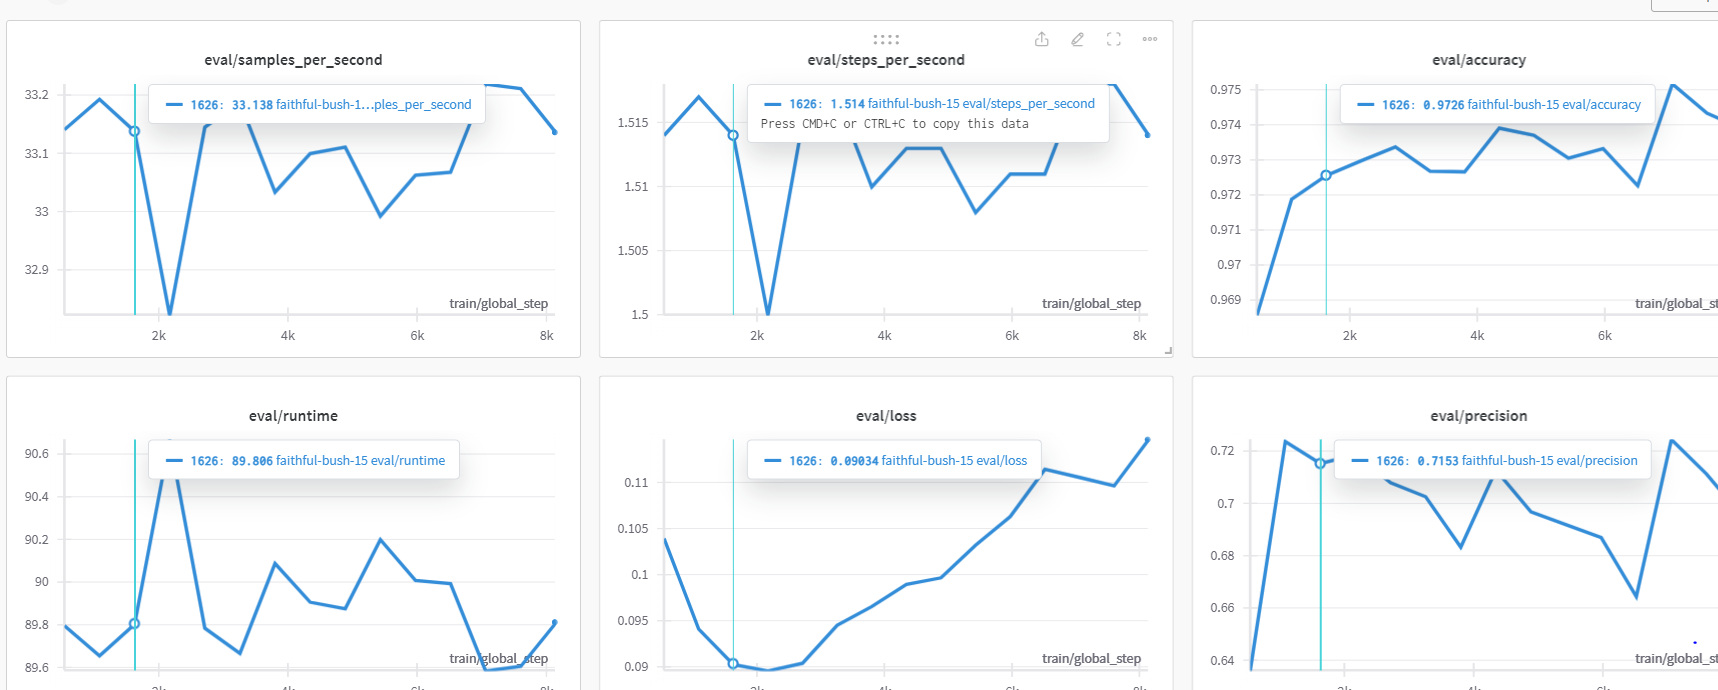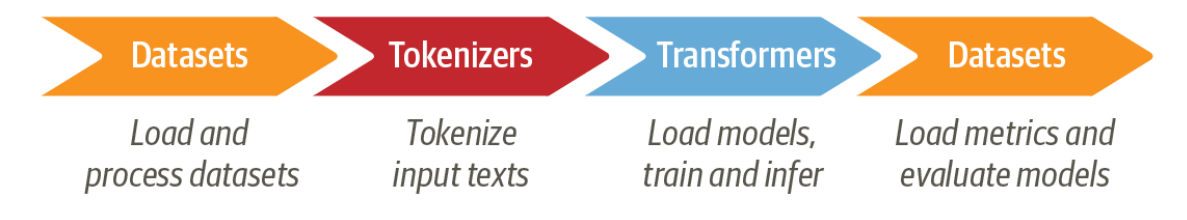)v4Pv3/Jb7/Psw9ks88mm8UsM4Z3w8x2EoeZyWFOzBwzMzPIMjPLkiXZsmVbki2ydLje/vRMH42O5siSbekc23VfVyXymZmemZ7u6qq7q6v/f6JQKBQKhUKhUCgUCoVCoVB0E5SMUigUCoVCoVAoFAqFQqFQdBuUjFIoFAqFQqFQKBQKhUKhUHQblIxSKBQKhUKhUCgUCoVCoVB0G5SMUigUCoVCoVAoFAqFQqFQdBuUjFIoFAqFQqFQKBQKhUKhUHQblIxSKBQKhUKhUCgUCoVCoVB0G5SMUigUCoVCoVAoFAqFQqFQdBuUjFIoFAqFQqFQKBQKhUKhUHQblIxSKBQKhUKhUCgUCoVCoVB0G5SMUigUCoVCoVAoFAqFQqFQdBuUjFIoFAqFQqFQKBQKhUKhUHQblIxSKBQKhUKhUCgUCoVCoVB0G5SMUigUCoVCoVAoFAqFQqFQdBuUjFIoFAqFQqFQKBQKhUKhUHQblIxSKBQKhUKhUCgUCoVCoVB0G/KejEolE5JqPCrJw2slWbZURUUl3+TAAknsmy7JvVMlWTxPkse2SSpS5/fg3CIVj0tzxWE5sbpQapavVFFRySdZtkKqFi6WY7PmyLGZs6V6yTJp3L9fks0RvwfnHpX1UdlV2Sg7jqioqOSvNEhxVZOcOBX3e24eIN4syardkixfEW47qaio5Fb2z5IEvgtyaLXlGySZRzrkIsF5QEbFJVm9V+Lbhkts6YsSnXyDRMb8UUVFJV9kxC8lMugH0tz/fyUy/OcSnf2AxLd/K6maIkklon5Pzg2SkYjUbdsuBwcOkT3Pvywbr/23bPjHdSoqKnkh18ra3/9FVv/kF1Lwoytl3V/+KXtfetWSU80HD/q9OLfYfbRRZu6skv6rK+SdhaXy5vwDKioqeSZvLzggny0vl8nbjlliqq45Lim/D+cM0XpJlCyQ+JpPJDrzHomM/Wu4DaWiotLtEuX/Q34okQGXWP8lOvFaiRV+5JFSkVpJpZJ+R1Z0Nc6fZXrxiKQqN0ls2SumEf1Zmvv+hzR/8/+pqKjkoUSGXCGxhU9K8sAikVPH/E6cOySbm6Vm+QrZ9fjTxvn9q6y45DJZ8b8/UFFRyTNZeenlsu4Pf5X977wntes3Srwu91GWDZGErC6tlT4Fh+TZGUXSc9JeeXjiHhUVlTyTHpP2yCtzi2XWriopP9Es0UTSOJV+R84RUg1HJL5liESn3SrNgy4LtZlUVFTyQyKT/yXxrUMlVbNPJJE/UdoXMs67nFGwlYmimRKZdrtEhv00tCGpqKjkh0RG/U7i67+UZNUuSUUb/V6cIxiLNF5bJ4eGDJfNN98uq3/6SyWlVFTyVFZ+/wrZ8M/rpWL0WDlVXCKpeMLvyLnD0fqoTN1+XHovLJVeU5SQUlHJZ/lm1UFZf7BOqhpjksx5mJRI8ugWia14XaKj/yDN/f8n1GZSUVHJA+n333ZCPXFggV26xyotRdfh/ExgnkpIsu6gdXIjY/7khdiFNSYVFZWcS8QYXdEpN0li7zRJmX5L/80pUilp2LNXit58V9b/7WpZ9YMfKymlopKnUnD5T21E48nVayRWXe134txiZ2WjDCyskJdmF8ujk5WUUlHJV4E0HrOpUoqqmuRULJHzKCmJNkqiaJbEZt8vkaE/luY+/y/UblJRUcm9RL79pcTXfibJo1tN323wO7HiXOP8JKMcSA54aLVE5z0ikRFXGqWuS/dUVPJVIoMvl9jiZ+3soDSf8DtxbkHS5B0P9pTCX/xWVl76w1BnWEVFJcdyyWVS+PNfS3mffnJqf7EkTp2ypHIu0RhNyJKiGvlkaZk8Nb0o1BFWUVHJD3lzfoks339CKusiEs+DMKnkyVKJrftCouP+Js0Dvx9qM6moqORemvr9l0Sn3iyJPZMkVV8hkuNcuBcizm8yyiHeLIld4yUy/iqJDDJKvc93QhuUiopKjgXC+NvfSHxTf6PUD+eFUo9WV0vJJ1/Ixmv+JQVX/FxWfu/ycIdYRUUlt3LJZbLpX7fI0ZmzJVJ51O6WmWscMc7tuM2V8urcYuk1dV+oI6yiopIf0regwkY21kfikswxoZ1KxOzkXHTJ8xIZ+hNp7vfdcLtJRUUl9zLwUoktelqSFWtsyiDRBOfnDBcGGQVMo8C5jS57VSLDr5Tmvt+VprDGpKKiknth54qZd0uifIWkiJLKA6Vev2277HnuJVn7uz/bfDWhzrCKikpeyL5X35S6zVskXt9g1Edu9UcsmZLtRxqMo3tInp6+T3rq0j0VlbyVZ6YX2dxvB09GJBI3voPfj3OFVFONjbqITvm3dXh16Z6KSv5KZNTvvQn1uoOSijf7vVhxNrhwyKgAEgdXSXTqLd6uFarUVVTyVwZcYhN6Jk8eyItdKxKnmuTo1Omy5eY7vCgpXbqnopK3suZXf7AJzpsrDksyGjVeXW7dyvpIQhYV1dht5omS6hHiCKuoqOSHvL2gRApKT0ptczwvlu6l6g9JrOBdiYz4hTT3+69wm0lFRSX30ve7dnfMRMkCkWi9Jjg/S1yQZJRFrFESO0ZKZORvfKWuS/dUVPJS+vw/iXz7K4nvmSwSqTMWWe53zWo+fERKv+wj6/96lY2SWqkJzlVU8la23HqXVC9eKrGTJ436yL3+qKiNyKiNR+SZGUXSc5JGSamo5Ks8Nnmv9Ft9SPYePyWxRCr3Cc4TUUke2Six2Q9Kc/9LdEJdRSWfZcgVElv6kqSqd3tpR3KuQM5PXLhklI/kiRKJsR7bNBhV6ioq+S3RmfdI6th2mwfOaHWvE+cQJ9eul12PPC4FP7pSc0mpqOSxFFzxMyl64x1pLCr2CKkcG4WReEo2V9TLx0vL7I57GiWlopK/8vKcYpm1q0qqGmOSyIMoKYk1SHz3RG9Cve9/htpLKioq+SGRkb+1ATD5knbkfMMFT0Y5JPbPtgnOVamrqOS5kCRw1TuSasqPbdyTzRE5MnGKbPjndTaBcpgjrKKikh+y7o9/l8Njx9soqXxAQ8Tbde/5mftDnWAVFZX8kd6LSmVdeZ3NJZVzkAu34YjElr1qbCNd3aGiktfS77/t0r3UsW0aIdVJXDRkVCqZkFTzSUls6ieREb8Mb0gqKip5IZG+/ymRcX+VxL4ZItEGvxfnDkRaNJWVScmHn0rhz34d6gSrqKjkgVxymaz6/hWy46FH5OTqNV4uqRwCmzSWSEr5yWYZvv5IqAOsoqKSH9Jj0h55ato+GbL2sJSdyIfkxEaBsHSvcpPdXt7uSBxiM6moqOSBsAJr8A8ltvQVSyQrOoaLhoyywCqMRyxrGZv/mE2eHNqYVFRUci8YXSQ4X/ysJKt25zxBIDt2ESXF0r0dDz8a7girqKjkhbD5QOGVv5Hi3h9Ic1m534tzB7aRJ0pqw8E66b2wNNQRVlFRyb2wpPaRSXvk9XklMntXldQ35z4PHbk0U9EGiW8eIJFhP9G0IyoqeSvfsVFSkTF/kvju8X4HVrSHi4uMcsCpjdRJYu80iU64JqQhqaio5ItE+v+P3V0mvu5LSdVX+J04d0jF4xI5UilHxk+UDf+4NtQRVlFRyQMhSuryn8qmG26Ww2PGS6yuzu/FuQGB+0RJVZ+K2fw0T0zbF+oMq6io5F7YfOCp6UXy6bIyu3QvLxA7JanaUokueEKaB3wv1GZSUVHJA2FCffBlEp15l6Rq9jKj7XdiRSYuTjLKId4kyZoiia/9VCLDrwxvTCoqKrkXdtwb9H/eVqrF861BlksQJZU4dUrqt22XojfflYIf/jTcGVZRUcm5ECW15td/lN1PPScnCtf4vTh3IEj7VDQhB2qapG/BIU1urqKSp8KyPTYgIMH5yI2Vcqg24vfiHIJcUk3VkjywUKITr5WI3TE8xG5SUVHJvZj+GRn+c4mv/UxSp6qUlArBxU1GAbaRbz4hifKVEp3fy4bWhTYmFRWV3ItT6stellTVLr8T5w42SuroMbut/M4ej4U6wioqKnkgl1wmBT/8mY1mLPnoM5sDLtdg066aUzEpLK2VV2YXW8c3zCFWUVHJrdA3iWR8d+EBWVZ8Ij8SnMebJVV3UOIbvpbICJ1QV1HJaxl0mUTG/1MSxXMkleMJ9XyDklEOJAg8WSrxHaMlMun68IakoqKSHzLw+xKdeI3EtwySVGOl34lzhFTK5pJqLNov5QMHy7o//T3cGVZRUcm9fO9yuwnBtnsflKNTpkuiKfdJipuNY1tRG5HxW47JczOLlJRSUclT6Wn65guz9suXKw7KjspGvwfnFqnmGkkeWiOxBU9IZPBl4TaTiopK7oWleyN+KbGFT0rq+A6RRMzvxRc3lIwKIEXoa6ROkofXSWzlWxIZ9tPwxqSiopJ76fsfpo/+TGJze0iyZL4llHMJdtyL1pyQk+s3yJ7nXpSCK34W7gyrqKjkXFb94Mey/i9Xyb6XX5O6zVv8XpxbnGiKy/bDDfKFcXQfm7I31BlWUVHJvTwyeY+8Mb/EEsgnTsWN/0BGuNwhZZzaVF25JJhQJxdu3/8Mt5tUVFRyLpGBl0p00nUS39hPpPGo34svXigZFYakUer1hyVZPFeicx+W5v7/E9qYVFRU8kD6/69Exv5NYgXvSvLYNr8T5w6QUk0HSuXotJmy5ZY7bSRGmDOsoqKSY7nkMln94ytly613SXn/QdJccdjvxblDLJGyUVKL9tXY3byIxAhzhlVUVHIr5Hp7ato++XhpmawqOSlR03dzjkitJI9slPiajyUy6vfhNpOKikrupc9/2LQjsdkPSKJ4nt1Y7WKFklHtIEWC8+M7JL5pgHV2QxuTiopK7oVtjgf/UKIz7pbErnGSOnXc78U5QirlJTjful1Kv/ha1v3uL0pKqajkqdgE57/9k+zs2UuqFi6WZB4s3WuIJGRHZYOM2nhEnptRFOoMq6io5Ie8NrdEhq87IvurTkmMZHC5RCohqYYjkiiaaSfUdemeikoeC7lwx/5FYqt6S+r4Tkmx4/9FBiWjToNU0ij1pmpJlC6V2LKXjVK/PLwxqaio5F76/bedDYwtfk4SZUtFErnf+YYE58fnLZRdjz9tEyiHOcMqKiq5l5Xfv0I23XCTFL/7gZwqLrGkci6RNPc/Wh+VgtJa+XxFuTw+dV+oI6yiopJ76TVln3y0tExm7Dwuxxtjtv/mEqlYoySrdkl8U3+JTLhamvt+N9xuUlFRyblEhl4h0el3SmLHKLs662KCklEdRTIuyRPFNsF5dNa9oQ1JRUUlT2TA9yQ6+V8SX/+V6bf7/U6cOyRjMWnYtVsODR0uW26+Q1Zd/pNQZ1hFRSXHwtK9n/xSdjz8qFR8O0qix6tMB87tzlnNsaQUVzfJtB3H5a0FB3TpnopKHsvzM/fLwMIKWVtWK/WRhN+Lc4imakmWLpHY8tckMuKX4TaTiopK7qXvf0pk1O8ktvQlSZYttXmsLwYoGdUZpFJ2O8Zk5SaJF34okdF/8JYHhTUoFRWV3Aq7Vgz9icTmPyaJvVONUq/1O3LuEK+tkxMFhVL05ruy9nd/lpWX6tI9FZV8lXV//Jvsffl1qVm2wu6YmWucOBWTdeW1MnjNYXnOOLxhjrCKikru5ZHJe+WdhQdkyrZjUlLdlPN8UjbBeW2pxHeOldjs++2EXajdpKKiknsZeKnd2d9OqFftsv33QoaSUWcCSClmGvbPlui8nhIZ9H+m8XynbWNSUVHJvfT7rkTG/lViBb0leWi134lzCxKcV06cIjse7Cmrf/KLUEf4YhYixw4NHZGW/b0/kIIfXRl6ropKV8rK//uRbL3tbinvN1BO7S+2UY65BAnOy080y8J9NfLZsnK7NCjMGVbJT3l6epF8sbxcJm09Jgv31sgCIyzrIpLm6en6LS80eWZGkXy18qAsKaqxS24TOV66JyzdO7LBS3A+TnPhqqjks0SG/0yi8x6VxJ4pkjpV5XfiCw9KRp0lkse32/XY0cn/vmB23WOQgo3NKms/k9jyNyQ691EzmF0jzQMh48LLUlHJD/mONA+4RKLTb5PEjpF2C2RJ5XbpDU5t7fqNcuDzr2TTdTfarebDnOHulHV//ofsf/cDKe874Ixk5xPPyOqf/ya07M7I6p/+yq8lD7Vbt8maX/0+9Nx8ljW/+kO6bsr69Je9L71ml4GFnauS31J45W9l99PPybGZsyV6/HjOl+6diiVk19FGGbv5qLwx70CoI9zVwnKkMZsqZfauqjOSQWsqbBlhZV+I8tKsYhlvvte+Y6ekvtlLUgs30RxPStHxU9J7YW6+o0rXy6tzimXkhiOy9XC93ZwgpzC2T6rxmCSKZkh04RMSGfazEJvp/JTIiF+E+y1BWfOJxJa8LNFZD0lk1B9trtGwslRU8kL6flei4/4msdXvS/Jggc0Fd6FByahzgURUkmXLJLbsVYl8+0u75jO0QZ0ncto1qsm4pE5VS/L4HknsXyDxwk8lOgkyrmvCfiMDf2AGmF+buv29J4OvCD3vvJYBl0pk+K9a3nHohWMc5Jd8xxheP5XY4uftpgSpaINp0LmdqYxW18jxufNl7wuv2B29whzh7pJt9z4ojcXF/pN1HkdmzJJ1f7smtOzOyIVCRm287kb/DUwri8elpnCNklHnuWy69t9S/MHHUrt+gyQac2sUEmVR1RiTlSUn5ZtVh+SZ6d27617vhaVSfqLJf5rOY8PBOruUKazsC02enLbPkhHH6qP+27dGbXNcPl9eHnqtyoUhRDF+uKRM5uyukrITzRJN5JbQlkTMy4W7ZbBEp9xod/UKt5vOH+E9Tgvjs6XqKyVZuV0Se6bZyfXIqD8Z361r3j8y5CfGrv9t2r5v7n9J6Hnns0QG/9D4ab9peUfjt4Wdp3LmEhn0fYlOu00S24bnRS7ccwklo84h2Eo1vv1bL8G5XboX3qDyXTqbMC3VXCeJA0slOvcxSxyFlXk2Ep12l8Q3DpbEjglWYvMeDz3vfJbo+Gskvr5fyzuueDv0PJVzJyQ4j63/WpLHtlnjJNdg965Dg4fJ1jvuzdnSPSWjzq0oGXVhCkv3WGJbMXKMnCo5kPOle+SjOVDTJNN3HJf3F5fafDVhzvC5FiWjOi5vLzgg68pabCuioYqrmmRZ8QlZtK9GZu2qktfmFodeq3JhCfneBq05LIWltZZMzjVS8SZJlC8zdufr0vztr0LtpfNFOkRGZSDVcMzY3eMlOulGae7/v6Hlno3EFr8k8a2j0vZ9ZOzfQ887nyU25xGJbx6Wfsfo9LtCz1M5SyEX7vCfS2zpC8bvXiDSdGEs3VMyqguQOrpZ4qvfk+g4o3DOw6V7mWRU8shmSZYub5FDayV1olQkFjBCkwl7XmzuY+d8+9jYynftLIZDYuvQ0PPOZ4nNfdTUaZn/hqY6y5aGnqdyjqXff0t0bg8vwXmDaWOp3IbPJ5ub5cTqNbL/rd6y4e/XyMpLfxjqDHeVbLz+Rjk8YZLUrCxoJSfXb/CfsAUn1qxtc17xJ5/Lmt/9ObTszsiFQkat/9vVUr9zt5W67Tvk8OSpSkZdQLLm13+Ufa+/JdVLlkm0utpvrblDYzQhmyvqZcjaw/LynK4nNiBPlhbVyI4jDa1kZ2XbiDGWoWWeN237MXmlG54zH+SrFQflQHWLzVRRG5G+BYfksSndQxyq5JewI+br80pkwpajstf0jVOxHEdJScpu8hLfNkJisx+wURjnYy7cNmQU0V9B/wU5vNH4FEfsKo80ElFJFM2R6IRrPYc/pOwzlcTu6cZfOuXfSCRq6jfsvPNZ4hv6S6rphP+GIvFV74aep3KOpN9/2Vy48XWf+xPquSe1zwZKRnUVog1Gsc2U6ILHJTLiSmn65vzZdS+TjIoteNo0+qvSEp18i11vndg30647TwNCqtQY5eP+GVrumYqSUSpdLZFvfyXx1R9IsmKNTfCZa0Qrj0rlhEmy4+HHZM1v/hjqCHeFkCR8/VXXycYbbm4l2x9+1H+yFmy56/425639099k1WVnn/vqQiGjCn7yS9nx+NOe9HpKtt7/cOh5KuevrPq/H8mmf91iE5w37NgpiVMtTkcukEylpPpUTObvrZZPlnZtgvNeU/bK63OL5Z0FB1oJ0VmZgHjJPO/l2fsvGjJmQGGFHK1v2ZGRfF9KRKk8PnWffLKsTJbtPyGVpn0kc5zf3OaTOrFfYgXvSXTC1edd2pFMMirVfLKV/2J9mKl3Gr+ityQPrm5FEkFIQapEhv8itOwzFSWjVLpM+l9i/MeHJU6C84Yjfu2ff1AyqouRrC2X+KZ+VkFGBl8W3pjyTDLJqOjEa0LPi4z+s8S3fmvzRzmkGqskvu7rcxodpWSUSndJdOrNktg5xnyLEknFc7uVezIel8Z9RVL6VR8bsbTqhz8LdYa7Q9b+4a/+U7Vg9c9+HXruuZALhYxSuXikwPTPnT16ybEZs6S54rCkcpwPJmbuv7+qSb5df8RGYHTX0j0EkiXTp+YZws69WCSTjCIyLOw8lYtTSOT/rZ/gnPxh+YDkgQUSnfeIRIZfed6QUm3IqKbq0POQ6OSbJVm6wijLlojFVE2JxOb0OKfRUUpGqXStfEeaB18uscIPWybUc71rZyehZFQ3IEWC88PrJL7iNYmM+n3e79zQUTIKiYz9hyT2zTYv2WJ4J8tX2kR23jmmk/S/RCIjfyfRCdcZZ/8Wic66v0Wm3y7R8VdJZNjP2wx21FV0+p2S2DnBKLmTfukMkAtbrjfl2WvT13G//xWbLHDCtWZgutmcd1/gfneY+11trmFwzUKYDfieeV5z78n/luiMu/xr77WJ4yLj/uE/a5Zr+5trR//ZPNetLfedeY+pw+vMgP7LNt+eGZjotNslvtEo8oaWKDPCLlue+U6bwL3luu9IZMiPJWLeg2dqdZ9JN5h6+4O3w2Gf8ycaL58kMuj/JLb4OUmYdpY6dbxV284F4nX1Ur10uex+5gVZ+/u/dvvSPeRMyCiec81v/iSbbrhZtt33kOzs2cvK9vsflk3/vqXdZO0dIaNWXf4T2XLLnelyt933sKz93V9anbPy+1dIobmO+22/v4c9b0ePx+zzbLz231L4i9+1Oj8oW++8L10270DUWMFPfiEb/nmdbL3rftnx8KNW+Hv936+RVVe0JQsLfnxlugzuu/mWO9LH1v31Ktn+4CPp46cT7hssG6GO2eVt4w032XrlvB1Gtj/QUzZef5MU/voPocsCt9x6V7rcTTfeZiO4Vl/5G/uelEP9sLOiO3/lD34sa//4N/P8d2bcp4e9fq05l3OC97hYZZ2pp+L3P5a6DZskXlvrt+DcIRJPyurSWi/B+YzuSXDeWTKKfEp9Cg5Z+WhJmTxrnvOJqfvkrfkHbFJvtsbn7x7mXCK92JmM6KtPl5Wnr0O+WHHQ5rF6YdZ+eWRSOPn2VvBeS7178bwsa+TeX5t7UVdfrCi3+axIPB5WDvL09CJ7Ds/xtbmGMr9edVA+NuW+ad6X4yxD5B3m7amWk00tSylIYO2eg+Ocm1k+BCLv+oF5V57Lnc/9qA/qKPMaJy/NLm5V/oumTh415b02t0Q+M9fzjpTrzqeO3fl8D+rkKfPu3Oczcz3n827UEcQJy8y4jmd4w7wr78y1nMf9+O10BCiRdTwPEXzB+iPJN/XG8bDryLnknpVv/rJ5V743dWXbhCmL5+zpt4Hgd+L53H14Zp7zKXPcvU8uhWfgHcgfVm7aRyyRe4cy1VTj7Rg+5UZjV15qbKT8XrrXGTIKiU6/W5JVe82JLXUdX/+NRAb/qOW8Pv9h7MLLjG3/J2PL3+Db3b59jm9g7P3I2L+1voay8UFm3mtTm0hgcjO+4euW6/ENTNlt7jWKe12f5V5/Nz5A63u1kkGX2+ex/g9+Adfy/yk3mXf4i002Hkq28dugH1o/x/pK9p7GvzB+UGTcP20i9ky/wt5nxt2S2D/XDDZsCOQhsWu8f70R40vhswSvw4ey/g/vmHkvU2/4cM39SHOT3+0tr8R8G7t0b8cYSdUUMaPtf438h5JR3YnISUnsm2Y63D0SGWo6ZpgyyAPpDBmFxJa/3ooRT1YXSXSun2S8/yVGmUIoTZLkkW2Sqqvwz/LAQJc8uM4m74bYCu7mEV/7pY20ag+pmmKJzX8mfQ3KKzr5VtMZJ5j7bZVU7SH/TA88Z7JigxkMBkpk/LW+svOvNYKSjs7uaRTpVPMexebl/SVbyYR5luOSKFsl8cLPJDIsM4z3O1axxuY/Zb7xHG89up9/iAibZOU2m9wvOvUOM6CzFt+7Lrb4RfOMreskE0SexZa/412Dshn5O4mv/sy+hyWwfLIkFW+W5PG9dhYmOv0eu0Nfy/OpdFZsPa//WlLHd/q77uUWkaPH5NDQEbL19rstWRPmCHeVdJaMIooLkuJAn/5yYu06idbU+FeJxIyDfnLDRintO8Am+C644udtru8IGQWxU2d+d2jYu0929noqfRzyaPPNt8uBL7+294vX19vzUsmkxE6ckKrlK2yOK/I6Bct1QlSaw7GFi2TnY0/K3lffkGPz5kvz4SM2ITnSfPiwVM6YaZcyZkavtZfAvPizryTe0PF2dXDQ0FZlr7r8p5ZwKv7wE1su9WphjOp4Y6PUrC6UA9/0kw1X39CGwGQnOIfji5fK9kcel31vvSs1a9ZKvK7OtLWjtlzO5ftsufNeOTRytNTv2dP6Pub5azdvkYpxE2TdP66TFd+7vNV9LlaBBN1y021yeMx4aSots7ngcgn8rJpTMZm49Zi8a5zyR7M4+edKOktGLS9usR/ILTV4TYUMWF0hmw/VS11z3ObCWrKvxpITEAorS05ISXWTVDe23niiPpKQvcca7W5l9j1DyJAlRS33IocTkWMsIVy6/4TN40REGUsdGyJxG700fN3hUNIHsmfc5qP2nOrGmMT99VX8/0hdRNaX18nAwgqZtPWoVDW0v0EG13+6rKxV+ZBgX644KCtM3ZTWNLUiJihvS0W9ebYjlogJe0+ibByOm/PHbKq0dbf6wEnbFhLmOXcGorNOmTp2WFVyUr5YXi6jN1ba+0CiUSe8W0Vts02UD2H16txiGbb2sKwrr5VKf5dAziOyZ21Zrb1fNlIQQqv/6kNSYO7FDoPB+jt4stkuW4NUCiPp+pm24XCyKW7zLkGs0S5oE5RUZNoBS+D4TuPNd9pZ2SA1pp55bxD8TrS19kjH7hYIVwi9Tab915zKD4cyVblJYkuel8joP0okj3PhdpaMQthRLxgdlShZLNEJ16ePQ/xY237vbEke29XaL2F3cWPvJ0uWSmzVh14UmX9dsmSJXfrXHpIHlnu7kbt7DTb3mvekd6+j3Ou4f6YBfgi7AB5YJrGCj6zP4a5LXz/sSoktfV0S5hzr/7j7ExRxolQSRfMltuBZj5AKXmt8IUiu2Ip3rZ/TEgCQMvZvoyTLCiS+5kuJjPlrq8CBxLbRbXzGTOCLRWc+2HKv/v9rSb34xiHmHXdk3OuUOX+LxLePk+gY4xOe57vT50qi8x+TZPkK4z+atprjXLgdgZJROUDqZInE131mGUyicMIaUi6ls2RUdOb9Vnk4oJjjRilzDMWc2DbOP9I+EntnSmTUH9PM+5mQUQwaic3f+kfbR6JonkeAOVKQtbeLXpAUsyTtIFWz3wwet6Tv2dzHi1SKb/nW1B0Ob4vRmAnqKTrrAXMvbzDvFBkFETXsZ5Yoa+8eIL6urxfB5Z5R5cyk338J0XtegnNj3Oc4SSC7djXs3iv73+4t6/9yld3VK8wZPtfSGTKKCJltD/aUmlUFkmjHCU9Go5Yk2vHI423IktORUUQcVYweK7GTHjHCFvtlAwank6evuuwnsu2hR6R61Wp7n2zg2NGZs6Xwl79rE0EUJKPqd+2Sum3bJVYXbnRZoqlgtWwKRD4h54yMMg5euXk/Vy7fffNtd8vxhYslGWl/OWnVkmU2CmvlpS1EUZCMOmH+PmbKgWBzcGQU33LrPQ9akqpdmOfb+eSz3dYezxehj+wy9VKzzDgc1dXGJsytUciosb/qlI2ywUnvqmiQsyGjDp5otkQGxJCDI6MgMCCNOoJ1pgyik3pkvGOQjILU2Xes0ZIUYTDN2hI31FewDIiLhXtrpOk0Sachdebtruo0GQWJ8u36w/Z3niEbIJCWm/p4m6ixjPcMklEnzDtAQvHtHdojoyAEIeqIqgsD34OdENeU1kp9JJwsoXyiv8K+O/U3c+dxS3K1936HTjZbwo36CF4fJKMgIAvMu0FCOlAkZBQRcuxU2Hya77TSfCcikoL3yAeBBIXwJEqK3RdzjVSsSRL7Z9sJ9eYhV0hz3/ybUD8TMiq+8j1vAtkHBEl05n3p49GJ/7IE0GmRiEh80xBLtnDdmZBRkGAQW6eFsUWZ4GY1hruWFRFM7AeDA8KQ2DfL+Fp/abmur7FzJ95gfSImtdtDonixt/rC95s6TUb1/a5XnyyPPA1i859N16XKGciQH5r28JWdULfLRNtTtjmGklG5QrxJkgdXSYwE53m2HrvTZNTEfxuF2qI8YbnjmwbbY5An8Q2DJHXygCSPbW8lqZNlXgcJmK2xJa94S8zMtSRJZ8lfJgnA4OLKIDQ0OqNl0IDtj6/ta8oubXUvhN9g+IMdMraitw1p9d7jRnO/Au+AOSfVXGtDHdPXV+2xkV3sxBGdeFP6niy9iy17x7sOkACSmZKqXf59zXsGQnQTReaZx13l3XP2w6buFptyD5oDgUErWp++r20n856wSjm29E3/BAPuY65LGkWTfkZyHTUes5FTkaE/a3lGlbOSyPCf2W2Pk4fX2oSYuV66l2hqkupFS2T7vQ9J4S9+G+oIn0vpDBnFkrgTqwst+QLiDY3SVF4uDbv3SMOevTaSyJFUOOe1GzfJur9f06qM05FROx57UhqLS+wxIp2qV66SLbfdlT5OxNCxufPtcfoySaWbyswz7Nxln4EoM4dkNCbFn33ZhhALklEA0idabRybigrzPgel+UilJBpbnLtI5VEp+fTzVmW0R0btfvl1Obl+o/dMGRI9djxdfwDSreTjz9Llrvvb1XbXQwvzfkTe8Ez2elPPzUdaDGtQNnCwqdNfpq8PklEQctwLidXWSeR4ldSbMoiUsvcZP9E7kXo07e5UaVnLs+7aLU0HD9l6IUG7klHhwvLasq/7WiI511FSAMcWAuiDJWWWGMgkMs5WzoaMgsQgaoUIm6ZYwka+EMEyZ1eVXZ5F1NPR+qglOoJyrCFqyZPgfYnsyYx4CZJRgPtBrkD8UAZb7TdEWoiZaCIpa0pPtipj0JoKew0wj2nJnkMnI+ln4Xn5bfG+Gpm45ahsO1wvxxuM8xiIboLIcudvO9wgvRd5S+ZYWgb51Wze3YHosMO1EUtKQNLx72CEz2xTNyw3DD5jkIyiLnkPnpU6ok4h2daX16bPD5JRgPNrzXlEVVEv3NNFLznwDNSVqzvKDBJYlDl1+7FWz4UMXXu4Vf1xn0PmvagLvm2QeNld2SifLi1vdX2QjOJ6+27mb/duyNaKehv1Rhty54V/p7glrPJ1V0eWphL9BrFJHbvvnkukakvtLl7R8f/wJ9TzZynVmZBRsblPWNvZgYii2Hx/dYeR6PhrJbFrip2ITtvliLHx7WqPYH5R46vgSzB5DFmUrNzUxmZM1Zaly0hsGeFNirt7jbtaEjsnd+xeqYQ3Me4TQ9HZjxl/6ah/zPQJ4wvgt7gy8GeIrErsGG+XAbp7siQuvnWUdx09Kd5snrHcu+74DnPNYf+Yh/iGAemlhfHVH9k8RTalRbJFh+C3ufsmdk+2+bnsvUb8yviHQ91Z3r2C/uFxz2diEj5qvouSUWcvNhdu0SzTfg6ZJtM+OZorKBmVY6CkEntMR4XwGeSRMLmWzpJRkZF/MMrTd1iAUZYoH3t84PeNErpNIuNbQl6doEQT+xe2Uq6JPTPt8qjgeZ1KYM6yQO43sWWmwUnEDBAsoQsmEiRk1YadmuPefTwDjgin+LYx9t3SZbCEb1YPiS153fzuFPl3JDLsp5IMJB9nwIgteC4d9WaTJB7eaBS151xSv7ElL7YiIDuSwDwy+HJJHFznn2HKMc8anfmQJcPS54y9SmJL35Do9Htbr0NXOScSGfMnY2AMtMbY6WaQuhqQMNHjVVLep7+s+9PfbTRQmCN8LqSjZNSqH/zYRiyx1AskmyNydM482XznfXZZGTmXdvZ60kYRObIldvKkHBz+baslXu2RUZRxfP5CS4yAaM0JKXrnPfs7x1kiVfT2e+mlgRBRVUuXy2afrCr46S9l39u908v28FKIBLJkTSA6KkhGQdiw3BDSiiVtW+55QHY+84JULV6ajnbhfY5On5m+HmmPjMom5MI6OHS4rRd7nSmf6KbNt3rPD2m264lnJHLMC99PRrwIs633Puhdb77BrmdfsMSSA1E55LVy9w6SUZQfM3VYu2mLlA/7Vvb1/kD2vvGObLr5Dtn+YE9pLNpvz4OMO7FmnWy88bb0s1LXW+97SEq++Fo23XRbG0JPpUX4Lptvul2qFiwy/RbDPfeRDm75Fnl7WOp1rkipsyGjIA0gMSALWKo1ZmOljNxwxC4bI1Lkk6Vl8r5P3ASFHEGbDtVZYsKB6KjM+wbJKBx7om/m7q6SfgWHbNkQQfP3VKeJF/4L2RIsg+WDbtkcRMqI9UdakV7ck4geynzOJ4k6msAcUqmspmXJEKTVtO3H05Fsz88sskv/WBbneAnegaVmEBeunCAZxWkQNZAvRJ1RpxB1g8wzufODZBTvBoE2zrSNL1eU23qZvO2YHDbXO1B3LKeDJHR1B0lHAm4H7rk6g8ijbbDE0pEqREexjM7lMyPnF0sDXf0S1TRjZ1Wr/FOtyCgjfHNILKK1eDdkqHmW7aaO3XesNfcZnvGdyBc1wnynvqsOtSHz8lHI9UV0W31z3PaTXCN5qMBOqDfbCfVzt2nR2ciZkFGRCf+W5NHt/hXmGmP/x5a+1HJ82JWeXxEgcKzg38x53KbMSCOZkPhG46ME6qMzCcxZ0eDd68+tjw241NzrMVPn6/1SDEwjiG8alvYBErtZbujdh1UlseVvG7/hinQZkW9/b32T2NxeLSsn+vyHeZ6HWkgs44/xPjalCMf7/pfE5vSyk/MOEEXkxnWrWJCOJjCPTr5Rksd2eyexdPDwJlP/N7Sc0+c75pxbJbbqI4lO+Je9f/B6lTMUghkWPeVNqOPj59nSPSWj8gHJuCRPlEh89fte6Gugg+dCzpqMMkiWLgo9N1OiY/7prWn1kTy2xyYYD55zLnfTi4z+u2X8HVJVRUbxeVFO8W3DTeFeBBY5nqKzHmpzfRshKmp2623v44VftcnXFFv8iqROttw3sWW42ITm7nhHyKihP/Eiu3zEt47Ny2WeF7wMuERIBpkw34gIx5zDOLUQJySUziRUzpV0lIwiT1Td9h3+GSIn1q2Xrfc80Oa87Q89IqdKW7Z/J1qp8LfeEjskKxn1vctl75vv2KgkACFXOX2mzYvkrl33l3/KkUlT7HFQb8re8fjT6eNI4S9/3xJZZEA523o8ZskVd06QjGrcv1+23nVfqzKQfa+9lSaFwPG581sdPxMyCnKHJYEOTYcOyd6XXk0fZyli+SA3s8jxCtn9YstxBOKjfPi39r0cOMfl5wqSUZB2JZ9+YRO9B8tA9jz/cnoZYKSyUvb7eaRUzlz4BnueeUFOFZfYZbf5gG3GaSeBNYmczwUhdTZkFKTIkqIaeWnW/tBz25O355fYqBgHlvyR6Dx4TpCMIlKGfEPB4wjJrisDxAvRP8HjRAC591tbWmsjV4LHw6QjZBSEIMROEOSMCsubNG93daslciRIDxItQTIKsmb74QZLvgTLCEqQjIIMe9PUZfA4eYxIhO/A0saxmypbnQNhRP4tB+676WBdq3M+XVqWjlYCRCW9MLP1t4ZYK6tpmewhr9Nrc1vqOEhGEW2279gpeSvjeRG7DNA/jyWFEHqZ55xv8vjUvTJp2zFLJOdDlJQYfyG+a4Kxo/8tEWMbhdpM3SjngowC8VVvh57bRnDyZ/f0rzJIJSV5aEOrSeJztptev/+R2MyH/FJASpIVG61NyvFk1R57f2An2kdnkGchwgqK+Lo+9hrgTaY/3/q8vt+V+PqBxtYMRGsvNOcE/JwOk1Hm3d1ELr5frODj0PNUukYio/8g8S2DJdVwON1W8gFKRuURUsaxTZQuluZhuV1e1Z1kFGI7hY+uJqOQVM0+vyRT5wEyii393XRT8thOic7tlQ5/zSqs0d48wl5jYTp3ZNy15rqMnQHNb8nKlrxadp14IHqrQ2TUsJ+2Uh7xnVMkYpcY6m4TuZDI2L9IfN80803yZ4ah5OPPLZFzrgmpjpJR+z8whoXLPWT6UunXfbznyThv/T+ulcOTyX3mgWVluwOESzYyqvA3f5ITa9amnfjmykq7o12wbMgc8iBZmGeoXrJU1vzmj63OWXXFzy05kwbPOmhoq+iyjpBRe158xZJFDmdLRhE9RnRVehljPGGXyUGwuXOIQCLSyzshZYmrNX/I2EXw0h9aci2Yo+jQmPGWhON4kIw6daDUEpnB653sfek1o3I8nRM5dkxKvviqFWGncmay8nuX2133ajdttnWbDyDaggiVcxEhcjZkFETPuM2tSY7OCMvsHM6UjGIHuWB0UiYZFVzGB9ny+tySVlFJYdIRMgoyaVWxS+ZrurcRosDCkoB/taLcJjZ3ICIpuDtekIyCaFpaVNPq+kw5HRmFrChpebYwMgph5z2HMDJqxo7j6eg1zK0+qw7KYxkJ2Mn1RXSUA9FAkKXueJCMYklfYUb0lRO3FBBstITW6b/T+SLsCsiyPeowH5Cq3iOxhU/lPEKq28koI5FRv/OvMuhKMspI5NugbdSajCIViUOiZKm3/O80wQ34W4niRf5Vprxj242v0TJRbsWUEZ16tym0ZYlXYutoO0HuzukoGRWb+7CtI5A6VSPxNV+bNqNJyrtV+v2PzVttU+DkiQJRMirPkDIKK1E0M6fRUd1GRkH0GCVkO4SPLiWj3P3Y8tJHq8ioDX2Nx+UnFDZKlx02ImP+bjtuNlIqMvTHwi6BDswqZFtumSxd7J9l3vPQOqPcb0sf6xAZNeRHEkx2zg5vhM/a5Xg2lFVJqe6W6KTr7Rr3fMK+19+Sgoxd3c5WOkpGVYwak07yzTK6vS+/3uYcZPUvfisHvvjKngeILip678OW42Fk1G/+KPs/+kyiVdX2N0gSlvetNU59sGx2vCMvFWCJXsXI0a2OO4EMSMMMyBUTJlkyyB3vdjLK/L7XfLtT5Qf9K0Tqd++2Cd6D5/HvU2WeriBq6fi81vd0AmnEPR0qZ85Ok3IdJaNYDsgSPwCxVb9jp2y+/R5bT0pKnZ1Qf1tuvasVYZhrQLKw7f3ZRkflgoxiCRukTXeQUSwhJA8TYCkapAzJ1dtb6tgRMuqZ6UVSEkgyDkHklq9lCpFCOytbIqV3H220y7jc8Xwlo3ZXNqQjeqh/6jp43EkwUT1RUkRLuWMdJaP4/sHvxPK9032n80lm7arKmkA+F0hVbrRR42G2UndJ95JRxuY2vgE7DKbRZWSUf6+RAeIrg4xKHlprjB5P/6ViTRJ3O+6xS3kWnzI6817jEx2w19gUK/vnhZ6HkN/JIbF7RstSPyMdjoyaYcY8t0NgKuHtvj75Fi83VJ4s9bwopP//eKuBcpxuxEHJqDxEqr7C5qYJbUDdIF1GRlkyyCOEUDrkjIrO7NFKgZ1TMgrlG7zfxBu9+wV2zQiSUbGFz0mq2suP4gC5FN862ls/TTkZCj0y/OeWFHJIVmz2ySHu2VogmBwgnmLzHkuX0xEyCpKLnFqZSJSvkdjyd71ZCkuaKSnVXcL3j2/q73+J/EDdlq2y5tetI4HOVjpKRlUvW552rlmGt/PRJ9qc4wSiw4Hd8CqnTk8fCyOjttx1rzTs25eO1GnYu0+23H53qzKRA599md5BDyKltE9/6/hnyvq//NOeY2EclpObNqeXsSHdTUat/vlv7A6EjkDiPcv69je/t65nluy5yClyc1WMGR/6fhBGQTKqbsdOm1uMMjpKRm254x45uaHlXMAOgEfnzrN5qUhYrnmizlxW//gXdolqPgES4NW52Ymjjkh3kFGQTyT7ZmkY5MJHS0ptlA2Jth26ioxiGSHkRhDFVU0yddsxuysbz5UZgdMRMgqiJJi4fP/xU/JURgL2oKwrb7HV2LFv+LrD6WP5SkbVNrcsnSOyi/tAImZKZpsgas+V0VEyind2UVgOxVWnZMrW7N/pfJL3FpXaXFl5g0RU4hv7hNpK3SVdS0Z5hJBn03/X5nGNTrnT5mlN45yRUcF7/af1K+y9lrzmlwJak1F2s6jm1v4bOwPG13wlkdF/8crq09o/iC14QlIxPxLb+H6J7WPS98yUIHGRrNxhfL/fpsvpMBll/Ltkmb9RlAO7NBbN93bPg5Cyfkzba1XOrcQWPdMqOCOXUDIqD0GkEBEXYY2nO6RLyKhBP5DYyg+tUk4eZ12zMXwI1fTDNR3OGRnV/xKJrXhPErummjJ3mYJjgfu1mMlBMorkfkRDtdrVDjCzRqI9o9RjC4yyDNwnMuJK/yQPJD5MHtooyYPr2gi7DDqcERnF9qvT7rX3aA3zfOa9+D2xfbzdGaPNtSpdI8YYiZlBN58Qr2+QdX9oHS10ttJRMurkmpYE++eajDo6e459N4fijz6V1Vf+plWZSNk3/fwz6PYxaao4bJftZQplppEHZNT+9z9K58ICVcuW2yTimeeRp8qBMlk+F/Z+JDUPhmCfCRlFHimSkzvyKw1TLqQjEW0lX34Teq3K6aXgR1d63ymPQBLotxeER6t0VLqajGI524TNR6XwwEmbRJvoF5p6oLlbdBUZxdI5cvZk3o9/Q46sK69N747npCNk1AuzWk+GXYhkVJDEa44n5ED1Kdl7tLGNnDTfxuFMyagPzDeoamznO5WZ77Tw7Np6LiXvyCgD8tGE2krdJF1JRpHAnJywiaIF3qZFzqewfoUP8/e5IKMio/5o7vWlf6/S8HtlkFHRcdf5eaNa+jLn0ODtqpv9C41v6fk7TmKLn/XPM0jGjf95NNR/QYL3PlMyih3PYyvesc/TGjyn8WOaWLr3jRfNFXK9yrmT6Kz7zHfMj1QBSkblG5IJo0x2SySHO+udLRmFQopvHOgdH3CpsHMDW3VakocEeK2UaWucNRlFMsGZD0oK5d2B+wXJKLsuetKN3vrpTEIKWEV5UuI7xqXvl0lGmZO8+4VJwDw/IzIK6f8/dhbG+0Yt5Xkw/yYZfvV+MyC3HnBUukaIYEzsn+3Xf36gav5CKfzFb0Od3zOVfCCjcNqDpMiBr/tK4a//0KpMJEhGWWCIJU3fDZE0zDm5JKPW/ulvUk/id99r4j2L3nlfVoUstwySURYdeT+DMyGjeNZ1f71KDo4c3ZaQAubeRKHxfUiaHlqGSlZhw4HYyZak0PkAdk17enp2AqQj0lVk1ONT90n/gkNyzDjg7JKWoO1n3iiAriKjWOI1uLDCElJuGVgQPBfHhqxtIYeUjPIkM6KMFXvUYaYEa/VMySi+05DCw6GEFOA7kXeJXQDDrs93IVl8cFlqrsFEemzF66G2UnfJuSCj2GwoaJ9Hhv5U4qs/8VZVsAzO+GlZFY+x9c+GjIoMMfcq+LBj9zK9JEhG4cPE2HGv2tguXJcJ8xvb+8eWvJS+XysyCnCvTN/FSQBnSkYR8cXmTfENA0MIKWDub947WbldmnVH8C6V+JqPW20glksoGZVvaDwqsYVPmoaSu6VWnSWjIHOSpSv8s40qaTgm8cLPLTHEjnR2fbBTZMm4JA6skPjGIRJb/YXE5j8nqeYWA+esyCij/KPT7rLMfvp+RrEmSlfZ7U9jheZ+C573jvtoRUYhff/TLneLzXtCkiVL24S8mivsbnx2JwlzflsyqmM4YzIK6f8/lgCMrzPKnx36Mgcd8+6JXVPEbr0adr3KOZEIxOeCx01/yR9nMlJ5VDZe869zvnQqH8go8ilFjh7zfzFOyJEjsi1kp742ZFRHYPRELsmo8kFGH55oMeSOzlsgG6+/KfTcNmRUB3FGZJQRkm2v/tmvZOs9D8qRaTPSOaSCINF6yVd9WiWAV2lfyOtW/P5Htu3lC3ZUNthoizDHtzPSFWQUZX6z8qC3zMsvHDKB7fvn76mWaduOydC1h1vl0OkqMgphaeDLc4otecd9YonWb8wzkoTbJRVXMsqTTDKqIzhTMgpx32mK/53YfS8I950y20m+C8TstsMNEsuHHfUMUvGIxHeOsQm2w+yl7pIzIaNi85/xJrB9JI/vbdlNe9DlxlcxTjt+iq94SLzNsjJ2mIut+sj4KO/b3y2M/X3GZNTAy0x5H3ikjruX+ZvoqPS9lve2v3vIIKOQvv9l/JJfS3zF+5bQaZMTiOcrKzD15OWsbUNGdRBnTkYZ6fP/JDLw/2yUVmL7hJYcUkEYvya+to/dJCq0DJWzksjYvxlffLFtD/kAJaPyBCkb0bJHonN7Wic3rPF0l3SajJr5gFFMgSTeNcV2OVtk1B+MEp1nfvCVqik3tvRNG6ZpFQzbgpp3PVcJzEnUZ3Mq+fcjGV/cKG4Sf7e6X02LwdeGjLLyHTOQ/I99zujEGyyR1YrAMu+R2DbGu2cGGYXyJ1qG39uVYT+1z+Lu2SkyCiF31cDvm3J+ItF5T9oBifd1sPU49dbwa1XOWohcjC18whgtO01t54ExaNp8/bbtsun6G22+oDDn92ykq8moeH29VIwZlz4WRkaRqPz4/IU2MTog8ufQ6HGtdppDgmQUBM8hkpz//q+nFZakBcmf7iKjNt92tym/2L4PIDk5ScqzfccgGUW9VU6bHvo+mcJuhI6k7AwZZcU8M/mh+ObshFj88WfSFEi0Dk6sXScFP74y/HqVVkI9lXzwscTrMpdc5waRRFLWH/Qccpz3MOe3M9IVZNSrc4tlfXltutzmmJeQmgTfLNt7wjjn3Lc7Epg7IfIGUuC5mfulz6pDsu1wvX0uh8q6iAz2o266mow6Yu91fpFRh042y6fLyuWl2cXtCvXC93VldIaMQvhOXM93IpoIAjPzO51P0VHkFltbVitN5h2cuZtLpJqqJL55oERG/z7n+X7OhIyKryISqcXHYHKdVRIci06/29jXjJdeRaeO77GrPcgXhQ3ePOB7xrEP2EdnQUZFp91prl1vzvDvVbVXYvMeb32vYLJ0c14bMgrBP+DcoT+S6Iz7LXEW9OtStQcltuRle24rMirSYJ51WrjPkilDf2wn7909O0VGWTF+FvmhBv3AklqxZW97yxEDoC7sfUKvVzlTIQ1QYv+cVvmOcw0lo/IAqVPHJbFlsFUyQYIiV9IpMso8b3z1R+aaFqM6WbFOomOvMtddbxOAWxB2WbHeI4Qyykg1eDtfgbMio8b+xShZ3zFMJmyOJ6vAM85L1ezzzjEIJ6MCYiOlfmYU63vGmfRnGBhsKjfZ45BKSZYg+kidPOgRX5nlnEY6TUYFxXyD6Ji/mrrbbh7ANygTUTOIPRp+vsqZC0krJ1wtiR2jbL+1y0BzCWOJxmpOSMnHn9k8UV2VTLqjZNThcRMsQQLijY2y98VX25yDkKy75NPP7Xkgcvy4FBnnPH08hIyCTNl08+3SVNrST5oqKmTnE8/IysASsf3vvp+OMuIZDo0YmT7WGekuMqpy+ky765/DoZGjZa0fwRQmu5581tSXF1rN0rljc+aGnteedJqMCoqNlPq1bHvwkTQxCJLNkdA2odIiJJXfeue9UrVgYatIuFyiojYiQ9cdMU7/fnnEOO1hzm9npSvIKCK2HNHEbmwkog4SFE66k4wKCu/82twS2Xq4Pr1bHP+fsu24Pd4RMgpirfxEy32J8sq2m94rs4ttGQ57jzXK58vzfzc9vgnL8ABlUNfB4x2RzpJRQXHfCUIq+J2IcAs7P9+EpZ/F1acsqZfZx7odiYgkylcY+7WHzZ8ZJCdyJZ0loyIDvi+J4gXGWGjpm4ktw+1SMo7Hlr5ibD1/R9lIg8S3jWrjp0VGBXa4OwsyKrbkxZZ7Rc29SCaeea9vg7ZRFjIqKOY5It/+ThJ7Z5gX83WjsVvjG/va49E5PYwP5kecGx8nUTSnbRkdkM6TUQEhqTqRUsYXS0Vbdgjlm0RGeN9B5ewlMoQct297vmKccSbnGiQNJaNyCLbeTB5cKbE5D1oG27LZIQ2ou6UzZFR04r8kWbLEvIzfqFFmuyZYBRiddmuLs26UCsnzwso4V2RUdMLVLfeD/CpdFXpep8goxCjK6Iy7W5NFx3faY0RPJYoX+78amPtGxv6z07NDZ0VGIeZ+zGhIQJGzhCz0XJUzEqLQYivfkhSKPJr7iAYIjMoJk2XLzbdb8ibM+T1X0lEy6sDXfSyxZGF0woEvvpaCn/yizXnr/na1HDbP7tB0qEJ2PPlM+ng2MmrlD34kh0aNkVittzSSJNpHpk6X9Vddn75211PPSUORRyQRbVS1cLEX9eQf76h0Bxm14/GnpbnC6D9ff9Zt2y5b736g3ei2bfc9JHXklwLmurrNW2TNb/8Uem42OSsyypc1v/mT1O/Z45fiofDnbRPKq/zAksQb/n6NHBoyXJoPHpJkWP6tbgZO/OxdVfLuwgM2uifM8T1T6Qoy6pOl5WnygCVxWyvq25yD5IqMQojAmbe7ypzfMkkxfUfHyainphXJxoMt9hekDQm22Tkw89wvlpfLgeqWZ9x0sN5+S3c8X8koiCPyfQG+59crD3Y6Gu9syCiE78TSTr6rw9Tt3nfKR+F5+R4kxqd/uH6QS2BHx1a9I5Exf86LSXQnnSWjyLGUOlHCmd75kXqJLX4hTazFC1lK7bUTlufF133TpoxzRUbFC95rfa8N/dqc02kyCjG+Zbzw0zTRBYhk41h0yq2SPLLF+9Hom2TlFuOP/rxtGaeRsyKjfGHpHsv/eC+HXC/7vFAkOuMu46vOM/628aVzPYkeAiWjcoAUREnVLokV9DZK7Pd5pciRjpJRkXFXGSU7xZzQMjuXrDID1Pyn7PHotNv8Xw1sZNS6NmUg546MusY/w4DIqGMeYZQpnSajjERn3tsye8C7lBd4xwZcagaQT73ffcS3T7Chp5lltCdnTUYZ8WZ3PCeHXFexOQ+HnqfSOYkMvFSic3uY+p1rc7rlWpEnIxGp27JN9r70mqz9/V+Mo3t5qAN8LqWjZBTkSmNxsX+GcVgKVsuWO+5pc972hx6RU2We0wJhVLtpsymvhVDLRkZxjOioxqKW5SyQX3teeCUdHcXxqqXL/KPGESstk31vvJ0uu6PS1WRUwU9+aZe2kQAc8F3ZIfB0yec3XH2DVM6Yaa8B7GhX/Mnnoedmk3NCRv36D63enVxSwW+o4gk7Pu596VU5uXZ93kRDba6ol29WHZLnZhaFEh1nK11BRrGcywFnnMiozHOQXJJRyOJ9NXb5FGApmCu/I2TU41P2yaQtLXnxwCJTXthSvSCZArkD6dXLXO+O5ysZNWpDZauleuvL6+SVOcWtzjmdnC0ZhSw17cAt1eP/4wI5qfJFekzaK8/OKLJRW4dqm+1y2pQ/cZEzNJ80Nu4oiU69xVs+lmfb8HeGjIpOv0eShzcZhdKyYVHiwFLjS7TsZh5f84l/xMD4Oomtw1uVgZwzMqrwA/8Mg2ijJLaNbHPOGZFRRuLrv27x7cyzxNd+bn8nt2xiV8vEIPmbYgUftbn+dHIuyCiWFnp+kE8MnqqRyPArw89V6ZCQNoYdLlPVe/yE8TnWH1mgZFQ3g8z1iZ1jjCK/WSJDrghtPLmWTDIqtuhFu9uEk+j0+yS24l2rtFPNLcmb7U5zm4dIMzmhTDnRSTdIOteSGUD5OzrzwVb3ioy7rhVbH0pGLXu9ZfmdQaJ0qSXC7HGWTfX/nlfW2L8FSCtzP/Ns0dk9zbGWZPCRsVdLqq4l10mQjIrN6yWx5W+ZdzQDkVtq1/e/JDrm72YAGmlJKHuNKTe+eZh33AzEkdF/skrTgUSHHI9O+FerAal58I/MQHm73ZWDhIks/3PHorMflqR5FgeItOjkW1ruMeD7dslhfNNg+06RYb8yv3vvxbHY7EeMEj9gbu4ZV+Twik65OV2+yplJZNw/jCIfJMlq41wFjIlcIGUMUaJoiK6A5Cj4cduIo66SjpJRq3/+azm+YGGaYIk3NMiRyVNl0813yMrLfmJz5Wx7sKdULVpiyRkQPV4lB77q07qcdsgokmSXDx4q0Rqvz0FmHZszz0v4bY4X/OjncuDzr2xSdMCz1O/YKUXvvi9r//yP9D2IViHf1M5nnpdD346SzXfc02qZY1eTUbtffNW8Q4vxVrVipWz8182nXWrJUq+9r76RXg5JuY3FJVLyyeey7h/XtJxr7sN329HrKTk4dLhsvf9hWfXDn9pjHSWjNt90uxz48hvZet9D6egynm/N7/4i+z/8JP2dQfXKlabuNWeUE9rp1jvulcpJU2x+rVSshSTJBfBh2Tls9MZKSzQQjYKzG+YEn610BRkFqXSiyR+DjdQ1x21C8+A5RBGdbGqZLOgqMmrO7ioZVFghr80plkf8qB6IoC9XHJT9VafEBa6wBHKgOY/jHSGjiIBhCRnv5sDfJO8mbxLEIeTEqI1HbNnuPsXVTfJVRl3kKxnF81fWsQuhdw73XWnK/WxZeatllxBwH5pvN8G8+yjzLi/PbiGsOkpGzfW/06sh36m4qqnVdxpgysy8PpfSy/QhvumWioZWbTqXSFSslugiY7uO/I2xbfNz6/02ZFSktpX/Yn2YWT0kVvi5t4NeoqVPpuoOS2zhM5YUceXFlhv/w/g23glJO6kenfTvlnv2v0Sic3t5x0EIGRXfPq5Vfh6Im8gwn2Tp97/pc+2SwOC9Dm+wSb5dOQQuRI2t34LWZFR8zWd+vt4/t9yf55t6h51Ad5sd4SvEFnmbMNkduhc92+L3JeM2Uiy26kPznf/Ycm8jkWG/MHX3sHn+ARKddrct2x2Lr/myVSJyAhUio/7kHaet+EEXkbF/N+d+Ya+PDPmJd5yE5ubv2JLXTeW0fA9Wt0SGaM6oMxJT37Elz5r2scb4pCdMc2rR7/kIJaO6C8mYt7baKfI8WFudTTLJKBJ+o7TTUmUMTaO0JdZirLGWOrF7skTH/C1dTmQk65RbZvBRcsnjeyS+9VuJbxxg/588stnWjUMYGRWd86i5L4miPUD2EEqaLF0iiaJZ6UR8MOjsIpcGyry6SOLbRpr7DfTud5hE3y1LJIJkVHzLUJvjKnl0myQPrrLlJ8uW2WcMKlnqIzopQPSYTh8v/NI/6oEZAltX5cu9cpCDq83777KkHGRVZETLThTRKbeYcwv9qw1ijaYudnjvWDzflP+pTeRHuSnzTsmKtTZ6ypZbvtI+U3B2J76uTyuyS6WTMuQKY4S8JomDpm6bqm1byiXitbVyfM482fXoEzYaKsz57UrpKBmFsEwuGLlENAjLympWFsiJgkJp2LvPklSA5UpVi5fa8oNltEdGIRuu+Zec3LDJLtMDsZMnZf97H6YTaG++5U6pWrrcHgOQJhB5teaamuUrPFmxSmo3bpLGEmOYmet3kHsqsDyuq8mok+s3tCIomiuP2uiZ9PNlCJFwrlyio47OnO1f6ZXNTopEmLVcs9Leg+TosRMnZc9rb6bJoo6SUXuefdFGXjXs2WuT09tyV5hy120w793iEMJ07HziaZvkPKyci002/ONaKfu6r9Rt3przJOX42w3G4Yfw+XhpmU323SPE+T2X0hVkFNEza0pbJr9YwkYC7KX7T8i8PdX2/xAMbgkY6Coy6nhD1Ca9hnjaUdlo8w/tMv/neSBHHFaVnLRECNd0hIxCIAmnbT9uyUMHor32HjP3MtfsOdZo7+/ek2ebtPWYPDW9dW6pfCWjEKKQgvdrNH/zrXYd9eoS2W3+5jm4T6H57sHn6SgZRb3Z73Sc7+SV632nSKvorJWm/bnvlGshb9s7C0ptez5UG8mL3fIgJ+LrPpfIpOukeSB5X1smePNNMsko63cE/RfE2NB2pUPAQU81Vkl89cfGbv5p6/Km3SHJQy0bsxAdRf7b+JbhEt80yPgcE61PlEYYGVXwSesJ6/ojliSw9v2uSRKd6u1sx/+TB9f4Zxlwr8MbWu61M+NeGWQU6UPYFTB5ZKPxD3zfw/idKeN3SCCvb2LfTI+w8p8P0qiV7wQh1VBp723LcILfUb3P+iGxRa/YCXJXRmzxS/beDgRe2OfgHfdOl9hcb/fw6Kz7rT+VPL7b1FOhVy6+jPnb7g4eQGz+02kSS6WDQlqZiddJfN90U58l9lueD1AyqhvALnnx9V9K1ChylvyENqA8kkwy6nRInSyzZI8lkYIkGyz+TKN4AlFNKE/WZFtShf/HmjwF5kcdhZFRbFMK0RXWqSgnvnGQd65R/tFpt7dRaG3uR8Jxn30PklGJnWPtb1mRSthdKGD1gzMCltUf/ks7W+DNfpzGeIg22lmE9KyAEQbA+Po+rQilNMwzJ/bOssnSTwe2102ULvdmbvKY8MxboQ3NvEviu8ZLqs60owBRmgskmiNSv3WbFL/3oWy8+oacbZ3fGTKK31luRrSOI4vCQHJxiKgtd7YleU5HRkEalXzxtUSOtuxyWb1suSWhOF5wxc/tUsAq81vydBEpxutjidnm2+7q1sgoIsI6g4ODhqbLJTpqyx33ytE5c1tFJ2UDObbYoW/V5V776SgZtffl1/2zssDUHd/xyLQZNirOvdvFKoW/+J3sfuYFqVqwyLTNYzaaMZeADNhjnPph6w7Lq3Ozk0HnWrqCjKJMIkUgYhy4R1MsIeRo4v/ReNISPm77/q4ioyBP2gNEUdHxU3aHPZcPqaNkFEThi7P2WyKLd2rPmuD5idIKI1LymYwiOmrq9mM20i1IuoWBb7ps/wlbJ+76jpJRbrlkNvCd9h1vlG9WdT5vVVcIy2bHmDrdWdkgp07z7N2BVNzYnkUzJTb7fjsZmm9L8sKkDRnVASSPbJXYineMr8GKg4zcvYMukxgbGAUmpC1Z01xn/IqTxq9o8HwLl2YjhIyKjv2nJKv22GOZwF+Jzffzu3Iv0pJk3sv4ZC33MpImfVqTUdZmbQ+kGDmyxe7QF3w+dg/HZ0jsmWF9iNOBgAAipIJEUWTUHyVZusw8b1vdaCfgV71vzyPZ/emAn5bYM92bUM+TXMp5L9ST8RHhGpJHjH2XiBjdehrlmkdQMqoLkWqqMR1qkul8D1ki4XxQ5MhpySij0FL1R43CZXZghHm/Xp4SDyM/2AJ//hNGSa3wZiIsUpYcSpavltjyNySxZaRV5iCMjKJcZgwSO8Z7RJJPXNlZg/JCiS14puXcAd8zz/OIJA8ss8/oYKOpDq4xA87bEt88PD1L0WqZ3qwHJbF7ql3ixvOlAYFVU2IG5bn2XvZd3f3S8h0bdkviw8S+ubbc9HMCM4Aka4olUbLEDDZm0Bv9Z/NegTBnluKNu8pGTNnleo6UMgMDzxNb0du826VG0fSTRFmBeZ6WJXnAzjSY8+Lr+5pB5UZ7buvnUzmdREb/QWLrvzb1uMl885aQ6lwhcviIHB49Vrbf/7DdfS7M+e0u6QwZhaz57Z9lx6NPyOHxE/1IKG/JHOQUOZ5OrFsvZQOHyKZ/3xoaTXM6MgohOupE4dpW0VGlfftL4a//aI9DSEFOlX7TT2rWrLWRQw5cAwFVt2OnHJk+U3b2esq8z69akSldTUYRrdQZBMkoBEKKpYkln34h1atW250F0zBGCPVBgvGjc+bJ7mdftMvsVn7Pyy/WUTJq0w03S8XY8XJy02YbueXAuzRVHLY5r4hIW//P6y5qImqVacNsJHBo6AgbFZhoym2CcnIqHamL2gibD5eU2SU/Yc5vV0lXkFEIUV1swb/9MEuXWsZXyKLdlY0ydtNRm2PJkUVdRUZN3XZMtlU0SMXJ5jTxBdj9ruxEk3mGaptg/OlAtFJHySgEQor6Gr7+iE3UDgHnklZDoFSacraY31mux/K1sLxf+UxGIc/N3G+/5eoDJ+0OgsFIJQimo/VRG8lEG+69sFQeC5BFHSWjuDb9nfz6A5nfKTOqrLvlyWlF8sWKcrtc8VhDniQoP75TYsteEdJfNPf7bqjNlI/SETIKwgUSCL+EhOTRaXdKZPAVWYkPdnSLr3zXRkSlfQNIorrDxt6fY/yYN43vMMP7PYSMwtaPLXhaEsWLbASWMUC8U43dzkSztdndvYb/whJj+Fdt7lU0z3wT4zPtmub9nkFG8YzcI3l8r1EUgRUgTcb/Ob5b4ltHSXTGfd67umdz0u9/zLf+h8QLPvD8tcwgAny2Y7vt88YWPOlFkAXrq+93JYoPBaHFyhk/eMD6XiVLzbGH7Hk2R5XxG+37cZ6DqTf+ze+xlb0lMuav543PnHMh8GNBL+P3LrQRaecjlIzqCiSiRkGssTtvkTws0j+glM4DYSlhbOlL2WXxc5bwIScRUUsosbBy0kJHmXiDROc96pfxop0JsNE7A75n1xDHFj3tHZvT0+5Q16YMFOWoP0l09oPm/s975y58yjzDrRIZlrHzQ7//kuiE6yRqnjH9zAuesKQTuzWg5FCm9ndzTmSoH6E08PtGUf7FhuXyfOlrTX0QWmrzVPn5qbKKVej/tAnP08+J8KwzTRkTrs2e3NwMWJERv/GvNXXMdYuflej0u7x6NoqfmQLqLTrrAbsNrCs/Ou8x+9y2LjQiqnMCYbrkBUnsn20G3NwvyWNZGzmV9r3yhqz7y1WnzSHUHQKxU/T6261klZ8wPJsQvbT+79fYCCUSjHPNvlfflN1PPSdb7ry3zdK8oFB28F47H3syHdXjBBKLneUo050HYURi8PQ5pu4Kf/UH2XL7PbLriWfS59nnePp52Xb/w7L+6htaleskeP6uJ5+RNT7JFZT1f7vaRsK487bd+1Cr4+wu547te+1N2fHwo+lje/066ahsvum2VmVb+d7llqjcfOudllBz5+577S3Z/ewLsv3BnrLhuhvb7M63s2ev9Ll8j2zfAsJr3V+vkq13359Rf2/Y+5GcvuCnLfV9Mcp600eL3/9ITqxaLbFADrBcAeJkdWmtJT+IQAlzfrtaek7aK6M2VrYScgCFnYuwfNCdx9b1kEFh5yEQXR8sLrW5mILXfLSkzO4KyLXD1h2xv5MHKLMOOO9094JE6r/6UPo8ygsep8z3F5XaneBGrPfuhQxec9jmI2JJYWakDb9BvrhzuTZ4PEwog/v0KzhkySWu435EXL1nfoecC7sOgcxy9xpunp/3DjvPCcSXO7+fefew79X2O7UlrMht5c7hmSF7Ms9xwvtBelFnwftT333NO/Odw9rwy6Yu3bnUB8ntM89BzuQ7dafQT6jDGTuO27xfRMLlFBACjceFndbYfctGvvi5Sc8XIYIrbXdnE+zq2Q8Zv+R6b4VCn9PbzOT4JZ1G2jdY8rxE5/QwfsE/rV+Bj+OV/6K1z9sQKQMulej4a831j1l7056L3W58lcigy1qdiw+EfxW8V2yu8Y2MD0KO2Db38m1+SKbI+GvMt7vH+C3P+ucYwf+ZcbdERv7e+Cjt+KP4GIMu9/y1OQ+3XO98tummDOOvQTyFXt//EnucerHP7O496caW3E/m/tbP4f04z93D1AnXUcfNA6mP86vd5ULgFqITr5XEliGSqt7td+LzE0pGnWOkasvsbm/RGXeaTu0nwVZRUclLiU67xRpeqRPk3ApEsuUARJs07NojZd/0tcTDqh/+LNT5VVFRyb2s/tGVsvORx6Vy8lSbjyzXS/KIECmqOiUTtx6VtxYckEcmhzvAKioquRdIu6HrDsvGQ3WtovxyhkREEiXz7cRwZBjLo5QMUFHJSyEibfjPJbb8VSEvMTmGz3coGXWOwDIzu7Z6yXMSGfGLtqy4iopKXkiTEbbHZblk4uAqu9zT9GCvI+cI5JepnDJNdj3+tKz9TdsIHBUVlfyRTf+62SYor9+6XRJNLcu5cgGW9BxtiMqiohN2qU97EUgqKiq5FSL7iDBbuK9GDtU2p3f0yxkSUUlV7bYJyslrG2Yzqaio5IdEBl8u0TkPSXzHaEnVtiSMP9+hZNQ5ADlm4uu/kuj4f9glYmENSEVFJcfCTB/b3M4hN9gEIadbrpfk4cieXL1GSj78VDb88zpZeamX00dFRSX/ZM1v/mSXnB6ft8Dm5Mo16iMJ2VxRLyM2tN76XkVFJb/kkcl75Y15JTavmU1QHsjRlROwJO/UcS+v7byecj5srqSictFK//+xHEN8zceSrNyc85Uc5xpKRp0FUg1HJLFvmkRnPyDNA/9PmnSNq4pKXkqk33clOuEqiaHIj22n93qdOIc4tb9YKkaMkq133pfecl9FRSX/hPxk2+/vYROUN5WVp5Pm5wqxRErKappl1q4qeX9xmXV0wxxgFRWV3As5yMj7xQ6J1Y25dyLZpChRvkJiBb0lMvqPoTaTiopKHgibWw2/UqILnvDy2p4K7LR4AUHJqE6CrRLZdjJ5cKXEV71tl/vokjwVlTyVvkaRj7hSYguf9BR5YIeRXCFWXWMTlO996VUp/OXvQp1fFRWV/JANV98gRW++K3UbN0kycvptr7sSSWN/VBlntrC0Vvqvrmi1W5uKikp+Sa8p++xuluzqV1rTJLEc55Wz272f2C/xrcMkOuUmXcmhopLPMugHEp16q8Q39ZdU9R6/E1+YUDKqM0jFJVWzT+LbRkh08g2msWgklIpKXgoJ/tg5ceotxvAaIqm6lu2mc4VkLCb127ZLeb+B3pK8jB3OVFRU8kQuuczuUrjjoUfk6LQZEjtZy0yU35Nzg6ZYUnYdbZTxW47Ka3Pb7mKmoqKSP8JOfexiuO1wPizJS0iq8ZiXoHzxsxIZ/rNwu0lFRSX3wo7wY/4ssRWvS/LQapHYKb8jX7hQMqojYG11U7UkDyy02/yzfX9oA1JRUcm9GEVO6HlsxRuSrCj0O3FuwdKe47Pnys4evaTgip+HO8AqKiq5lUsuk1WX/0Q233S7lH7+tTQW7c/5krxEKiUVtRFZuv+EfLykzEZbhDm/KioquZcnpu2TT5eVy6J9NVJ9KmajGXOKaENLXtsJV4XbTCoqKvkhQ38ssdkPeHltG4/6nfjCh5JR7cIMIrFGSR7dIvENfSQy6nfhjUdFRSX3wpK8YT+zOdwSu8aLROr8fpwbsKQ3XlcvtRs2yf4335XCK38jK7+nCcpVVPJRVl76Q1n7x7/JnmdflBMrC/xenFucaIrJ9iMNMmhNhTw9Q5fkqajkq5C37c35B2T0pkopO9Es8Vxvk5eISaq2TOLGqY3OvEeaB1wSbjepqKjkXgZeasni+JpPJFm1WyQZ9zvyxQElo7IBRV5XbtnJ6Iy7whuPiopKfohR5JGJ10p83ZeSPFHsd+LcIRmNyqmSA1Ixaqxsuv4mWaEklIpKforpm6t/+iu7kcCh4SMlVnPC78W5QySetA7tjJ1V8urcYuk5KdwBVlFRyb08O6NI+hQckrXltbbv5hrsFMzyntiy16R52M/DbSYVFZXcCzmnR/xCYoufsZsKEABzMULJqAyk2Oo9clISKPKVb0pk8GXhDUhFRSX30ve7EjGKPLrwKavIU/HcJhhmSU/k2DGpXrpC9jz3Urjzq6KikhfCkryNJCh/q7c07Nzt9+LcgSV5VY1RWVdeJx8tKZPHpugueSoq+Sg9Ju2x/fPdhQdk6vbjUh+J536P3tgpSZ0olvjWoRKZcLWxj/4z3G5SUVHJvQz6P4lO/rftrxfTkrwwKBkVRLzJV+TDJDLmz+GNR0VFJfdCgvJBl0l0yo0S3zHKzgTmEqlkUhKNjVK/c5eUffmNFP5Cd8lTUclXYfOAwl/+Xnb0eEyqFy+VZFPud9kkyXFx9SkZubHS5p0Jc4BVVFRyL0QqvjS72O5oWX6yOdd7Gxj7IyHSVCXJ4nkSm32/RAZ9P9xuUlFRyb0wiT7ytxJb+rIka4qYxfZ78sULJaNAMi6pU0aRl8yX6Kz7pLnff4c3IBUVldxL//+RyOjfS2zVO3mx3WkqHpfmisNydPpM2Xzz7aHOr4qKSh7IJZfZDQQ2/esWKR8wWJqPVPq9OHdIJFNyvCEmS4pq5NU5JbokT0UlT6WHkaemFcn7i0pldWmtNMdz70SmyGtbtVtihR9JZPiV4TaTiopKfsiQH0p02q2SLFtmA2AUHi5yMspPUH58h8QK3pXmoT8KbzwqKiq5F9ZWDzaKfNZ9kmRtdSLm9+PcIJVI2gTldZu3yL6XX5dVP/xpuAOsoqKSc1n1gx/Lut//RfY+95LUrt/o9+LcgWiK+khC9hw7JR8sLrOObpgDrKKiklthSd6jk/fa/G0Ttx6TuuY8SC7MJHrjMUnsmyaRsX/VJXkqKvksTKJ/+0uJb+pnd7hUtMZFS0alSFDeUCnxnWMkMu4f4Y1HRUUlP6T//0pkzJ8ksX2kpJqq/V6cIxgv0iUoL+s3UNb+4W+hzq+KikruhR0siYbadtf9cmz2XEk25zivnJFYIiXHGqIyZtNReWKqLslTUclXIVKRnSy/XHlQdh3Nk+TCxplNHt0msTkP6S55Kir5LH3+QyJMos/raXe3FPJSK9rg4iOjTENIxU5JsmKNxOY9YhT598IbkIqKSu6F2b6Bl0p8+auSrM79dqckKI/X1kn1kmWy/b6HQp1fFRWV/BByQ637w9+k9POvpbmiwu/FuQO7vdc1J+wSn9fnlYQ6vyoqKvkhj03ZJ28tOCCL9tVIJJEHTiTRUJFaia/7QiIDNS+Uikr+yncsUcwkerJolp3EVmTHxUVGocjrD0ts1bsSGfrjkMajoqKSF9LHKPJ+35Xo5H/ZLYolkdtoBgYSiKhTRful6M137C5cYc6viopK7oVoKJbl7XzsSanbstXvxLkDZmjUOLMlNU3yTcGhUMdXRUUlP6TnpL3y3MwiGb2pUg7X5dj2sDAaxNhApCeIjPqdl7IgzG5SUVHJvdA/h/xIYuu/kpQuyesQLh4yKpWUxJ7J3pI8XVutopK/AhE18PsS39hfUs0n/A6cW8Rra6Xi29Gy7s//CHV+VVRU8kQuuUw2/PN6OTptpt3hMteAiDrRFJdpO47L47okT0Ulr+WxKXvl02XlsqWi3uvAuQarORqPSmzBk8Y+MrZRmM2koqKSe8F36X+JRGfdK6ljuZ8EO59wUZBRJCiPzn9Umgf9wDQYVeYqKvksLJ9NnTxg87rlA04UFMq2ux+QlZf+0Dq6oQ6wiopKzqXgip9J6WdfSvOhChvJmGtE4ynZdKheei8q1V3yVFTyXF6aXSxzdlXZpbR5saom2iDxjX2kefDlGg2lopLPQm6osX+VxN6pfjoRXZbXGVzQZFQq2ijxdZ9LZMQvvGgoWMuwRqSiopJj+Y5R5H+WRPE8Y4DV29nAXKOptEz2v9Vb1vzqDx4RFeL8qqio5IfsfPQJObl2vY2GSiVzqz9i5v7F1adk6NojNhqKZT9hzq+Kikru5alp+2TUxkopO9EssUQy525kKt4kiUOrJDrtNmnu99/WPgq3m1RUVHIuQ39s0/+QoDxfJtHPN1ywZFSiZIFEJlwtkYGXSnOf/xfegFRUVHIqTZBQQ34osdXve7vkJaJ+D84dkk3NcmT8JNn871u93FAaDaWikrey7i//lIpRYyRy5Ihx4nK/5fqJppjM2V0tr80tsUt+wpxfFRWV/JCPl5bJ+oN1Uh9JSDLX4VDktT1ZYhzbdyQy+DJNKaKiks9il+TdJ4ny5SKxxryYRD9fcWGRUQwkDZUSW/SMRIb9TMNaVVTyWfr9t0Rn3CnJI5tEonV+J84talaskp09e8maX/5eo6FUVPJYCq74uRT3/tBuKpA4dSr30VCJpGwwTu1ny8rlqWlF0iPE8VVRUckPeXF2sczeXSVH6iISjedBNFRTlSR2jJTIuL/rLt8qKnku0fH/kPiOUZKsO5QXk+jnOy4QMiplEx0ntg2X6OjfS8Qqcg1rVVHJS2GXPGNwJXaPl1TDYX99dW7RfOiQHPjsK5v4uECjoVRU8lq23nmvVC9ZJtHjx/MiN9SBmiYZtfGIvDx7vzw6WaOhVFTyVYhWHLL2sOw+2iinYklJ5piFSsVO2V3yonN7SGToj6S5r06iq6jkqxDoElv5piQrN9ucbhoNdW5w/pNRiagkK9ZIdPod0jz0J9IU0nhUVFTyQzC2YivftpsKpMgNlWMkTzXJsVlzZOsd90jhz39jt4QPc35VVFRyK/TNdb/7sxwaMlxOlRyQZHPEi4bOIWqb4zJvT7W8v6hUnpxWFOr8qqio5IewkUBhWa0cb4xKPNcslAFL8uJrPpbI6D9J84BLQm0mFRWVPJB+/yWR6bdLomiGpBqP5cUk+oWE85eMYm11zT6Jr3xLomOMIjcNJbQBqaio5F6MoRWdeZckSuZLquGIscJyH81Qv2Wr7H3+ZVn/16tl5fevCHWAVVRUci/kbtv3xttycs16iZ04kXMSKppI2q3f+68+JM/P3C+PaDSUikreyjPTi2TGjuNSUt0kzfmwJM84s4ld42yaguYhV2heWxWVPJbouL9JfPMgSVbtlhTRUIpzjvOSjCLRcXzHaIlMuUkibHka0nhUVFRyL012u9O/SHxjX0lW77W7xOQUxomNHq+Ssj79ZfONt9m8M7okT0UlP2XVZT+RLbffLZWTp0rzoQqjP3JPYlfURmTS1mPyzoID0mvKvlDnV0VFJT+k/+oK2XioTk42xSWR42ioVCIqiYo1ElvygkRG/lon0VVU8lgig/7P9lUSlKeaa0wH1iV5XYXzioyya6srCiW66GmJjPqtrq1WUclnYbvTpS9J8tBqSZ2q8ntx7pCMRqVqwSLZ9egTsuY3f9QleSoqeSorL71c1v7+L1Ly0WdSv32HJBob/V6cOzRGErJoX418seKgPDujSHpO0mgoFZV8FDYPeGvBAVm2/4QcOtlsIxlzHQ2VrC2T+IavJTLpeuPk/iDcZlJRUckLiU67RRK7xkuqtlQTlHcDzgsyikioRNkyia/9VKKTrtO11SoqeSwRluTNuMtT5CcPMB3o9+QcIJmU+MmTUrN8pex/4x3ZdN2NuiRPRSWPZfXPfi27n3pOqhculuaKw35Hzh2O1keloLRWRqw/Iq/MKdYleSoqeSoQxK/OLZYxm47aBOXNsdySUKl4RJJVuyS+faTE5j0qkeE/1yV5Kip5LEQsxtd8IsnD67wE5YpuQd6TUal4s81aH9/YR2JLX5bYnAdVVFTyTKJTb5bIuH9IbPYDEt80QFJHt4jEch/NQEQFRNTBAYNlz7Mvyc5Hn1BRUckn6fGY3UBg8023y+6nn5fKiVOkcQ9LevMjQejqA7UyZftxGbz2sPRbXSF9C1RUVPJNBhRW2OWz2w7Xy7GGaK7Tylkka8slsWeSxAreldiCXqG2k4qKSu4kOvMeiY6/yvov8bWfSaJ4vpegPA/y2l5MyP/IqETMbv+ePLZVRUUlTyV1eI0ky5ZJEhIqUut33twjGYnIqeJiqd++U0VFJQ+lbus2Obl2nZwoWC0Nu/d6u+TlEQ6ejEhpTbOKikoeS/mJZqk5FfN7bZ6g+YSkqveE2kwqKiq5l1TlZkmULberr1KnqkXzQuUG52UCc4VCoVAoFAqFQqFQKBQKxfkJJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQKhUKhUCgUCoVCoVAoFN0GJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQKhUKhUCgUCoVCoVAoFN0GJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQKhUKhUCgUCoVCoVAoFN0GJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQKhUKhUCgUCoVCoVAoFN0GJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQKhUKhUCgUCoVCoVAoFN0GJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQKhUKhUCgUCoVCoVAoFN0GJaMUCoVCoVAoFAqFQqFQKBTdBiWjFAqFQqFQKBQKhUKhUCgU3QYloxQXJQ6Wl8nnn74vLzzXSwYP6mP/faHgcMUh6fvNZ/bd+vf7Uor3F/lHFIqLBxUVB2XUt0NsP6A/0C8UCoUiDPX19bJ44TyrL9556xVZvGi+f+TiwYGSYun9zqu2Dr4dPkiOHzvqHzlz1NaetOW9+Nzj8sH7b0osFvWPKBTdg2QyKfv27pGXXnjStsVxY7+VxsYG/6hCce4Ri0Zly+aNnu57/gmZPHGsxONx/6giE0pGKUJReqBEPvrgbXntlWdl2JD+cuwcGCX5hF07t8uzTz0it9x4lXz1xUdSXl7qHzn/sXfPLnnlpaftu33y0buyf/8+/4hC0X2gHQ7o95XVIZ2VTz/u7Zdy5sAQeNkYn/SDd99+RaqqjvtH8h8Tx4+y9fD2my/JmsJV/q8KRe5w8uQJmT1rmm2XH3/4jqxYvsQ/cmGgprpKxo0ZYfXFYz3vtcTUxYYtmzdIjwfvtHUwaMDXZ01G4Xzt2rXdlnfrTVfLm68/r2RUHoJvsm3rZtu333jteRk/bqQkEgn/6PkP3mXtmgK5/ZbrbFscPXKoNDTU+0cVQeAL0Q5ef/U5+frLj/1fFZ1FJNIsSxbPt+3ttpuvkckTxygZ1Q6UjFKEYvnSRfLgfbfZjtS/7xcXHBlVuHqlPPHYg/b9hg8beEG934Z1a+T5Zx6z7wYZoBEhilwA4++lF56w7bAzcset19nZ+bNFwarl0vPhu2yZH3/49nljCJw4USMfvv+Wfe5ej94vq1Yu848oFLlDaWmJnbihXT7zZE9ZeYGRUUcOV1gChvd78vGHZNPGdf6RiwdLFy9I232TJoyxBOTZIBqNyprCAlseDtmQwX3VIctDNDY0yJRJ4+x3uv2Wa2XCuFEXGBkVl7mzp9t34x3nzZkhTU1N/lGFQyQSsb4RdXTnbTfIJx+94x9RdBaNjY02GsrqPtPuli9bfEH1qXMNJaMUoVgwb7YxSm61HWn0qGFSU1PtH7kwMHXy+PQMILNAJ2pq/CPnP+bMmiaPPXKffTdC7auOH/OPKBTdB2ZamYHs3/fLVsKMG20TwxCnL/P4wP5fy4zpk/1SzhwLF8y1xNa9d90oQwb19X/Nf5QUF8lbb7xo6+jN11+Qbds2+0cUityB5d6ffvSubZeQzJs3rfePXBgoNv2u9zuv2fcjaprIzosNLGu+966bbB3MMc772UaPnDrVKNOnTkzrewgPdcjyD/X1dTJ2tBcVyJi5cP5su7TtQkEsFrMTsxCivCMTPBAvFwqIZmKy4MiRirMie2kHM2dMsXV03z03y9gxI/wjis6C5clElnm67zozXm64oPrUuYaSUYpQDB3cT+6589+2I80yyqm+rs4/cmFgxPCB8sC9HtlGFNiFFDoOufbwg3fYd8OgZHZSoehu1NXVSmXlETl8+FBaWDI6fOgA2zbvv+cWSzwFjyNEKJwtgcqsFDP73KfnQ3dZ8vl8QUN9vezetcNGlu0xDjEGokKRa2zevEFeeekp26feePV52V+01z9yYWD37h3pZb2vvvT0RbmMp8/Xn8pdd/zL1sHWLRvPOooJ3YWOpzzIKKIulIzKPzAZS0oHvhMRMRvWr5FUKuUfPf+Bff/Be2/apaK8Y3nZgQuCGOAbHT1aKe+9+5qduIJMrj150j/aeUDasZIC22PjhnXGHqvwjyg6i5Mnamx6CNobBC9RphdSnzrXUDJKEQo6ER2IjkQegQsttPr93m/Y94P9h7G+kMBSCgwKZjhZqqRQ5AuOHz+aJqMef/R+mTd3pn/k3AIDjSUh3IclRRdafhuFortBH3rk4bttn/r4g7cvuATAOOAQ5NgF5Mu8GEGScaJHmKgjmfnZAofsA2Nr0WbuvO16m4tUHbL8A2kqnnmqp/1Od9/xrwvOcSZ/DyshIKNYhnq2y0/zBXyj3bt3mm/mBQ4MGvDNBfNu5zuOHz8mDz9AUMDV8kiPe8y30qio9qBklCIULJ9Bcd91+w122ciFhGg0kp4BffqJh20UwoUCZoAcG/9Erwdl40WY90KRvygrPSBff+GFLrMUpqvI0tIDxfLl5x/a+7z68jOyfdsW/4hCoTgTQBwzyUGES5+vP/N/vTBAtA5kG/rivrtvtrmjLjawbIkoUuqAnJOHDpb7R84cRLgy6UCZtB2W7SnyD0QjsxICm/+h+2/3f70wAGFTV3vStkGEHfUulGhj3m3Z0kXWT+PdiAbXSOrcA+KJpZN8E8ZLNgXQJXrtQ8koRRuQH+qhB263Hempxx+WgwfL/CMXBlhX/ezT3k56hLeeixnAfMHRo0fsThi8G3ln9uze6R9RKHIP2iN9jvbJjo9dRQSzW6YjZekHFxqhrlB0J5qaTtnl3/QnoodGjRzqH7kwwJI88tTxfmx6MG3qRP/IxQPIJ4gI6uDTj9+10aVnAxwybEciooi2ev7ZXhodkIdg1QPjJd8dx5nJmwsJEM1F+/bY90O++eoTu4z/QgBk1JhRw20f490WLphjdbUityAogA0w+CZ8m0EDv7HfSpEdSkYp2mDnjm3pfEqsI++sUQIDzI5QLH9jNnXM6OEyZfJ4Wb5skU0K2tEcRs3NzTaSgjwDc+fMsKz/uLHf2hxWK1cssTkNKo8c9s9uDQbYnTu2ypJF82X6tEky1jzDogVzZfu2zVKwcnl6to4cCZ3dbY7BDcKOBM2LFs41husEMyAMs8+3eNE8u3vMvr27W+WhIjJjyuRx9rx9ZmCkDtzabIxgfp9hnnOLeSfqrj1g0OHEL12ywF5LksH582bJti2bZHXBCnnumUftu33+6fs2QkShyBcwQL/0vLfD3ttvviSHDp1+9p2+gt5Af4wfO1ImjB9lN1hAv9BXwmac1q8rtEtOnA4jf1UQEaNbWH5MvyNxK+dnGgvM4kOeLTY6ZOKE0Tb5Ltu98yzZjFlCszEIKRfdx7OznIn+j67gd4QojIpDB0Pzp/CenDN92kQpLyu1v1EuO12567OK0XPoxzCcMs+M04GOmjBupNXJS0yZ+/buUQNW0S6wAVgCQn96steDsmD+bP9Ix8F4SM44xm7GSnbsYlerjRvW2uW7HcklxDn0ecZx2jF9hHbvxl7G0/ZsDHLSrSlcZfqmZ08wdvNv9BKbHPB+jz/2gBlbF/pXtI/CwpW2L/EM5MfD7oD4tn3M6KlJE8fYZMnHA7v1ErmwY/tWew4EH/VA3z5dfhbqjyTyq1YsteVyHTuEUX8ss+pI/bGDWCu7xegLdAA2H7sjkraAOqAuwjatQW9iU/AMU6eMt3oR22OrsT0ylwfxvCS5pzyWPmJrhenYXbu2W30IAYgutnrW1A3PyTI/Rdei6dQp2975TkSv4Th3FuxWhy2+bu1qmTljsowzNim2KZHPZaUlpi3E/DPbB2MUxBHtYdbMqen+gZ5Ybcqi32RrE/QrbALGX3JEYiswlnIN7Z33Q2hjHdlJr6hoT1q/kD+J/kU/450mmzaKL0LbD050cQ7X0efpo1zLhkK8EysysoGoRMZ6rps2ZYLVHdgP1sYJ2VyJ56dsJgVe8JfW8m7swsumRRzjnZ0vwbhPf+V3+jrkOz4E+oNvhQ4EfEPOod7R0+2hrOyArRd8M+qCOsFWQjeTvNuB98bOQzdzLt+T8slny28Hyz0bp7Nobm6ydcazz50zPe0fzjTtjvaDfUfgQRDoGyLJ7Dua9sE4gWDnLVu60D4Xx7DzSkr2W33XHqhf9C/tAHuKZ6Detm3dlJ7cIGqNulcyqn0oGaVoAxJ6E6pORyKReWd20iP5LkvDyAtDaCJh37fedI0NAWbp3wfvvWE7Lg5ae50T5YVT9fkn71mnknLcEoEH7rvVrm9/561X7CAVBIPBEaNQIaDeNcchnZjJJfy41yP3ydtvvGgjJtyOMaO+HSrV1VX+1acHgyWOK4b5W6+/aLdedwYcDDj3e/H5x23epqBxxq5i6S2TzSCF4uv7zWfWMXfEH89JEkIGYYi4TOB045TONoNb77dftcvwuJZ3Y00y1/JubhdEDEoMZIUiX4DR6/oBhlN7SYJp7xgEOCckH33qiYdt/6efPWraO7vyQcQS2Zhp7GKIoSc4d2DGkhsMZwxIkjDTd54wzidOU3DWnhl9jEJyy3H8zluvt3kZ6N/8hlFFX8wEjpUjwVjqsmPHVmvcQLy5HS4R9Bc7rRwzTn6QTKs3+tNFjj1l9CXGPcAoRZ+667MJTt/bb7xkrwkCw5FthtktDD3IeehkHO8PTd1iwFdVHffPVihagz7G5AZtjPbtnJeOAoeD8RximBxuGOi0wR5mXCcSAwdq395dlsDIBhyJjevX2rGXcbzXo/cFxt4b7L9fNOMpy3MzbRbsjXVm3O7f9wv7/NyXZ7jv7pvsvxk3n3vam8Qhanrr5o3+le2D63gPdBpODiTdZ8ZmoY+he7gH5THms2yDDQkggN556+V0P0SnQfANHtSnlRMXBNeyyxX1x/JmV3/YRSRbHzFsoHWostUf+tHqgEljW+wW8+7YZugA3gPhmakDdF/mpjU44pBEX3z2gX0Gdiml3skjhu2Bk8mOXg4Q9uhJ931w/oI2H++Ebn+/9+umTfSwz4NTjZ6lbohoZQKPJWSKrgMkjtuCnrrn23cGjBs4//36fGHTX2B/urxjjIHffPmJnVBuPg0BxIYIEEWMR0+b9kCUHruQuXZO/8RmYCOFICByIHuwBbAJHut5r9xr2hL9CpuBds34y/sh2AbZyOogaHvoF8ZJbGmIE4i658w78Rvb9WN3E2nFs7MqgT760Qdv2f5B7i3si4cfuN0+N0R8WO5d6g+7CJ8BXYFvQj8kQpP3QV8ECS/6EH3CvU82wXeqqDhor2EyHv8Cv44k5/hN2BnUK+/Ib+iO1atX2GtpB9gnYcCv4XujZ9Hd6FLqwtkT9FuOo68ha1auWGrq6FOrm7mfp/Ous/mUXjS+Eku+CRzoDJjIm238JMYk5x+iE51/SPt5582XLeEVBL7em74dxfnUK23//Xdft/4pz8Ux7LxPP+5t9XXYN8M/27lzu4wcMdjWAe2A96dMbDvanNs1mrqEZFQyqn0oGaVoA9jde+680XYkZhg6uga5saFBClYtk9dfedYqHJQqiunLzz60ziQd1pFCKJJESCcHxUZpQ4KRcJCdXRhQILFQ1pSDIcWzMdgFlwvgZB4sLzMDRh+rYBkQmTXAgENxQk5h9KGwuB5hYOpoVACGIoz5ay8/a8tmKSMOIs/1hXlHlsfxfpT7/LOPtXLuuD8GGcc47+UXn7JLIF8zioyBkkGIwYvj1B+RVUHgsDLYBXcBZFD8+MO3bdm933nV1pO7BwIzf6ElmVWcv4AoZtaUtsmgzS5L2UB7Z9kIjh2DPP0KYwbjAyOB/kIZOIGDjXNKv3fgPsxEcR8ME2bLHDAIIJFw/CiTvsRMWhAQuGwDjbGEDqOvck8S8T7y8D227z/x2IMyf+4sS04HQYSFI4N5to8/fMdeA+lMP8cRRDc5PYFzF5yl5Z0d6YTuZBYToA/QdeiaoOAYUib6lmvuN2UTYRkEs50Q3zwXxijOK/WKE4gRx/ugi5jVxIBUKDKBs8DkD20MY74zy2tpf/37fmn7A+2evsuYTBvEkaB/027JJYdTGQZsEKKHGBvt2GscVTf2Mv4xjvI7z0f5kLwOjIH0M3YCvMM4eZAnkEHoEsZP+uaD93sEOUJZweuzAYIHB4ZreB4cEIg2lqNBzrz0QstEE/0Lhwwimz7He6MP0C2QOpzDDrhrffI5CE8ffWnvQf09YxzddP2ZZ3f1R12E1R/PibOM00f/x0awOs2Ugd3Cc+B8OZ2EQIIHHXbIPYgj3uMe87w4XDjYJLLnnXHieL7hwwamJ+H4ZkSNUZ51yIxT6hwy9Mywof3T78Q3w8ZDn/FNsJFwcpl003x/XQsIA7fjId8Wx7mj4FrGG9rAbTdfa/sWJAd9i/GLMZT2Rp8isikb+Ma0Z8Z0ngG7naWitGn0juufj/a8V5YvW+xf5RFR7lr6EdfSdhiveQZ01aM970m3a4SVCdgI7QFfwm20QrmQbJAL9Hf+jx6C9OI4fYp79Td91E2U06cQntv1q6lTJrSJ0Lb1Z+wPR+7SvyDjsBsg3yy5YnQIBLyLCMM2goxC7zGGu/Kpa/SCsw1YFcLOerxrvz6f27IgfHkXJrqwbfCleB/0IxODc2d75DG2AuRyJvCBiNriesqDMOM9eX++AWXxHOgKnpc+T44uzsVfQu9y3uefvmf9MUgj2gx10FFAIOEfcm98pqef6GH9Qt4ZHdLrEc8/hHz7dsRg/yoPlZWHrV/JcZ7p6y8/sffHX8OO4l0sueaPJdiOmRMbEFFsdsG90Gt8H96b97J1YNoGz8b1CPV8LvLvXehQMkrRBhg+DAp0JBjujoS0oiAJh4WNRjmi5Jjt3L59i12OxgDAoAVzznEiG4g+CEYFAGbvUJx0cM7BgFqyeL41slDAhIOj+Hg2HEKW6zhgBOGwMfghkGDMyBBWTng+jh0OF6SNUzYolcxnCAOGFddiCN51+79sVAUzJywV5Llg6on4csz6V2agcFusspMHAzO/c5zZosGD+srCBXNtmCv1xpK7997xIiKou0xGH6KPQYDvQv0x6GA0EDlSYep3967tsmzJQjOI97JKlnIIUT7doKtQdBfoQ+PGfGvbJk4IIdFhwGHBgSSiibZ+x63XW+OSJajMpnvh7Eut8wdpjuHETJ9bOseMPpGI3IfoQfqlA8YgofcQQhgSgwf2aRWdheNGJBMGBE7egP5f2RlRlgtDCI02x1yEE32Q2U4H+toKYyhzjOfmHTEqidKkDPo5S0+YhXR9FIMSg9QBp98tY2RmkvsCnDciE9A1QeGZmJ1D36EbMMqOBqIh4/GY1cMYbRjqkHBEdrK1NcuZOIYxxv1wBNntSqHIBOQEBArthDbW0aXt9CfaO/0UwhQDngiiA2ZMpi+vKVxp+xFOEoQKY1xmRA7RgkQOuIggDH+cnS2b/bHXPAuRffQBng/7INin6Hv0KcZ8yBuWk9DPcBBwbDiOI+kmg3CY6DenA5NDTKxxDboER2akeVcvhcAmW+4X5lk4xriPk4N9RJRC4eoVVh9wTr++X9gy6J+ZzpOtP6PLcFSpP8gs6gKbhvrDvsFpp+4Qoo8yJw8hs3Bm0aPovb7ffG6/J7YW3xFnnvrDiWTnJ54FveaIIxxzUhzgKFP/H37wlrVXWDJ4wNgfLENybQMHesP6tfY6nDiiRvgdfYq+cdhlbDH0KJFZLzzby9pC2HhEcmDTEKmK3pw/d6a1rRRdB8aVD99/034n2sfejInQbKBduH55+83X2r7FJBDRJKxsYLkW4wvkK5HF7737epvoW2xvxjD6Dn0EYgFCk7GeKDv6N1GYkKc832uvPGOXXzkQsQkJQd+AACCCCZsaG4H+jX0O0UH743oEkuR0USqQLn2NH8L5ENi0a+yR+X56ACad6Gtu1QWEFDoGUg+yjD5F/2YZq7s3tkBwpQL1h41OWg10F1HLkEIQx7wXvo17bybR0RWAZ4cQoV8w+e98GfSo85MQ/CFsEnThJ+benMN9+F7UGdGaRHLiR6BL6K8s2eM8bIIg6edAX8c3450hXaZPnWi/M5OBlEHdsNyWvn7E+Fz9jK6xpJVpAxBI+GCcx/n8TfuhHtGXHQHXEoHn+Yf3yjdff2r9sqJ9e+07szwOm4p3gGAP7tZMW0Pfc4znx4/DhqQeWHrJe/DN+De6mvN6v/taq6g0QAQqu63yXtwDnc1782zYVbQNxjH0OWXQpzoSiXexQ8koRRswq+dIlW2mg4aFKWYChUeYLIMCRg2DUGbIOWvTYZopFyGEOxhWzvlDh/S3sws4mKNHDrPGSZBQYZBjlp/rGfzWry20vzNDArGE0sPoYnYG5RQGZlQJK2WmlrXUpwNlE+LPTCfhs1zPgBdcA84zotCck4lSd1FJzAwTjcDvGHQQTZnr3lFWLM/jHGYQgtEcGKQobsg5Bh7uf9AMtGEDKkqSb0D9rV+3xv9Vocg9yIlChARtHJIoSCQHgb6BtMFY4Fz0EcR1JrFKf2NGlnPIR+I2WsDQcTv2oSOcEQepjvOGAWGdKuNU0zeDICqTfoZThvGIvgmS1ZDa/E7ZzKZRngOkFlFWHMM4xeDD6Q6CPouz6BzfN19/vtUyYRx1F20BUZb5fEGgMzDiSASP3oHkDu6eyb0wbF30AbN2zAwG9Qbv55YFYkyjQxWKTDDLzthKO4HsySQ8soH2h2FP+6OdekvJWhM9GO9u0w3Gr2B0D2MvYy1OGWMvSyLI0RE07lleW2icV/o0ZUAmu+djNzfaPf2NyStIj7ClwegSnAecNfptR+DsDe4JQcZzZi6vxxny9MlVNrKSiLLgciX6Ikt7Oc7zf/nFh/4RD9Qf96D+sCE4t039bVpvI08og2glJv4ciPpGp7BUCEKLCbpsUV/oZO6D/eaW9wD+5tnRMXwnvheOtAO2zHjfruNZp0weZ39HdzE5xu8QZUEiAvvIOWuMA5kRpoBxgN+jpg0oug4QkkSo8C1w8juatoJ8PEwSEREFWeKl32j9HSnb2esQt6sD4yX9lv4JQY1dS9uhv+AHBMcodAb9izIgVegTgD7OBDe2Lj7DkEF92pBdgPNcZBX36MhKCIhWR9DxbhBawbQbANKUMZdziLZZW1hg05QEgZ4imotz0F0QZA7UH7qJ+iN6CDslaONQD6xM4Vo7eTe29eQdfRAiyZFRHA/LZUl9EfXDOUym8y7Ueyb4VkyAcR5EMYSwAzYQeoCIKHQE5DOENnmbMkG/5T02GP/jFZ9MIwoz+O4OfGfKaC9dgwMTiRCV+G18cyY5sF+CdcY7QFZxT0hul+YA8C2YiOMY/i0EKG0r2NYAE/9ut3Xec/fulihgvom35PFm+81ZQhmW04vnoi/xbSD/FKeHklGKVkCROOOHDtfRWSlmK1C2dHJCq1HmmUBp4JzRyREc06AyQ7HiKHIMdts5l0FgzDnnifu5EG4MLBxSnpvlgDDVYUChMfvC9Ti5HUnwHSTAeD4M80xQbwwGjozCKXVLXmDbCUPnd8JTg3kVHKgbojs4xy1jdGAQZMbF+ya3GCXfNtkyYEaZOqEM/o+iVSjyBcwwYXzRPnEucWrCgANCZCHnEZ20bs1q278ygWHAbCvn2SVtO70lbczKEb3B74TpQ+TGjCFid9h7y8vxQv/g90xAAOG43m3um+n0OnAOZWOkMrPpQJJiSHiO0YeZsQsDDivLjzmP+ggS08wqukglDNFsRhr9H9LN6SUcSHIfBJ8XAxLDjPclOoNZw0xHFqA3KQOHhBlphSII2hF5ZGhHkDVDh/Tzj5weLHdlcoj2x7gZ5gjiLBIBTRvEKcNhcMC5IFKbY/QpInQywfNNHD/aklWcRx/CoQBE/DBm4/CNHDHEJkrPBIQXE0Rci4NBmoKOgMk0nGCuI9dNmFPCOfRnIsOYLc8Ez+52MoMsYmlQEIPMuE+dU3+kFAhbRkv9EU1OGUyYrV3rke8AW4PIKWwHHOdsuVmwMYhOowwiNILOKpNkLEniOUjSS6RaJoii4FqcfqJSAc7n/X4UBURgENhBlMc1RNJQD4ruB+MIEzAQoXwnJks7Cpaps9KByCGbnzRk4oSxjvyofGfGKKJOHBiLaFvcl+NE+IaRkhDFzn6GLHGbetjx/O1X7PVEMxb5JFUQtCv8CK7lPCaSWKlwOkDEpAny999qRZA7QEbxXPg8kGVh4F74I66cYB0RlUS/oP6IGM9cwgcceUJ0zbAh/f1fPVB/k019OjKKnHxhebmIIGWJMucwkZBt93B+d0uxsQXIveuA/QURhH/DOIAuzyTeM4G+cv4cUVHxENujM6AdQJhTHlHcrh0Ege33vm8TQoQR7eTAmEC+XY5hf6HLwgD57Ug02lcw+t1NnFDn6NUw/xFfjlyh9j6mX2FfKU4PJaMUrUDIrgsrZaa8I7kT2HGA9dAYgww4E9sx5jBkKBthAHHGFU4UihIlwSwAswQ4kJkgBByDleuZUWFJCgMOy9Qw+jBwUEbZdq5gAHOh9cwSYuy2B/JarVm90hpjKBaeMSwPEwMDA6UbGBgAnOOH4nb3hFQKi9iCSMJY5RyMRpcgFmMBg5L7M+ihCLMNpihiN2gz6GYbdBSKXADimNko2ifRfWFkKX2ZcGecL5ZwQBiHEUIOzMxSHrNPLqqHaCGu8/rB2zaaySOUP7f9ExKJpb+ZgNzq8WBLFEfYLqI838D+X9myM8ko+unnn3hLiJ9+4uFWTrWDNY7N+7koDpxYF8UBBg34Op18lSXS2YDzGFxuSD0EZ7TRG4Tdc5z3efWVZ0KdZQwn8ibYZ1YyShECCFGWItBGGN+n+pEv7YH2V1dba2exbft7+Zl2Iy5wtCgfZ4MlYIC2ycw2s/SM64xpYeQsfQpSlvGRMjwSOWL1Bk4L5DJlUFYy2XbZOjnk3Pu56KmOgFlxR+Bky7eGLUT/5L1YgpMJxnKcLMpgtn9BYEkx+oj6dvoouCNfJlx+G8gBR4JTf9hREGyQ+iyZC9OlfCvsFc6hDJK8O4IcB84tSSG9AXWbCa5nuY19B5+M4t7od37DLqSMIIhioV44DtFZXVVlv6Oie8HKBCL63HdiEqcjIAKHvmWjoh5/qFWEcCaYGKZ8ooUZ3wBthjGMJWq0b2x3bPGwNgCB4PLEslqC6yBHIMPQL0zQugTcmaC9u/7FfYYPHdiuPeHAxDg5WbmOCZ2wSCJIVKJfGK+z5b+EkGVyn3LYZMDlH0JXMOFO/aEbwsZd6oj+a+sulIyKplMZcA52T9hkEzaKiyBnIo3lxWEg6hLyiPKYLHTgOVj58vCDni7C1sIvDG74EgavDr1NIYisxD8Je76OgG9GfaEz+Oa0t7DvDYnoljYStBB8V3QapCnHIP5JaxIGCEOi3jmPb+/8NUf+0d7wUdFbYe9D34Bo5Hp0amZEmyIcSkYp0kDpwPw6IwEDorrq9DssET2Vnplj6Vw7Sz2ykVGstcXY4XccSBzSMJCTBWIGpYhxhUKijMULva1bURLMtmQDyt1FHjATc7qQZAzqiT5JRGI8ZjrDgPHL7APPhVFMCK5T1nYNsp80j1nbzJwYgFkIF3HB7KaL7CJyjMSP/I4CJd9FNvDtmNniXIy99pb4KBTdDZJZupktu0SuMmwmtcluNc45OECQ3GFRUQ5hZBQzsS6vE8v1IKMwHFj2Rz8krwvREEGg+9atLUzrPpYLs6yQvhoU+hSENOeQqBSDywFjy5FgGERhUaUY2+ggokU4j+dys8E4cOhEfkePZduxjGfnGPenjtA7RF8GQVkYbI4cHzF8kCXuM98HPcWMLedgOPJsCkUQtGOX+wcCNiw6KROunbtoJYib9pZihJFRRAqw+xu/M+aTryQMtHWX2Jyxl0gI+jOOIMt0uR6S2OVfy4QXfeURzDgh2SI2M4HucaQyTlCmnkKXERHAcZZ7hDnsNoedsQk4hz7vCGhPH61Olw/BEyStMxFGRlE2S+bs78bJZPOVMHAvdLPTfeTjcvciEh2bjt8hA4kmzdQhOOruPjisJD5mSTROML9RLo54ELwbuhh7iWWM2EjoT55ZSanuA33SRQUyETx44Df+kfZBnicXOZSZOzETYWQUfYUxi98RyJxsuWnJmeaWPKED6O+QOq7NsxwrGxlGH2TpH+fR1iCw2rMnHFjK5pJQE+2cGXFEGdgLHOfZgmk1gkCXQJ5wHktZIdIA9UfeWX4nDxxEUpt+ZXwv3pdz3LK0ICCysTOczwHxEkYQ4b/QLymHvhk2mc51pPXgHCK1WKLowLtu2LDWHkMg7sOI90wQNUTOPL4bq2z4GxuNSb7OklJM4DlCDb+UfHdhQI8x8U+dQF4FCSvIfJdi4f57b5GS4v3+kdZg0tT5UYxLLiCDqFp2huR3JlPbW33j9CHvzTJpxemhZJQijZQxAjA0nQHEun6U4unAoEJiTq6Bjc5GJKHwcIg4D2GJilPyzKy5GQQihDJzKgGMJpa/4cjBODsDByXjBiacUAyobICowujjXLvG3Q/nzwaiHVxCPBR/trJRzpBFnEdYbjCBKoYu0WYoZZKbBvMtOJCADyXL9USPEMkBGLww5PmdASnT6QwCNt7lp8DARSkqFPkCdIvre0QRhs1skXPBOaYQLYRZZ3NOMF5dXgf65tatXhJM+jizlRhVzPKztTBOLjlKyAcTlleCe7A8xy0dYZkgy+TYqjkoGIQuvwah+UGDhL9x1sk3xXLATMILYEgzu8a7UQZOmZupJRLCbTtsCaaQJTXoQJY7eoTY1dZJp69nAmOPqCuMMsqDTIAIz3wfCHnvmY3eeeMla4gpFEGwRMWNTbR5kgKfDkQUk1vDRSsRnRDWHwCR1Y4MghBdXeDtuoUD8rVPgkHmZMvvSP9xiYSZaHL9m2gDR37jkIVFBgJyqrj3o/8Fd+ZsD0wa0Y8hW8KccfI6umXJbE4SZjtgu+CIcw7P7jYQQB/Rf1kSwzFI72wR0dQfERKc99zTj6QJcsg4t4wXQsnl2skEOiWo+8i/RZmA6IG0fjB2CbP8mTqE3972N2jBEcSugsxyO5oSPZYZFQZJgF3lvhvnvfrSM9a+Y9lYRzbNUZw9sC/J9Wq/k3GcWdbaEUA0Ev3LdezwHDamAogMiCLOg7RxhArfH9KT3xE2JAkjKOgHLoKI65f7jj1t+ZOPPGKBHeWyEc1M9Lil87QzyFTG4NOBvHP0a8h0njMT2Nbkq6Jc+m22KGZILUg4zsP2d+0a0oQJNH6HlMLXyuxXEEduUyPuMXtmazIeUslFM7JjL/ZDGIYN7mf9D/r3wvnh3xfd7KIbqWcm7Bw4Rn1wDCHiO8x2ywTfk6V6pEVx4wD+CdFJkPdBH+l0oL253FtsfOMizIJAj0Heef7hjXYiIAgmJZlsoB1AhGdbZkgdOT8KfeR8YOwxF9mPHZltVQ0BHJCunIe9m03vKlpDyShFGnRmFKCbtZ81c0roGu5MoGQJb+eabKHgAAXGjD7nITh77lwIF5Qgv2cLwSTfhBs4gzvOQdy4CAkGSLeLXRgw/BxphCN4unXMkD9uBgOiLTNBIaDeiDDgHAQH2Z3HYEq0A0QUMyTZZl2ZGQkmIW3wZyYxVr/ykwoSsh9G0jngWLo6xIjM9h0Uiu4GRikOD20TB4sowDBgZLhkpRiCkLz0rzBAyrjZ2c+N08eyVO7jNknAMcIo6O8ntERHBZfVBcE9MHodSdQRYVtzl0uC6yG9IPJ5bsoKA8/HckF3H3LrOeOYZS3M8vL7p5/0Dl1mi/PADj3cBwOTMPKwCQP6PjqRpY7BZ25PqEPyYCgUQbCZgNsNFpJ1796WXdGyAUfEjXtcR/LbbP2Y3B9EQ3OeR9p4pBPkDTPQ/I4TENbOGV9JLYCzynnvv/dG2imbOWNyeoKLZbnZxkNIZLcbXLYxPhPYIq5srg0jsHBCXO46yGOivzOBQ0OUKOcQvYSTDtAJ7wbqDxsnW/1xbzfjT75OR9qRyNzl14RozjaxSLmQZk4nEaEEmQiYGHRR3R0R0gTgrBJx7pbEMIm2JYTAJJIDEg1yn6WUjpQiuhQiMSyCQ3FuQVQbEzbuO7HLY0cAeeImlrDDGdfCwHhFND/n4eC7pVE2L6Rx6PkdIeI4rH1DakI2cQ5Rji6pNn3W2QmUk62t1Bld4K6nL6ErmHRvD5AvLgk2NkRYjljsFLczMCsmgrmJgiDC2kUcojfRV8DmhvQJj44IhHAwUppy0Knu+EcfvBVaB/hRTjdg/2SLtuZ9IJU5j+di10AHNp5yZaAjaDPZdFEm+H4se+ZbuSXb9h4P321JJb5HR0B7c/n5ClYuy+ofUibnMEkXXCHD85KvmG9BO8DOygbqwbVtfFs3buCXvuCPEwRCZIsOg/RypBW6sz2fTdECJaMUaaDgMAadUYLiyjabGQQRDxAlXIcBkg2UBVNO2QhJup1SgcSCzcYoyTYDyrIZN9PHwOQUKzNp/BslQ26F9sD74SwyS9ARoxrDiuWDMPvtOZhBko1ZBaeoMIzdzgxEb2RLKo4RwCwu9wkmvGPAccv/WJvfHrxtpP9l3488AApFvgDnZPAgbxkqhgJ5IMLADKvbsQXjoz2jh2S8rm+xHA+nlvwvLsoCJ4eoIUhvds9ER2FAhkUmch+cIHQIBgtOFU5mewIpVOMv8yVqgSW83JedqzCewoCTjoPNfdB37nrAbKmLQoBAo+8HQbQCS5hwWtETkOQkJQ8Dz8PuW9Qjs6fkoQt7h6BgIGeLHlFcvHBtjnYJwRncnjwbyPfIzD9kKO28veXwkCaQKJTPRA5LWAATN0wuYVdw3zBAmrCjLv2J64nScMsBWarOMgmI27BcRw4sg4dYogxIo46AXYbd8huItLAlxzw/ywc5BwIa3ZQJCGd0Df30+YCDhI5iO3mv/96YNfIEQIg70gnyCzIJ4LDzDag/llJlA3YfzhnvT10F84QSXUDEDL9jn4TpjaB889WndlknEfDOgWWJEJN1YYB8Y9ctvi9LDF10Fn+vWL5YJ9S6GCxpxS6138mMj/uLsi+3CwI730XbuGW1YaDdssyO8lm1AJEAIEYdmcTkcLaoP1YMuE15gjtFkq7Ds5evbRMBEwQki1tyxTgYFn2VCaKsHIn84vOPhy5dJ4+Q80Wwy7NFZkGEuQ1Eggm37dJDY99Qf+jWsL4UFPRSkPDmPQoLvIgzhIizsGjCIDGCLspGmkGK9zM6ivN4HnSiAzmQXAJ09GRnSWL8I4ggoqvQM0RDUhbR62xcEbYDYCb6mLqmneDfZFsdwjdxJCK7eAaXbvIMRM5zDF1GZH428F3dvQgScCDq6tGe91j/is1isoG28ITRX7fe2HbjBkV2KBmlSAOjBMXnDDvW5XaEAXczHzDqzEZmAwQN0TuciwRDZpl5ZWCBTMqWeJuZUmd0oVidosD4QoEyOGZLJAhQ4MxicD3OWdiudpkg/JZoIwZqZgnDgMHE0hv3XjjALgSUZ3bLehhMw96NOmYtO0qSdeqsN3ZgqQIOKooxc9vnIHg3lx+DtdXZlhMqFLkARpHbMQvnixmnMODocg5kCxsUtKd/CNl3O2NC/jALS54CtzSGJTeQNRghjuShj4SFV6P7MDLsda+/ICdCwsDbA7OFLglye7nlMLpZtoKTSeRIMLQ+6PSzOxjv48DzYYS53YMwxMmFkQ3MElIOgjGqUQaKM8Xc2TMswUpbGtD/qw4RBJxDO3Xtr70l40Qou92LGL8d8cLSPnZjsyRylpwsjHskVHc2C0tq3EQQS21xAunzJBsOA/aHI5FxDkmQ3BGQBwSShutwBMNmv5l48/TO1Xa2PRPoNpxDysBR7tf3C/+I5zy5d8I2yrYEBzBh5ggFiHhHelGvRKMwy0/keTYwSeh0H8v5ggS5y2GHEwkB11GwRBCHkDZAFPvpgF6EMORd3bOgxw9opGaXgvHSrWrAfneReaeDW9bKstD2Jj5pB0zici7EqFuGSnvu+fDdtn0wpmXTKUTIueVsREA50oeUFOgFyIFsOWLpX9gdXEtfYvKmI0v0GGdd7kfIcUfuBkFUNuXx/OiXMKCbXDTPm68/3yqZtiNqebf2iPJsoL9Mmejl00PwOdzS2iBYPuxIPxs9br53GCC6XKQaS6WD+ZSIbnL34VuF7YjaEaDTiA4lqsgtXWRiMpstGAS7/EHqMU5Q92HgO5F/i3IhMNnh3YEJCsYxjpGuYcyocH1Im3G75aFTg8uvIaCIHsT2ypYHiuvxvbgPRCPR84qOQckoRRoYJS5HAQZBR3bSAx0lo5ilcAML5Eow6so5le2RUYR6u7B9BkOXIBilw2+nI6NQxC4pIUor25rfIMh/wPntkVEMDMOGenluEAZnBiKA0kLh8jvPFraTnh1Y/DrEGZ0XcGQJ9ef305FRZWWladILxa3LbRT5hCCRzHLUoKEQREfJKMgZtj33ZmevF7YWB0RLsZSIMjAk0SUQRSO/hSi62vb/6dMmmXJbh+qfLRmFUR80utcWtp1N5R5VVcfSTjqzncFt0tEhbtZwwbzZVi84oDvZmh7Cmncmr1a2HUOBklGKcwHarMtZiIFObsaOoKNkFOVD1GDkMxk1beoE/4jYRNxc3z4ZFbXRUO5eEDAu2trN5rdHRpG3JBi5MXtWuGObCbZRpx9yHVGeYcnZmVQieorIJqIOM2F3XVowx5ZBBBdktkNHySj0I/mwXP0RBeqw1N8Ioj0yiuuJNuFazoUACt7rTMgoysQx5DrKRZ92FOQjc9GuTIy6TSkU5x70Pec4039OF3kfREfIKNrB1s0b7eQMbZmlog70O3ff9sgoCF1HlkEUMw4CEt7zW3tkFGVC1HIe7ZDJsI6QUUFylxUbLn9rENQbtjrlvv3my/6vrcGKDfo15RA9iR3icLZkFKQhE3CUgWze2HYDBRAk84j4qQh5F0BgABP0nEf/qw1MhJ0rMsoBv9LlBbX5qQJ6LxvcO7RHRrGc3JGI2I7B7wbB7vIKY2MtypIbjXd19+JdgwELbtlxe2QUdbNkiad3ia7iPRUdg5JRCgsGJsK9cQLpSBiQHV3rigHEoEII54zpk/xfWwNFSXJcymZgYmAIKk9HpKBssrH3KADCHzmPMEuXAyFNRt19k525zQYGGQxbzrXbrLazdMCBGRjejVBz8mmFgZlYpwQRZm+oT8AONi4ZHjuDhRmVKOdBA76x5zAzGTTAHBmFE5ptmSAgJN9FVZAnpyNLKRSK7kKQSO79zmtZDQpmDzHwEMirbGQUudTcjB99j22JASSQ2/0JHVFd7UVZEEWJ4UO5XJfpHNNfXW6H1155plPJNQEz+C4iC7ItLOqSpTcsSXGOMzm0yMfg8Nmn79vZNJ4xGGLOdRDUbimRI9naA+VSDveh3tvbyUyhyAaW1/Xv+6VtR0S4tBeNFwSOYLD9ZSNTSPb66cfv2vNwghijHcjzRF+BTCFXZBggbLFVXJ9CrziHM01GPfd4aHQDYELK5czhPJb8dQQ4dozJXBeWzgB94nbHZdlxWK467CsmuDiH3CKQRw7YRo4cR18FoySDoP6c3iGherD+WpFRo8IjvqgrItCc3QexFcwT2vudV23d4qAFl6y0B749S5soD51KXXUU6HtH6rNbqO7u2XUIOs58p2B6iNOBZZ8sQ8Juz0am0I7cbnC0bwgkB5aDMzlE22qPjIIofvB+bzksycDdhkeOjGICHGI4DLyf20mPvkRaEGeXtwfGWmdLQ2Bk9j3aKDY6xyGbhgwOT01C23X5aSHS2JnbweZz9OvvTAhXxnOXxw8hsins3YgGcqtBqEtH5mWCJcUPGd+IZdWUGwQ59Jwu59jZklHU36ZN62153g6Lp9/BkWh6zkfHZbMdmZCEKOI8dAjEkkMwhx0+4J7d4eOBIxk5j+cKBmQEySiSvYeBbzzF+MOcR7vtyM6zCg9KRiksMEq2bN5onB1P6ZDjoKO7sZGUkOgfFD4GWObsA8oHJfjFZ56RQZQPTHxQebKTCgqP9d3M1GU6ofwb0gsDkAEsmACZ2TR+o1zyJmVeC/iNRIsu8oCw1qCyygaUDiH0XAeBFbZ1KgrIhezjLAYdP4ghF5JKPYWF0gZ3K8IRDq6JJkyUMqlb8l1le7fFC+emE6pOGDey0860QtGVoB+RB4T2CekSlj8FQBBDJtGfMRrCNhhAv0DskgST83DoXHtn1ya3ta/bbRNAzg72CV/6Cf0lCPrQW6+/kDa6yE8X1tcAv5MENXh8ozHm3IwakYlhziMRG0RA8mycN9foI7csAl3oyDWcYpc3j3uwlMc53DhoQac1G3DSXc4oysQY68z7KBSgouJQevkG0TEQFx0BkcGQsrQ/xj+2xc5sX7R5JnuIyOA8jH1IZoeVy5dYZw6Hj7wwYWMvY60bXxkng/2OpRqUS2QFE2Fh7ZucNC55OqRZNtIqE+weZ3WFKT8sXwyJeT/71COJmGALczjJq0S0NOdgPwWjRSGgSUXAO/F+nBtWfyQHfrKXV3/YRMePtehVJu9c/Q8xx8Lqzy1zdHqPZM3BpVrUu4vuoLz2dITTIXwTtySGyLCF5hs7cNwlRw8DEamQ7VzL93DRWPY6UyeQFuhR/lacHYjKJaqPusZ+zUb4hoEoXSZ37rr9XzaCMbNd8G/yo7LLNm0Qojm49It+yvUQMox3YcsDad+QXrRNyghGo7BkCuIEopUUGUFfwgH7frQf9cgkD+RQ5nOGgUlnl2w7GKnpQJQxvgTlYqOE7bYHIMmoH86jPwRzI/FcRDPaY3NmtPtcYWMzvhmRnFyPZEumzY6m1BHvwncKA2Wj1ymHb/LtiEH+EQ82Z5QfKYYuaW+DKHQM5WGjZXsncluhZyjvoQfM98tSf0FgG3n+4UNWR2eWzb/x6Zx/yHLlIMiN5iYnsBuz5eDDfnQbNrD8OpjrkPGJsrEfWTET9n6MX24SgnJcwn3F6aFklMKCmTg6M8YPHWn82G+tUUGHyyYObHnpwrlxJJldDJ6H4nQzGSgUdn7IBLOTbhaBjo7CbykjaQy+En87c89wczvpgeLionRYLQ4vS9aC9+d63oUkqW62ESO4I4nzmPVxrDwRGM5JdUJuKGZwOY68+/bLVtk6fGAMK7aYR4llU0wQcziwXM8zlpe3JDpk5vb1V70kqAwqRI0F7+/e7VMzaEPGcR7LkDpKJCoU3QFHJNM+g0RyJjCQ3ZJXdMW0KROswxRs7yzFcaH7QeIGOOMT4zo4ExuNRGz+N/qhJXYzoq74m5lT94yUg9HVct8W4Xecw2AEAdup0z+5FmI5DERPeMsFPV0RXFJEBKTTM++/+3p69g/SjuSd/M47sVsMRFPYcwXh6fMJHdLnhOTb98li0CouXjAx4sZ2xj+iY8LaUFAAZAHOrYu4wSkikjl4HuTLS/6SrLAoGCbHyF/CcYgZiLHg9fQnHFSOIzxncDnq0CH95P57vcknoipwTt21OK8sc2UZkItc5vpsiYgzgdPGNVwbttz/0MHyNMmFrmHGPRMs7YVk5hxm413idsDzsTTRpU1AHzGmB9+fSTjnYBFhsaawJZoScNwtvYGYczsaOuEeRI5a8v9Gj7QmIjMY5cUyHxe1/sVnH9iIzGAZniSt7jhaediSDCxHgsTiGpx6bC3A/UgfgMPn6TDPcQ0Ku3g53U5kq0v6TLlz586wUTRElUDCKc4OEMRD/WgPxi6+U+b3yBQHolBcu4AwYvwKnkf7JweaawOjMyLzGOdd20eIbGbMainDy5FIUn+OsyU/7dmBPEOQ2BxjyRsR1cH7Q4ZgK7MJAOcwrlMe5Z4OLrcl+Z4WhiznYvxnCS7n4IssWxoeJUOkmfM3yG8Z9AsY+yH3OfaJeX4mpIPP70nSRoLZfpUxuUx/4Fonrf2llu/kErFD+tCXw0CUWnonvYfvtroyCCbQ3VJmhMlu+nvwfvRtIqbQMfhjvB8+mz1ujgXPxbZxuZ3Qex2JfoS0d8uiiXZrbcskbSS68w/Dlm5yT3KUcby9HHakmXF23MwZU1rtQDrP6B8mOjmGvwqhFXwv7FR8OTbd4BxIq2wRWIq2UDJKYUFHIpTbOS8oeBxI2P0wYeBiwAEoBhw/yBCcPaKbYLsxXImIICKKcjlGyCiOTyZQlITccm8S/MJCo6Qwjlh3S2gk13OcAQbH0gGlMPLbIfYYDiwzhcxEMBvKbMAQYxgRhuyuR4KJ6doDjLrbNYOBhRmChfPnWEOaEGQGVO7pymVJQzD6CWeZ3198/nEpKvJ2AsmENfj8nFkMYCg2B6KuUP4c4/kxfnGaGVgZBIcPG+jNMAXeraPh9ApFd4HZRtomM2vZ8r8AnNiivXtaRRpiiOCYsgRl1LdD7YwT7Z2IRYhgF7qPE0U0FNcxawipHQT6ykUgYigEl8IB9BL9i7K5LzP05JDZtHG9JaUxTL80uoxrg3ndAOHYXIfRl+39MEZxprg/EiSM0VXOiPFyOxy0zjJRC9yP38m5gfNN388UCLng7nsYaDjJblaU98HoZRaWuiRSY4GpH5b4MLvb3o5IiosXLN8goSvtjzGKsTjMHkAYlwoKvMgpxjD6Uw/bdr32B7mAk0Lbw/mBdKBtEj1ATqXMvGa0Z7dEEFIG0gS7g/Y7d85025eCYy87KQWXkHAvZtI5ht7BgaDPs6yOyAoit5xdwjks7QiOvdnA7LeLFoIkC8utybJ5ynflBieYHJjhd+M+pFHw3q7+cA7T9ffFx9Ymov7Qp8H6w1bDDgvCLkHs11J/Lz7XUn/8n/rgd/f+SOYyHv6NzqSeOY+cnuwiSt3yjth3EBrUMxF0AGLAOfQ8vyPiIAhoJxAD6CW+FxOg/EaZkJ2kWuA+EBgQHq5OIDvs0rCbrml3AwxFx0G08DfG3uQ7Ue/shBjsz5kCceuW20KO4Py79kMUG+MtbYKJYohdfqfdfPT+W21SYkBGuqgshPZAn8SuxrZHV7joJI4zWRuMWoRcgJTkGFFPjI1E2zDhy/0ZpyHC3fXYChAmpwP29md+ueyivdrXZ0GQFN3t2sY55CoKQzDSOnNnXOqPZ/Tq7xq7/IyJJvo3/ZNlvSwRfObJHsYOeauNXsqMjOJboKuxkSgDXcpEOctsOU6fyTYZDin57fBB9jw2XCAiNQjqjWWArA6hPtFF2Cj0QaK2V61canPSQa6hh4jcJrk75BGRceS2ov1wjPbmJa5ntccN9ht2ROeitx0RhH/IEjpSMrALOZOXPLf71ryryyHqsGfPTnv8LuOj0rayAQKVtkI52FVB7N69I22/oXPJSwXJiD7m/QiycHrS1WVH3k3hQckohQXhz8zgoSToSChylEU2wUBxgwMdjoFt+NCBtpPSGTkHAgjDg7IQFO7evbvN+W0HBZxQFKIjVlDSkFsIf7NW2W3xSshmMKQdZQkz7tZQZ96f60lE+MqLT9u/MZCC26y2B96NwcZFXqGIKZOyuQdO8yA/LJP7ErLroh2KjAHlZvneev3FrEnFGTwpj2fLjBrx6vawXaJHORimme/GjOVrLz9r6+ph46gTHq1Q5Atovxi6tF9mrSBx2wOkEmHjjpCijdPead8QwvQznFwcKhctACqPHE4vKXJRHEEQCcmMOsczd68ClINegTDnHhgW9DV0GkaM02WQRsHZPPK2uJ30INSnT2ubrBgQSeUiKjCogsuE2ara5XaA2GfmE2fS5Zbgd57H6Z5MYQIAwygI9CLJZT3y7hq5zX8fzg++D8sLNZxcEQYIWJen0Y3LtKEwoU8SletAf4LIfbTHven+RB+m7bl+jBM6Zcp4S3q4fuzAv3EIIEC4f+bYi7PjInBsv5kwxjq5DtgUOELke3TPnrYpzP1ZOvThe29aAhp90NHk7BC/7MjEPbFZwpat4Ay5SMfBg/q0Wu7hgK7huXgvbJpM8P4490RftFt/k8dlrT9m6p3dFKw//k/94VQyYYaOedTcJ/NdKIOoDfL8UX+Uwb29emyxQXo8dKep/9H2GnZhdgQmkeqOJEMfERXlnt3pV4TvQdnunaaaNhGMBsEZJXqOMtku/8iRthvBKDoHotxc28j8HmFCPlbXjmkXxfuLrB/A98zsm5RF4n5sU4jYsLYJYcKkN/dGuM61KcYlNuxxhAuEbjBqkbbEGOwip9z9GasphzEPW4CxjWP0xY4A0sXZ2tl20qPeICI4BxL5oD8pnwkXycP/sU2C4P0h1Hh/V39h/YpdTMeMbpvvjWWNLpoJob64juuJosR+IPLS6U7IKv4dBibc8Y84j80eIH4zQdQakUGOIOT7uu/N/907ELXExB3LmFva1PX2m7h2wdJmriE6qiM7mgN0OYnOiVaj3Fa63PyN70eKE96BCQISujvQzlzuMPQ2gQ7ZQH3xjKzSyYxmhUxn8tNNILg68PTxDTbKi3omGMI9k6LjUDJKYYFyY4acjk5HO50we8Bg5MDgQLgnUT6w3yh/OigGBAMJs6Y4X3TobCByAOOXGXzWU8OEMysA085spNvVhxkyBo0gKBeFT/4YQtct+WUUK8bW6oKV1iBCUaA8Xn35abvcrqNAEWOQDTFGJYMPCphBHOOVgYln47mou43r11rFCXCGCQnlGLOQmQMSgLhiVpBrMehYlpQJ6pboL2YWMFo5l1kIGP6VK5ba2SreE0VLBJZb4qNQ5AMwblxEkjUUOkB8QEjR5+hjLvqQGTUIc4wSDFMIdPqGAzvpuSVFGEM7tm3xj3jAAKS/0kfoQzh55IwJgr7OzP4M41QT4o5Ry70xNJgVI1yd53KEM6BfDxzg5X4hajMz4gpAwDMD6ch+yLLgsjicZpwwjrndudAfzDDy2+mEyFFmVDPB+zBRgO6g7tDxGI2Q5CwJZvkUYfVExioUmSACBwcvrM1lil2SNa8lPxCg/bGdO8t0aH84qPQp+il9m6VpbtlpGLgeOwPS6YXnelnng1xoQwf3N315vyVh3P1xTjPbMXYNNgk2CG0f4gkniJxz6AKiMHAuiD7MlvslE0RF8hzcc/KksXbJUSaYKede9pyJY1vpKUDfdzv1EpVCBFgYvPortksee9v6+7etP3Qi9ccuge3VH3YR5BAOLfVn7R9Tf0QWMKMP+YReQx+ik0hWnAnKoJ6Jyvzqiw/tjP8dt15vHeU3X3velkVEhsv7QwQ4kw68G0upgs+GXud7EsnOc+Coch7vhSOMjUW0hVt25IAziYPoSMPM+lR0HiyNczlUOyJEHQdzkVqbu/Kw/TZE2DKeEoHI0tv+fb6wS9dp59m+Fd+XvkPSfPQB4yx9EQKLKB/apktfge2fGV1FX4csoj0QQcS9GS95TsZOdlPDXoYYgFjqCJi8cbs58hzorkww2cvEOudAumb6NLwXqULoa+6csBxFXEd9rjI2PGQQE0r4TOhRnhvyjyhOIpwywT3oIyypg0xmTGciDB9n987t1jZaY+wQt5TyK8g8owfCQDtwdgZ9MjOKy4G+i84llxI6w70f9hQTe+hffDy+CzYHk4XYfegrzuM74NPRVogkr6mpalN37QH/kOvw/yClaG9MJhARh21FRDr3+djcMxiJ6iUV95ZVUre01zAQVYtuc+8U9u2JVt++fYsMGviNtbnwU7E1WVUE8U97JHCBca4zGwIolIxS+PCcpWM28WZHhA6OoRQEZaAEWWeL8QJJw/+JXgiul24PKF7IFZQ3gw/3ccYWypd7M0iFKTEGPQY/ZtRQTpBjGFc8E6BcnonfHWHUUXA+DiKDBzkRuAfPw3NwX1cv7l6Av4ma4HdLxGXUFwi+F7NOQQc1CM5DWXJ/zuX/lMkAwTH+5rn4XR1LRT6B9kjfc+022EfaA/2FvsEsH/2Z/kE5jQ1ev8sE5Qb7R9h90FnuHHRMkFRyoD+x9A/dwz25N7qIexPdlKk7+Df9jzLRd2GbFACemXMQ3on7OKBbeB6OoQM4xvOjZ9w17QnPl61ene7g+b33OZZ+H6LFOqsLFRcPaJeMmWFtLlNov27JbBC0e9oZ7Y0xijZI+/fGz9O3vbCxl39TLm3b3d+NhZngdzs+mudjPKZfs9sk12Nb8DxIR3JIAvqnqxOuCbsn51CmOycTXMM5tt7MO/F82ZBZf7yHq79MGywM7vrM+kP38RyUxXNwPOxdAL+j17DlrA7huf3ncGU58Ld7d/6fCfc81k4z57g64P5eWV6OQIda872IPIUwe+aptktwFGcGvhP1Tv13RPg2mcQS/4aEtO3CtAfGFtu+jN1Nv+sI6Ae0IzvO+v5CzIxlwbbJmB9GatH+6QdcZ9u23y9oQ7Qz28ZMuWHRi2HgmZ19UGf6W1j/ot64H+dwbhi4P/flHJ6BZwmD7Ve+fqJM168ol9/as5W4Fj2GP0O9k//N1p3ff/gujPM8A7ojm66AYGHjAPs+p/GNbN8134LyXN+1/dZ8b6dPgLs/5zld4OwonpFjYStkTgdXZlCXt/iHnj7N9A+tX+gf47qwMQpQhqsv3ol6DAO/0xc4t0UXN9r6RbiWttieTle0hZJRCoVCoVAoFAqFIq9ARAeRbUQsfPrxu9ZZVCgUCsWFAyWjFAqFQqFQKBQKRV5hy5aNdjkg+fbYFTRblIlCoVAozk8oGaVQKBQKhUKhUCjyCiyJIUcguQfDlv0pFAqF4vyGklEKhUKhUCgUCoVCoVAoFIpug5JRCoVCoVAoFAqFQqFQKBSKboOSUQqFQqFQKBQKhUKhUCgUim6DklEKhUKhUCgUCoVCoVAoFIpug5JRCoVCoVAoFAqFQqFQKBSKboOSUQqFQqFQKBQKhUKhUCgUim6DklEKhUKhUCgUCoVCoVAoFIpug5JRCoVCoVAoFAqFQqFQKBSKboOSUQqFQqFQKBQKhUKhUCgUim6DklEKhUKhUCgUCoVCoVAoFIpug5JRCkUHEI1GpbS0RJYuWSirC1ZIWekB/4hCoVAoFApF7tB06pTs3rXD2ijr1xVKZeUR/0hukUqlrP1UXlYqW7dukuXLFsnKFUtl+7YtcuJEjSQSCf9MheLsUVt70vaB5csWy+ZNG/xfFRcaGhsaZNvWzfZbb9ywTqqrq/wjZw/Kc75ezTksV5EdSkYpFB3ASWM0TRw/Wm658Srp+dBdMnvmNP+IQnHxAMehYNVyK2vXFEgsFvWPKBQKRdcBJxO9g4OwZfNG/1eFQ0XFIfnmq0+sjfLic4/LmtUr/SPZ0dX6HCKqqemU/WZffv6hPP/sY3LrTVfLXbf/S156/gkpKFhujjf5ZysUZ4dEIi6bN2+wfeCO266X9997wz+iuNBAcMD7vV+33/rN11+QrVs2+UfODqdONcrLLz5ly+31yH2yfdtm/4iiK6FklELRARw7dlRGDBtoFdQTjz1gjSuF4mICjgUz2fQB5DEzUOMgKhQKRVciHo/Lpk3rrd6549br5K3XX/SPKBxKSvbLpx/3tnX01hsvys4d2/wj4UCf19RUt9bnJ8+tPo9GIrKmcKU8/uj9loR66P7braP3+qvPyfPPPCYL5s+WxsYG/2yF4uwAkbBwwRzbnu+9+yYZMrivf0RxoYEoUMYBvvUnH70r+4v2+kfODmVlpfLcM4/act947TnZt2+Pf0TRlVAySqHoAMrLDsgXn31gFdTTT/Y4raHXWTAjWV9fbw2ziDHgLiTEYrH0uzU3N/u/Ks43MOu4bdtm2weQjz54Sxoa6v2jFx4aGxttu8XAPZOlJFzD9dRRPs7+s6zH65eN1tlXKIKIRJrT7QMdnkswdsyfN8vqnXvvUiczDEQGECFAHX34/ptSeqDYPxIO9DnL5pw+//jDt8+pPk8mk3LoULl17CCiHn7gDhk7eri1nQ6UFMu6taulvLw0521LceGgrrZWpk4eb9vzg/fdJrNmTvWP5BewB3TsPTsQ+UkEKN+67zefy+GKQ/6Rs8OO7VvlqccftuUSzXmwvMw/ouhKKBmlUHQAe/bsktdefsYqqBee7SWHDpb7R84eDEaw77NnTZPFi+bL/v37/CPnPzB4MTx5t0UL58revbv8I4rzDZAr24zzwqw7MnfODIlcoOQijjg5J2i3REF2NgIMR+xo5RF7/fy5s85ZCPm5Ajlc1hSuss9H/paq48f8IwqFNzmyZfMG2z6WLVskFRUH/SO5ASQJuYbQO5AmLO9StMbKFUvsRJlzoo4fO+ofCQd2BzlXnD6fN3fmOdXnTDyhQ3keotn6fvOZjcZSKLoKjLn9+35h21yPB++0fSLfwNgLEYtuXWGej1UXis5jjqm/Xo/eb7/18KED5ERNjX/k7LBowVx5tMc9ttwhg/rK0aP5kXvvQoeSUQpFB8C64Scff8jO8L395kv+r+cGLH36dvggq/ye6PWgLJg3yz9y/qO2tjada+sRo+BnTJ/sH1Eo8hdlZQfkiccetO32g95v2OS7nQF5UpYsWWCvJ5Lj2xGD/SP5AcgFR64TTbFr13b/iELhOXWffvyubR/k9sF5UuQ3WPL2yMN3y203X2PtiVzj5MkTMmRgH9uG7rnz35b8VjJK0ZUgiuV9M17T5lh2Wry/yD+SPyC3m4tgfOPV520kjqLzmDh+lF32e/st157TCLgJ47xy+T74K/V1df4RRVdCySiF4jTAgCpYtcwqp7vv+Ld89eXH/pFzgyNHDsuAfl/Z8jH8N25Y6x85/0HEhSPannmyZ4eSqioUuQYGIsYs7XbIoD6njTLIBAbMrBlT7PUYNosXzvWP5Af27d1tdQ3P97XRZyxDVigcWOL1/rtectgP3ntT9u7RiNZ8RiqVlNEjh9nv9cC9t8qUyeP9I7kDEQWvvOQlAr7/npvlRE21f0Sh6BoUFxfZXGS0uSd7PWg3Hso3FO3bY/rF0/YZiWAsKy3xjyg6Cnwy7Bbq8OEH75Ali+f7R84eRHDee9eNtmwiO4lkU3Q9lIxSKE4DlBFLzFBOrEMfNXKof+TcAEP/g/e82ZzXXnlWdu48t/mocgmSqn7+6fv23V54rpds3aK7ICnyH0QnkuOEdjtm1LBOb+8LeTVowDf2esopXJ1fGx6wfIFIT55v0ICv5ciRCv+IQiGyYf2a9I5Cn33ynl1qrchfEIk5dEg/+72IrmapSa5B9GWPh+6y0eREbCkUXQkICiaRmDCmzb34/BP+kfwCO1e65bQsKcz1EujzEeTxdJs1PPv0I3Yn0HMB2hA+GNGld952vfor3Qglo7oYzc1NNt8IS7H4O5VM2nwMjQ0NducSQpnJhwDhERbCzG8kumM9LGWQi4S1/nRGruW3zASQXMNvnMO9mR0gsR9JQLPdJwycSxl1dbW2DMriWUi+F5bQ192XpHzcj2fjWsrIlqSP96E86sA9a6fuY8rnPvYdzd/8dqZMdjxQJnXL9+HfLFkYM2q4VXzsCgMxlQ28D/lmgu/D89XX19lvTh4F904YkBwjZ8tLLzxpyyd8lwHVvpN5hmyJj7kP7Sl4H87nPqfMM3Mss+6YPbVtL1BviKs3jmWD+05EfHCN943qbLL1sPbEuZzH8g52zuHdiMQgd457N9qFA89KfVCmbdemvXMP3o934f6K3ILvHGwzmd+Eb26/nTnutQvT3kxftO3N6QPz/2z9mt/4/q59gHS7o1349yXxdtj1wPUp+i79MAzkMeMc2hjPE4R7/uFDB8p999xs2y3LTMkRx+88R3sJd9E9nLdn9850ZAkO2fp1a/x7Vpv6aGjVZ9J92eg87u/0H88f1u55d/oF5dWZc7PpO+re6R/O556Uzb95p57muXi+oYP7WbLBlmfqNxr1NlDoKj2ryF+4dkU+kyd9svKrLz6yOQ1t+zD9JZhXiL7k2gZty7YZ0y5cObRn9EAQtGn0A/3AXWvLtu2qwfb3THuBdujO45wguCdjK32L40nTP7inu4fr0954Fd6nOgL6HeM35dDvwsbczLLpI67P0Wd4LspBT6X7lCmjPRspiMx64/9cW1bassEKztSGDkRXU2+U4coJPjvP5+qNdwjaDu59+H/QngGUwfNwfPu2LfZ5yBdFdJ27FxKmv3ke2hZth3vbujX2RuY9HM6k7Sk6D74p34DxydU14xM7JYb1JfqY+86ZfTUI229Ne3Ln0r74LQj+Tfujf/OtXZvkGSi7OaAr0BGFhSttm2NpPJMsmXD3os+GPTugXHdeNhsC8GxWJ5hnoG5svzA2hW235t+8G9e7d3JtdfLEsTZlBc85eFAfO2HL71yfOaZyrfP3OI7O4f/om/bskDCgn+wzmjLQsZTtje8BHWn6W/AZOId3SJ+DzWTeI5vd79BSNraf99z8n+/o6ZPs1wbBvenP7t25N7ppf9E+my6FOuz9zmuye/cO/4oWBJ8hWHf8O5uu5Ts++9QjtlyiOjPz96JPbHvkvfzvifA33wj9ozgzKBnVxZg+baKdFYKpRwkxw75q5TJrODzW814bvozTsnjRPNtRMkGnefftVyxTi1QeOWyTTvbv96U8eN+tct/dN7dib1GOKNoNxvmBdSdUFWMAEuWLz96XJYvm2/u0N0i7wWfpkgUyeGAfee6Zx+TO226w4ZAogLFjRticKsEyuAZlBUP99Zef2PtxzTOmY/McJD7OJDt4t0PlZTJu7Lfyfu/XrdPG+l8iCd5562UZZ+7DcoFMY4f7FK5eacMp2U2BmRDuhRIhdJPnzlTq7cEqXPO+69aslm+++sRG8OCIPtrzHvnGlDdpwhj5/JP3rIJ66omHZfWq8OSpvB9G4bQpE+S9d1+zM5TUPfkSXn7hSRuSO2niGDsTwj3d8rVs8tADt8uEcSP90lvAuxHaO3XyuPR9qLd77rrRzmZzH9ra4cMtu0tQh2zjDPHFOxLKfNft/5K77viX/b7U5cqVS9t8I4BCP1hear/768bQvev2G+y3ol2SnPn48WOtBnbebcqkcaHv5IT6HTlisFf3ZmDDGaY++O5En7nZVN6POjtyuCKr8aDoHtDv3PeDWMQoCGLs6BHptfb0wZqaKttX+nz9qfTyl7yRh4lIo5LiIvvtgzh2tNI4Ul4eowfvv822C9r5yG+HyCumXdOXnnmyh4wYNtBen9lWaR+jzLlcj/4hh0oYio2BwTnoU5aOOvA86GOOZRPyLGXL8cD16KWw65xwT5x7Z0iiAysOHbT9hW2KCQ+n35NQeOb0ybYPZzpiGK+f+Pl8nnr8IVmxvG2SVq6BCEYv0JfQCeh9ZhEznyko6D50eFCf9+3zuZ1lvufOG+WO2643Or2n1bNstsA3UlwYYDx3EbrZBHtiYSDqBr390gtP2Db2tBkbMdJXr1phk4xzProcZ8KB9o4uXzBvto2YpT0yPjKmMH4z2z1m9PBWzgX9avOmDbY8u0zetOUgaKu079tvuc6eU1y8T6qqjtvd99jym2Vr/M4YTA6QysojbXRPe+BcnCJ0DrYA497jjz1g+zJO76tGJ9Cnp04Z3yYZMcs8XBTEoAHfWMcF/QEB7JYT3X/PLdKvDzbS5qzPxTviQC6cP8e+E32QsZv/Y6PxXOSfoTxstGw6KgicM853dYNT7YDOdfVGigJ0OdGU9HuX3PfpJ3pY2+2AsdHcc1PvjOuu3DChrbCEL/iuEEtuwwecS+59vxEmsng37KpMPUg+IPQS5dGOcJiJOvnw/bfsfWh7TFwozhzWRj9YLhPGj7Lt625jM5IYHDttzuzp9jtmfpd5c2bYvsE3oI9nA+35m68+td+PcWr9usJWYzr3xt9hiTv9m10Z7737Jqsr6FMff/iOXaXg2jrjG7Y398UOod0EwZhLtAvH337zRdsXM0GbxF7hHHQN7xgGzkOv7dyx1docb7z2vCWYeBf6M+VjU8+eNdUnfpJmbPV2fssm6AM2S3Gw96ivl80b10s/40Oxwxv1hA+Cvtm0cV2n/BzyKtF3eUb8Cp6flCCfftLb1tfdRp9AZOMjUld8V8inmTMmW32Or8m1zz39qN3sgP4W7MMOXAc5Q464fsZ2wBa749brre331Rcf2o0oOuKDYl9iAzEmPWnsHL4d/h7Jyvm2Tn8yZmSSRlzPM2zasM5+B+cHU3f4P5tMnYb5Ont277LPS7kfffB2q530eK/qqipZtnSRrX90Dm0Ruwi7aYDxydcUrlRC6gyhZFQXg4EZkgAlgGLGyUChOHFKGyeE7SnpREHQYRiUUQJ0vvFm8Edx3HrTNfY3yAfWIAOirnbv2m4VB+QMxzHQ6ITci39jPH3z5SdZd0/i/nRsDBo6v1fGtekyvHKuse9VbQwPgEIqPVBin9+FyHLf4PuhoKdMHpdWQFwDAeeIOs4Luw/PEUyuiyOGMoFIueVGc51/LtfxtzMQR3dwKR3PgcP3jRmA+E6Z70t5/MY7IBhtJcX7/as9UAZOGeSQ99ze+1CGK8eVAdGGk8gMBMZp8FjmdTjeBSuX+Xfx7gNJOHniGHOu91xZ72MMho1msHLX0UZofyhPV2/uGldvtKuJE0bbaxxQwESC9XjwLnsO53vXYfh79/r4o3esg899AIMU+Sts2eaasHeDiGWdN+/DIMlAx3lcE7wHf3MtBmZnk0grzh0wDLdv92a6+R6933nVGllBBNfaDx820CYSpb25b8r3d+2T5Mg4Q0GwNS8GHd/91ZeelhHDB/nXem3mtptb2jeGGctbXZsDJAb98rMP7XGMlsKCtvnJ0KcsQeIcno1JAQdIVRwY7ufuw//d/RGcMRyjMNCWIcC8tnutvd6V4a5HP2Jg4Xzx7DirT/Z6yJ7v+lfw/ji+bIUefE9mXacao5tz0HUD+33V6jh/Hz9+VHo9ep89B0MOpwGdjwHFPVz5/J9/u+fDANu7e6edBOB7Oj3rPZd3ntMXkAgY4ooLA/TH3m+/2m77wOlilz0HxmaMcfoSZCrjrrsOof060pqxBEcH3c8x194pN9jm77/3Fpk8aZy9BkBw4fxwjHFi0MBv/CMeKBeymvI4BweSdu6V67VbVzYyfuxIO0Z1BPQlJvewu7iWcoL1wd+u3J4P39VmiT07PuG8c5yNENidiX7jniuoE6mXsNx0PAOED3XfYpO5+6MXW9soOO4Qfu0Bfb5t22Z7Pteiz9FfDuhRdBXHcfjfeesVe++w50YnuolUJhTIsefOceWju12dYWdQpw6839q1BdaW5TjXefdpaRPk2Fm3rrCVnkMvMt7gRL9t7Go3EeHd7xo7kdVeZIuifeALMKlE7sSWb+J9F2f7EfFG/sHgd8G+hSTlODZnpk8D6LMHjC3POQjtj37uwPEVdmx8MP09ubdr865doA+YJAWMeSOGD7S/428tW7LQ/g54BqLyKYPjfb7+zJIVmaAdu40bIFuD5JADPgy2CuQD591insU9m/d8LTqBMRhChyAEduHmmHt2/h+8DtJl9y6PhKc+ucewIf2tvvDObV0+/XH0qKHWlugIBg742l5HRDTPTr9Fd1Ne8LnQQ3ONDmUiir+D396dg6wxxzMno/BBsRMJsICAynxu/s2EHwEK1VlSH/Ctior22EAG7p357fl38DmoI2w3B+qu4lC5Jel5P/cM7h24hvGKdhNst4DvjU/KOfhn6DPAebt2brd+SJhvjfBcXDt92iR7jaJzUDKqi4FB7zoNgpMEK80MDg2fGTGUDcfo+LCuDnQAZqeDHc/9jbOGAsf4Y/YAMHPndpKw57z8jMyfN1s2b1pvZwyef9Zjki3xZZRxJrhfSUlxmj3nXCIVpk2dIBs3rJP1awvtTgMw/DhRDkT68J5cA6HDc5GzgEEJFhuHibIgYujQ3IdO7i0T8e4zoP9XtkwMXWb6ITOef6aXJZ5wjAAGJDsoeA6St1aYyDOei+fD8MMQg9kmYqcjYJYUBwylQpnMxM2YNtmWRxQRis6FbSKQY4S7BsG/+/f9Ml1nbDc6zLw3Ti+zndOmTkwnQ4ZQZGc+lsJArhBJ4dY+Y6QN7P+1vQaBpQ8m/WSwpr203Oc+O/jyrJzPzKwL/4Wp37HDmzFidoWoI4+I8gg1ZjuYieIZ+Zu8IESJBBMBYhCQ68Yp8EdN+yRabcP6tTJvzkx/cPXqjdlsIq8AszWHzGDAYMb34zhkJH+7d2PQpQ3sL9qbJqIQdh1jJhbDgb7Ac+NMY+DyrRS5ASQO35NvRPubapzFzJklZtXcd+ScB017xlglYmq66QNfGAfngfu82XZmOYkQDYIk2u56hMGd/rBwwRyjFzba/o1xyu8cJ+m/030APcFsKcdwTnZs2+IfaQF9iOgCzqHdtXZ6G6yDgwFOX+QcCGF0mWu3EFHZZttx8GjT9CkXHUCfwzBz1zOLyznoQGYl3X16GiOGto7O5H7oIaeTrFGU4aSiJx9/9AF7nLHA9T0ASUg/4hhCP+fZCCNHpzAzyQwhxygDfeeej0gXno/ISueMMguNDqMcZmNx9r/+4mOrD5gFV1wYoN0wEcW45/ryoz08ne/aB/qa5RYAJ8gRu07o94wX2AAIdoebvWdpKGQv5xFZ28fYDNyLchmvXVJfxrVgVGMw4oHxbeniBf4RDzyHG6PcM3Aes9fMoKN7IMWcncVzYYd0BNybccsbc6+2EVGQM+gjnnvypLHykJ9bjggx6icIR5A4wRaCVKJ/8lxEeTrnh2hhSOZMlBk7gbHZ6T3sFXQE0WKLF86zthdR3O4elHm6iEV095rCgD6fPL6VPne2ojv+8IN32ElOSDmeG5KBMZ3j2INEQQB0DBNfTAR8/omXK5J3ZjMH14ZIMo1t4cByPhc9ho040NiC2MaQCehOnG6OYScRRQq4HgKL353wnOhMvi9EFM/pIlAVnQdjkZtcon1hkzMG0DdffsEjDjlGeyMiziFIRpF2ojQkQTfEJ33TfTui7oLfin6AjuAYbYJNg/APaD/YA/QhjvFcbic1bAEmZvgdm3HfXm+SHni27Mq0vUo7ZslYJljxASHPOUR/YQ9kgglx/CzaG8TEi88/bqP3eTb0AlGFXI/gL6BDIOSZPOMd6Mscw09Br7l+wSS3iyJlvGdCj3tAtvK+EPLY+thT993t+VToBGzlYH8KA6QsUUruuRD0DVGIRL0Rre4iK9Gl9Fl3b0gr+hJCvTo9xKRA5oQifZ93dvfguYmkxW5AV+Kz2Xsb2wuyKBMeEbXX2kXcn3O/+vwj4wsstHVLRC3RVbQJd48Z0ye10l34CZD+9vmNzqcNMr4wVtGGnb+BbYY9hi3mgD51kwfoLIIGAMQleonvzTHGR6LeKJM+8f9v796/bqvK+4D/g7ajTWtjUmuaDGOSDttoo0YERSEgUhABAzIA7xXbSBRURrRqvGMQBKOAYmMbE0NsfvDSnxrMOF2fud7ve+aZZ66994Hzvnjw+Y6xx4F3r70uc835XL7PZd730T85c/0il/lE5nLhwlFk1AlCih+laPJyojhTFi/jyaLzwQ4TZI4hYDjdAQFjAYawYfwTXs5h8SWV0mIibCxAwsMiu/uu28/8/eJU+N51XPPJRRhG4BAqjIAejhPdFMVyjPuSyvrzxZHJ/ToPgaleHJAqFAcSSgqt6/o+1+UkYaCdb42kY/J/3hZ6lBlCjcA+e68/bx8kikghAwcI8+uuvbL9RhSNEOjH0m8YvggcDtUh4DQmHR1x9vTTPzx+XufjxCEOOdaOuWYR3j3cG+UTY1h22I9+9HR7N7kvBioh5XsGspI3EGGhQEUJfCe6S7jld95rBKVIYjJFKAPk1z/8w4/OuQ7lK4XWuaQa/80P/rr9VirxVVde1v5+5aIcGLEZax/P632K3iRjznW9uwh9ZNpfL/etr1b7zfJ74x/lwtg3vwIRkv/zox81hep798VAzTWd3zxBLlIankupUvoQ5BrGnyLwPivK+fwBARPj0ftikPbGo7miZML3olEMDfN8lVHPtDmm38yHPrj2XpNF0O/4xFjjZPqO8/G2t765Rbe8/8xV/z7+7W81Weo4pKqobECeIaF8J7IvsjjCHH/f0ZzkTP3ZYuAFWW8c1d/57dUguWt5Dobh2Xm7u1TU7z2n7Ce/Z9ggv/L79RxrrwwOmLXMcZZhQnb53nMqvQ4h4F9rtgfdooTY9/9pcZC/tDj1QC8gDSMnZFHGMc3zkUevPZJHzoEE7O/NmBp/3zO0v7Y4rTM5650fKmcLlwa8f1nO5Ln3/7Zr39z0bj8/fIChfv/RjpF0OTJGAMF8s+7b2l/WLzhO+SnZgUyhK8jznFfwQkDEuaxhAZuAjsxuswI9IT4gOlS2nu9XgvlDzUZaZccqezjLrusYBPMhGwqwfe6687a2ljghZNqPf7yeN/f9xBPfbgSV8zZyvAuYsF+Q6b7ze7aLrAFlHO3elg+5mtLeOH4jrrvmymMn6IFP3NfkSy8TnevD97z/2MnicO0DeYscdPwqzz9+LM/JyJBDbDZ2kYBjL8sFSZEQjiG/Pn7/ve23mR8//OHfHtu+HEuZXRmzzB9wH2wTY0xW6vmTeeHZ+s1dtBNIAINNoOTS3+kLPTe/8PnPTOde4cLg/QjMJIMR4YOkplvyXmTdR9/zGfqyUP0S8+5nZJTz2zAj7RiQz32A54FP3tfmlO+QkexXAd/MeXNLeZ/zaxuhjA3oLTaBvyPDfnBk/4I1gjAwz3zPpp8Rtuzv7DJLXqTqJPAsiFi6FVnGRzIXox/NO8SLe3cOWZjJDPXc33vqu8fnV26sDYHf+fjexzlkkFrPSnH5DOz/PD+7WXDIOVRIkEvp87gF8jXlq+weviJ7/nhNLx/vMLaVoCEiXdVIZFXWfUjoK9/42lZaG6yE103N/yTL+EX8t9x3riFJwvgIzI9BAee44jJ2zzp+1jsf6+w5VnknyyvBMvMleOaZf2yEFTLN94j63h/1rlTo+B0/9+47b2/3FfDFQsAi0eJ7Cv6Za/6OrPQcOWe7r+WezFHlzEr5CheOIqNOECZsJjCFSkgTNj1MZOnSnH4LlKAKCAolUhFs2GtRyfEcYLFwWhyLMBlLO0B5h5p85yJIH3jg7CK2ILHPeoL4/v3vvasJntm1+r81gmgxllxXFoTIev+956PInJNB9fYbr23CxHgQ6P7OmNy6Tj7wpS9+rqXO+o00U+eZof/NLnD4ZKq599Qdz34nk4DQj4AOKDOOmufyLCIClPjosOqbEyHP2OzrkHtji5CmyEYQ0JSn61CmIn+U93gdDmnqnZFiFBCYQzGYRWR74dujHzfOJoc6c49SSIQ7aO/xKBOPYvlGV74B0rDjYPjeWPVg7Is++d6zzYwDyH3N3k3hdEChMzS8K4aCedrPI/07EvHT08T/W/s9vD/RJMfIiuQ0BowExInvENvI6tn7ZgAwqsgpa0F2UWCd5h5kEznnCKn8eQ4ydxb51KMiGVwyI/uo7yFA0Agq5DkZliPs1pdMDb1tNCTtYWyTVSuLacwisxbJa98zWG9aDFvjzWlkiJNHDPOxlBKcK/LgnYtRH9I6kJnIYW/f33Ljc5azhUsLDz/0tWOnTjaM5uUzCKQl8weRIHLPZhnBSeTYkhvOK4PbOu7BVtLCwLnoUf8fcADjSCnP7Qlo55FVECeTk6IsZpyXdKVelo5BtMzKb3pwQj732dUe8jEO+kqO55W9g1h3Xg2TlcMGyPA0FdcMV1nL+NzOZ3wdw4l7x03n9sOyFuP8cSDJotmaSxYFsm7XBivBKM9lz4e8eeq73zmWDzfecM1Rf9BxPM/2hZRJjxjqwcZJYEzm1/jcgSx4v3ecYMeYaeF3iDbfm0Pp4SNolp6bZCx5Opt7hQuHeaBMK8Hiz37mU+fpEfoptp3KAdlQAd1/41G2/4yM0pvMezRfrVtB+tgSAiXWuO/Y5nymce7Iqg/ZJYOY7wOI3mQZ8qN6+wORhtSJz8HuntnB7GxZ245hQ/TBFnJFVYtx0a8XGUsP92vDdWQQxW7+7/d84JiMAudPVrLsYoGgEcbLvToHn+47i7zrr+G/laU5h2OMBR9hFwSzVpJnzQwlX0f7jBwKwYj4ZY/P1r1nd4yx7+UdWyy/F8R48kn+7rnXkHSggsMxAtx9/0FjKestsvyeD773PLsoMPc8u7Hs556stZtuuLZ9JyvLfBrHTgmz85sLfK/evrl6GZtkYppP+S2/edVha5JGZOUIQfhxzAqHocioEwSWPUadCFnPIvfAvotAO07EOhgFmx5L/U42Pdba4n/dsnwwxTMHgmB4ZDE6nGtMkyTMlHa5FlZ5bBy+BfWxMrpkRUkfnS1SwtU1EQ6ECKOBQIxi8Pxbi7vH2l9lJXX0vRJ5fC4Q8TNeyv4YcDOBzjhSpuCahNEn7v/o0TdrNkiIJIbk9//n95owGiEqHCVpjPwuQETGCHeuWT8aiifKF2ufssUR5kpSm6XeUp4gi4WR6u8M2kP6ZRjbGImemxKZCdlkqsmQYtD2EP2+5o/WHcUoBk5ID+PAWPE9BcDALEH+iwnETrIlyIhEjIIvLk5FmpRLB59lJfmNnmSOkSnYZzhYZyltsyY5mFuQHp4sANl5AYdElNXfP/iBd0/nEuIlKf7W5CyzR1myvjWOYYRw3C4EelfdclSeihyelQRxiI2je8iGBiNkPzqHLFZEfA/HI89lFTiPsprHFyMd2a0UQY83ZPDsvORBDCuR27GRq2u5pu8500lVL/xyAFnZO2Rbdou/37l87ziOxSyQAuQB/eg45MpMz8qa5Xw6Rql9AinAcZQJ7TsZML1tw5ZAXMeWaOU3EweG/EovGEEz59wF8ivyDtG21SeOYxLimv6lJwMOX0pW/DtmooMsKXaiY8i9TxyVHAWCPZwztp1+oDO7TjBPtoZzcAZlRu6D7KpenvcOs+y2ZIY2u7VzOANjnP5gyVLvwQkkh+h1tt4WyC/OvcCAtgIzeZWMXBk6ghngmZN1hjgbM0cLzx5ICPqh6afFBtyyy0K00mVKJgMECz3kO3pJG40eSGz9gJzf5jv93OOTJDNFuXz/XWBnWlUEjlEaJcMHkCHkgIwYMqQHooMN7Zp+t9WvSOVJbHV2f6/7H3304WN/jt0668sms5/MdIwP0rvPWmqB4SNb3A7dshBHCDKRBZ5DtuXMD5Mo4ByexzreR0bJvkwDdSS09TNCvzvvmy8nQ2gGWT8hx/lP7iNgr8iIIg8RmHMf9OwmL54RoRzI/kJw+Y5993c//JvzCDNAdMdnYsv1gQvj6/7IS77OjHA0n/3WXDEn+vuMXabZOvsqQLbHH5J5OtMxheeGIqNOECKFfUZKyIERFLcUd8f1ZJS0PxHBCFDCcBb9YThF0FqkM6MnUF/sXASOPk1A2Fl4qadm2BzigClfSa8ogu4ri5AZQZhgyJ03ZJTrSREPA06YIipmwquHLIZk0lCWInPP1lGy9buSNfd+5RWva8TJTOFyVu++67Z2TYJKZAPcK+OQkc2YuuFtV08FH3j3iSYgFPsMI/XFdiHynR4ao5BzHcK2XWcx7LybLeKOcoiikCUSJchQiwNOyDLed71fc8xuE+u8e1HbfnaWtUQBXnP1SjbNyKiHFiM7vSdElkcSzD2EgHAt0RQOzuw9FJ5f2KzAHPSeGArKNXtIG09JJ+dhtlONqL5dpBwjcvn1zoHx3lNGI31fhuUW7rrzj5d5fj4ZZZ2RYe5DtHUGsjZ9azjQtoEfQabJNnKMbL99cmmEnigpsRM17jO0zG2ZHUkxd63egQ2st/Rbm5FRYDyTmSIgoLzJeX3I1y05wQDMGMjs6OURtMjzVSv5rWeQcxUh9csDazkOGR079kgMbFqRzG9zdMyAAM6Wc5EbbBNlHzP5jiCNk0aP9U4oJxOpwV5A6vQwdzkdq67Se+ZzU12FhE4vGA7sWH7TIwQRe8Vakh04kxOAEJHJ6bxIoN4+43RtEWwBfS87wDFsBIQ6GCMyl8Pm2WSbbjnQsgESFLv6zW84xznbAtnRy/P+vnuCzVyYySe2X0onZXT3up9u8M58xzkdiYFAj5y8c3bhLIAhIKsfpWN6Msr7y86r7DLZW4XnDjrD/Ml68o5njjfb8rjR90BGKc2yhn0nI74POsmwknGorNb60qYh8kBwkhxRhYCUmGXkAZ1lF9n1/t7Rglw+gvD+Zu72FQzAVjUXfS97epY1DdZziHO9qHJ92VwICbY+clqwd0YSeT47g/u9j1YDPaEiSBbdKwto1L3G4H3vYROvWT+fmWRVSyrQTsQ5vKdDyCjPkgAUm3umz61hMpYcGscvkKkmWcF5kNFIbSBfEXS5H8dtIb1H+Sp8KzCWbD5y3jn0idp6Jv4kmeMc5qBMPCAvJWUYO9nhff/lwPv8wQ/+d/vtSEbRTQmovuVNrz8mOYGdGSKSv6YUcCtrq/DsUGTUCSI735nABNlMeEHIKIuDExMQgIkI+jBGZsJZRDJ1yAwngmELMzKK8ZbyPR9lI6OQnKF3WhA7MpcYCf2HYqNwHMOwIyw8g2hbmtRRSkg7ThKBNDq6AfJCyrbjm9D8rV9rUTfKbUu5bOGxxx5pStR9uaet3iciolJmHafBqmcCxApSJ8+FeNwC45eQlYFFEPfv0Lwg3Ck5qfbj+5WhpNbddRwXY3UGTRWdx3U0Osy5Wr+p5dx2tzBunHUZTQz3WXaZEkANTV2TYaCZMbJufLd2+mNsOI4iGjNANAPkJLumeTk+G/JOarAohnMwAihg20UzTLfWS+F04b0xqrwjMsq7HgkaRoWGmI5BsM56GPTp+yLifaac86evmuw+TsgWQkaZ53GCXE/GlN8rMVP+McJ8su7JHHPNlsYzyC4wZ83LrdLdXRAM4EQaK0Z1/3v3oOm3depeGXR6YoxriwGfKCEd0JcjBhwHZNmxHF3Wt+dq2UzdblUjOK6RE5zu8fnINoQiOesZGKeCADY3SPPqwgsXccjoLBugbM1/OiHlnIIOM5tBb6ZkOugdOSM2gMy33ugocy/lHXSETC2/R5q4tx4yxWU6cUAcw4GdRdP1lYkt5Ry7NsMQ7U82jrU1cwgDQR4EOBuA/uvHih3VE2xjNimw6bREcAwnNxmhzvOVL6+l+b5TMr8VjddfK8EmpT9p8r0F50aMOT7yvNe1CIhzCbbz3ysZJXjkGHZHT0T2BBs56N5nkAGSAIZsEkGzUQ5+/S8e7Hp9cTDXHdKMdVo2sH0PsVcL+2EcY9f62LBIn8bxvcj4iXOOkOZXBNaPCgDfjWQUEnTNpl+zrtjdWTPKreIvIUz6CoIe937knjY/6TCkCVlhHfUVDIK+gfPr9eY7H9efBWP5Qdp10KXWbV/Kyx5Nb1cVJAKtM5j7spIdR56N8g6pTK6+bNG9xqWXF8AmSpYje0iJ/zj2/C4ZlOvzvKgFtPbNf7vuxT4zfqOM1MIl/f9kANkgYQZBA7LOcbKQEjRA1qQsV7kyYmcLMzIqOxH7O9tLVtxWcN88id9BriLGgR9tfP3d3HSOcezMZRmsuY53muuYwym5JgNzXmD3ID7NuTXz/KXtWgIOhyRuFPajyKgThMi2CW/iImq2wADR9Z/RJjsmINgILYtDHfVWeZXdBDQ3d5w+LLPUVrB7RLZIVmefxm+OTxTeR+PhmUE3Qsp9GuG6dwIcmdB/RDpicDAmY5gwfmRSOYZB5HuGC4ODUum36gwoHWw1ZzSClWD37NLZe6W3D5RVWHDjsGXoycZCtDmOA02ZAkWpL1N7ruVe7Iw3A3afsqbgkF8cz0CzPVE/33HAx74L4HqIHNehqNP8fITrEMDOJRuDwgooPA1Eb1sEr3ewjtu/bErb7mNfHxxdjqxopuOcj9HA8BvfrdK/RJFENkVoA2QFEs3v3TcScQaRJE5ulICPyBHFprb8QknGwsUHQ0dqvHdDEdspcsy6sStLCA6bLoxGFpBzHB/nocj7FHVGmLnkHBqi7oIMCzKjn+cyq8xB5xbV6hsgB72ThMyaRf/Mx6RjMzp3Efsz/NM//bwZW+6PTGQo9rAupMnTC65h3pPt562tRTbF6BO969dzD/cn69Bx1ppz9RG9EeSE/jWOFT2cnZec1fyVoZhyRe+FHHAvXzmg+XPh0kQcMk6OEppdjb71XKRHGrG7rOcZ9LmMjpAJOXOakB3KcwQ+RkeI/Fc26/cyrO4/apQdCNgl84qDOsvIBJsjhLxo5Tc7SvyV30T/0XFbMkDGmHO6Nueo13/gOvrCsVFWgu18mYgUs9mCa3n2lM+wv2QoWXe+4yhtBekE47J7mcDaPsJ4ledfbccfy/OOjGLvkE8zgi0QAL3iKDvBWPVZ/+R6MjbZfrPAADgm9ojm9lowjHLQ5gzJxJANIcgG/jX3ZLvoEVO4OKD/bH5jvH2srbl++q029o4ZG31z7uNn+D07DgSMtAmxJhA1CKvez5BtlHetz+osI5OskAFtzfFhkilnzb7rqKzdmuzLNt2PoLjvfASAPOcIJG4qL0aCjZ5MWasA/Cx4bZ2w1+PPmK89Ad18gctfs+rexReYVbAIriXrx/ga53HsvQ/P7hjnkrk8q5jpweZwX9ajIPGInszjs41VDgGSMAT52s9rtQP1+8w9ycKajS+Qu1q7OI6NIzus/V2VxPvWKgkySWP3mdyBPstL5m7IoNYW5yjgQHY5/66xI1v9PrKPHxIylLzuSxDdC7JLYkKI+rwf5KGqpcJzQ5FRJwQLJE03ETYWygyEq34rjuOE6+EBFohMAn/3Ec2eRdZADWvKwETdtxaxXeaygwrDB3MM0g05Gf7OgdplqPVo9c9HZYiHfDxfrySw4XaRkhFFQBCsjiMQ1JzP0v45cww4EQP3HENXCRvn8f775lG4EdJlpfP67YNfWXd5mwELn5Rg7zMZIZRR+kE4zyx6CBzDRAz8vi8/QrilL4x7TwlgD7uOZIewljGyEQGRwZVMr7ctzulIjlFWetmIPrjvKBTjR4CL4gaiOVG8h37ec/cdLT07QNZltx33lbk2wlxFEiAqOCSiJZkH5oRohKbThecPSGzRNO+EAtdXoXdeGFnZCIBT1DcY7iGKlN0Xkd9ZS/5l/Pg7I0KPmS38bHFOQ4Aru0GyAtIYCeXvnOlZmR+HKc1wyRg7U41AiiWNnuFxoXMPkctY8ntBCGUuPTyrTI4YrId8jIe1O8I7QLoxiBxn7DgS/bsZQS6kyTsSayZjwX3KXrVuEf2Rsxxr4/+xj577XIUXBuxUFYeMntBHZAbOBv3vODJbVu8Mb7/hmmNCRS+ZWU9FuvTtR0Sy7OM+C5CTKdLuO84F4iWgO+iZXz/a/Zce28oI7EsPrc9da0R2VTKNODBbJJBdB+MUcUjo6oA9INuHTBQs28o0YB8k2IV4iX53f84Z0tp72bLr+l6R7MetksJAUDPNxyPPY/+Q5Z7ZfesbNhJsQd9eQKZZP57eZ5qj0+FbbSMQ9SHcD/mwn/TLFDxlr/gbu5eDXLg44GPEFzj0w24bMw0jG5CMsh7BWk1JrcD12HOJ7grBhdyazXc2ZsgyGcwJQJunyaBjS/dlm8hXZfu+83FvM1KcDSFQ45iRYEPeJhtH0Cu2Sw9/o49zHZnaPaFmradtheys2dpiI4VYPuTDjshut1sQqEsZL/tLsGxEL2fZB1s99cikyPO+1+V77rr9OHBFRiezdQTSS4DCcXzHENWInzXDdZVJfMMtyCSNv2un4sgeGbSRSYd8ZOEKsuYZ+MZp/yBZYfS3+VACE5IX7Erv944lw1Q0bfk4hcNQZNQJoWfZGfNbi5vjH8MAQWRxgYkv+uTvPth8hsIMaVrLMCLMtkAoUQbOp3dQUsJFH9ObgEG3xWqPoGQ4KZwuxAN2eNdHg8oxpZEgEU0QZWVUUF7uD/ssMjhr8Ed4INA4nIy8KE+GG0U0lovN0LbwfNmLW/R3y+AGKfqeEUnXN3yXtiuCQHB6z1ugLJOqT4n2fSM47RHAIiazJpwUmIghJ9BzbkFKcQzj2259+zRN1rgZfySnyFXINOMmEpQ5SmFkPigfRRTM3mf/ocx6ooyijYNxSFNVipyhYctgO5GldE+ZH+G/q+yocLIw9km7p4ARtL2hyMm0FnwvarhFcKiz57gqr7UrTUDpW2d+73vO1RbM0VzLekqfkX7rXWt7llmpceW7j/q/cZJmc1I/CnPOMbIMtkoFtkDGpi8WeT7upMdJRXZZW4xb63a2nvoPA2hmPJMNSvLisPpXduSuzIivkhNHGaGcwVmflsA7RhRzABnw2TnTdTiqu+Rm4dLEo4sOyo5Ishf1hZqBzZByByRPH8zowZ7gMHGCrL8ZViJ5DbgIgvj/wNy346PvND3uv+OA+X/f+cjQ2QrY0d2cBjpS+dsuPPXUk8dZv3qSbEEQMfYK4qkPxvw9gm1x3HyHqN/K2ubwkkWuhRwOZJ6yCYwdB3ar3yjIYGSHkCu72gUEgo12qnJvglK9PCe7ZUD6jm3C4ZxBKZeMcJkWyKweerLEtkAgzmw4MC6ejwPJ+ZvJvv5DDnHu9alJcMT7FGArXByYG2w/Y8uWRsLM3kX/4euMwVi61bt3Lnb9StQ82nwFtvRdi46URdxDxjPdgozZmnf0vyxs9yfLOtlLTzzxreOm5oiBngSS7Rkfy2erD2QjnI7IImRqb6sjTWQxex4lbzPwzxKI8rFZS9+/jgzgd/lOMG6WcSmZgJwS4HYPs/HuP55f/6feHhsh4J+Sf/aZXrcj+AQZ18tf/+rNSpFkoZLnvY2lFYmggHfOht8CeyMZbM4Rec7OUm5LHlx+2as3kwNAsDGlcr1clYig16dAI4J8Nl79B3GoPDEw3iHHZdLNAhbuyxoht5VKZlzJX7pL9lTh2aHIqBMC5yh9nES2Z80rwc4ASQmXQfKd76yEgF4IPZsvHXXmkEDqZJWtbGVggQWU1GqGQIghhJi/ETJXveWycwT5LmRrXWQLZ+W5gGHJWJUqSsg4L/KFYbiFOEvGOoQUZUEJ7INGnxQfwztjPsK5EWLOSxHpnRTIRGJAMuYYnVtgpHNKnaPtpNcZZkr23IfvxqypIOVLIkbjts89EDaMWufi6G+VK4Bx8+4p3xiNrUzwo3/SvmdU+xvFYFx3RV22gGhLZiAjo48y7YJrcehFWpKyvdXctHA64AhFxpiLZFZv/CBU4sAoKR0jnsD4U0JsTsnkSYkwOH/ILs7dLkKdsZZ5zgmyEQEgfUT0/V1vmlnPKiWuesw5hrPZ75YS2HI6887OmSN5vg/m6e1HWQFSwkP4B2Q4Oet7a2+rh84+aNapF1/byXS53xjRDDGR0i0g2/KuZFEcQraJcnLyGb4hpDiiyeItvHDAuE8mb8t4mOy6BGT02ix21f9bazbEq+yfLVKCHkJaORdbiHwJ6OaU9jrGdQOOnvXqOx8R91lEnaNMh7gPds/Wrn8BB4le5zQrbd8CQiaOe5NF3Vp2DuXGvhOsmmUHcWwee+yRRSb+87aGBQoD8lL03z3Tn1ty4ic/+ck5u5rNsqtHsA0iz9kVvTz/0hc+d1yqwmns+6YE7o2MJcs512PWlz6QZLR7J5e27IeQ4sqSZo75Ftag6jvbbwXqdumLwoUByWxcfTjXhwamRwhgIhvY2Oan+auUy3kRGppQj2g7Pi9zRlBpS+4o88vmIOZwAl8IVSWfSAGtJ3rIpMsa8UGizMgObTIS0P3A++8+RzcieZ2bnYzYmsF1/C7X0ZO1J71sKpQ5rz0HHT6iJ/iVJ18MPPL1vzju7yVxQRBrhEQB78ua9t5HkA8ypVNRoUl772OkkkKAbbR5ekgUCGmIyJF1D+SM92e+XHvNmzbJKNeMPiDL+1LK+GoyUZGCFwqyyvMjArcyQgP3J0jL9pUl5brebW/XFi4MRUadENSfJoLfGmRPlDrY2p8QJugw04ns+TcRdh8Kd8bmwyFklKwVPZ4YWLKOsMDBLwIZFVAUyXBAFBmffWCAilz4jedT2rUPScfdRUZ5Z3kHojVf6Pp+idL5+z4yqi8H/LMHPn5O5JbhmNRf0d+ZY4hp9/0+MkodvawSx3oXW33DevTp7n4ruw0uBhnV6rePFOB/WYyDraj4FhgjySgzH4x34fmBdZDUcZGnUT7oQXCWCP3AmR9PiFCEU5xXRoQMnUCK/y3vWHvW2VK8z34YQdYhxKSE6xsSmajG3zrTj4KTOAMnSSak6+grMYv+Sa13fseI7vaRzUNgvSYjVmR5NKovBhnFQWgp6YvzKa2cgSk1fiWt/1XLDNsCJzLySBbuVibJDCK/ZJbfus6ucsrCpQlrJw7Zrl0UlcHoE+U4a2lrzabsZhcZpW8IUsFx9G3fq4NTGwfOOfqAnPkYB9dHX84xQwPIlwR9dmWpB4gjx+4jo+wy6xjHInF6uei+r7hstWMQbDMHkP5NRigCqG/0Ta7Rv77bRUZ5DwnEyS7bKonrQZ6npN867u/bBimRDyPBFniPaS+grBKZ2IPDKXOBPJLFsIVnS0YJ2iEc/JbNe0gmfOEwXCwySo+lBDoRF4KTbF0Z77KCBNtHpLfsLjLKDmmZu3wY5IQ1jxD1N8GZvoIBBJRk8vr+5cs629J5ZE96mEkE6GVJGobvIqNcJzsM+rAF+uwaLQJC9AqqzeyPkyCj+APxRTX8Tt/bHsrVZr5hgHwR9OenOg/ivK9WOISMIrv5xWw0dktPviOY/X4fGWVMk+Qhk9TOxcFzIaPM+9iwSKk+ILILSp7zzsxf9lXh2aHIqBOCpn0Eikkq42RG8CAfOG8Ut4Ug9Tgg2FID7cOg6rMRetxx+83NqLAYsPEzEO5SF51rjCYRKgxQTpLv7KZ2CGQKEd6EmKyHiwHld4ko6tsgxXQfGG7ZSpgyCqmyCyGj1EdL8Z1BE71krUld7Q29s5lR/6LVY2+BwEw0QdS5V04E5itevipgjvqsH1Qyo5wDqbMFRra+Wc6FCJqlmI7QCyMkHiV5XNu/GJu2dDcfbKe8RYLuAiM7TckRDVtZfVsw/9OrS2+gmTFfOB3IdGJEco4QjCNkJIQI9d5n8uP7f/W94530rOu+wfhY1tE7oz04HWua+4taz4Xegbl7WT8MJXKMwTOD6B8ybSX+Lz/667nI7ljuRTbfllG0BYZYSFQyYzS6Gbgyw16yPIMM0EMyk0Yg1cgcMh/xxdDXryZlPcgBpbYzIM5DEHAiD5ETATmglNhvlTiTWYUXFu62K+ZRmaoo75bsN+cSNGqloYsxP0Myoxwzc4JAlkCuKduub8bLTqH/yJ9xMwBOJSLW73yQTLP5LHoeB8bxfT+ZGZIZZX3pG7cFEfo4Z8o6elkhU9M69B0nd5apLDNCv0/H0JV9o++ejEL4zH4P5GhKRaztQ4I2SviP5fkfvuroryve+547jhv0siVndiuHMDvpkT89GSQwaMc738meFCTbgvsma9keW+WgMyA6kh2DyNqae4ULB7srZLQ5uVWutQ96OWZDEXqQrYtoQED+5QZZsfY+XLMX9UibAREUW4Odz2b2/lOG594f+MTHjo5e4Xs+CjnE7t/qR2T9/Npyj2SWwH2PZEaZq1sZweyWvoeu/+99NsFkMsV35Nqst5sAkWxLdsq77744+lVj+BB9f3rvfzvPFrfG7ZrqezaJIMQIclU5rHfoOEGLntS7dbHxyWm/l6U2A3uNDPd7JDICLAgZRSYh37fsLrtrpuel0ui+T58eoOaGMX7/ZHOaXZAJFaLw1kVH9CXXu8CeQ+D73ejDFy4MRUadECwUAtDnz//8fxz99SwIACl+mGQLkGLujSSCLPW5eqzsitAr4SPkpXsT0ONCEt36xMc/2gS1hdrSZo/KW4BQCemiJ4wFPzNCGYnOJSIJBCrF4XcE+VYpFUEmwkopaAi8q2QLkZIsDPeE9ME+60uz5WD5+/HuLS//t603zT68/cbVKcPQMwJHBSUbiFBNdg8BiRgKPKteB96dqMPs3pRmKnlouwT97m+cF8FD/iCznH+rCScSRrmP6xDg0+ssQn41fF/U3nEiv+qhpTHPMlVA2m16iJk/acCnJjq7K5p/HNBx97QA8eDd9g4EiPKGhBszKMwt196VCivzI+Wad7zrls3MwsLJgrEnIuY9mKuzbBhRaoaIY5TAzBzCviT1mqvfeM5a4tyYtwwdxuIMSBu7TpFf5pVoX1K8wVa8zs2AHrM0zU2RLgaKY5TEaNY5w1pSu2YuPRsCFMHDkPR7zvoIY+PaMerM81mUGMgka6s3Hjn0Spk9gzUvUuyc5HIagwoQbO3eyokjSxynb0KPJmeXZ94iDbyDXIPBXinpLzzQ4yFjZ7suBda5OdAi2X+0HYxBFjhGydkTT3z7PLtCJjSn1ZzkMPX9f9gl9Ih7Yej3ZfJAT2UzAx8btMwCdq3Z9lE2BX339NPzrIuAPBKUW+XRnAhij5AV9OMr/8NvntcnjwPIbnNNZfOzQJMAIXnqGPKvLzlhf9D3zf5bxnnNsjh37Mg1jrfG584ho2FWIt3DfYRQJkfHLAjZ+bFJyOyZLCc3UirTNkHoCDAZsJ7Xd0quZZRs4UMffE+zvxyr3HKrLyTblxyM3WlbfWPr/fR9tgrPHTKhUmbuwwbeauBvJ8vV9jt/bgswpdE4O479zBdiV26RQQJSCB9kjKDOaFPSS85JVnj/yYBem2/f2q7FFqdTe9CNvrOWZCuP2V7kjGB2qhT8O/ZvJUP4Y9YMQnskQN2r9WvtuA7dPJI+Al3RveMO1kHf+5K9xP+ZQem8sScD98Ead98ykvRmG2F8klUkGDirciG3BZ9it7A7sh4ByWV86A7resyCJUNtekJmmgd2je/H0Lslc40dWc/eHwkp80xrgvgFiPzeH5Ipj/j0nWy8rZ3H6Yhx7MyZNGBX8ROZ7x7JN2M0Ax/P+PodP20rGaSwH0VGnQAIJlksBI/okObjIoma8v3dYoCkgTQBbXEzRBhdMdRSn2uCIzJEr3ZlliB3pEk6lwWN5HjyicdbY0FRpD/9yIePSS9laWMpn/tVfhGHEjGGoEEWEPSyGhifBI7snixM56ccCCB9SNTxE+oWr92f/F66usywDy/3hGDjJMniwb47F4NHJFIDc86N52hbvy4Cy/9zkFzftp+33/aOxuA7p9/IVHLfdvKRMeH5X/+63z+ovxDjJ72cpLl/fhGuDEqEIEWI4PP39I9h9PTCk2Mmhd93BL2GjMgm46UXjfpwSiu/p2jHnlCy4jLmDHrXde92vAr5QkgnmsARpxBchyErmkgpIO0IeMdctSiw7KQng0J0haIWcaFg27j95aNNaCozEI0ybuZiUqPNNUSpe6McGJ6IKuWM3itDw7autssW+fTfo5MhEhannBJ2bb91bwxrTgcS495lbjJ43JfPo994+Mz9i5HBaZbpxbH2jp9tunjhuYGhZu6s8+9XplEzTe7JFoTrVo83JW8hrq0LxgAwOL752CPNCEWmMxYZdZw9stKH84OQZKSaj8qDGAG940nGivZbixxq1zOfyDpGkHKR9EpCWKc/2ggl067hODtwkWWILPO2jwRuwfWSWUAWm9tkgt8jjd0zg1MEz3U460plZYCSp66FTFYS7JmshxjlZKFyBEaPZ9CfQjNfYKg51vMziG9cxmCGNfNrNSgZc9ai+3J/3oNrKnNWUtzLWfKAkRYn/XV/8MrNJrOFSxd0SbJ9zAOy3VozP5A9YM3SH46RIberLF7ZQnSccyNrzTeZE+aUkproYXOq31SA7hOk8Z2Mg3EzAHOffrCOzMtZFg/oBZNrWPf7Mr/pQRlRjkeW0HHsKOuYfJN5Scac1d1vPNadAd1qHBFJWw22+xI7ga0+S9IYW4t5FzffdH2TLd5F7CoOpP4ruQ999/ZlspBh7sfx9LPy5h5IO+PJJt1yhDluKXuSbS+bJmC3pBzbOR5+aO50AzsmDijd4N3IMDM/fNgvtvhnz/qXXYIcO868Wt49vVC4eGDHCUZnTvEFkBPkANs0+ondKQDsfY22H2jgryTMOfgHdDNb05rfgl6vsZcR1PwD12M3C3zLfk7Wsf5GIZ18nywsfk6fdQ1Ih5RgmTNK5Og0uu0Ln/9M02v0cLKW+CdjwJx+TikaWWTtOYbONo/5E2kAzhYi60YyjQ8g88oxZIrfm+dka3wLO1FaP9Y9Mpftz4aw5mU0skfYR+xr47vPJkEYpsKGbTMbf1U3CUrLOup3Mw08i+ePbfTUd88tQTQn9E7y7Ig4csX6Ja+Mj/9HrvveWLOBenhHdEHGz7r2HmXIKcVzT3xIcicykX/YE5uyq5yDfYKwUkpM39A1xs484WciMb3zfuyU2sVuU54cYpzc5z8ZH8EZ973aRN9oPrIgKDnnnmTr89sLzw5FRp0AZP9w7k1sC4PzYGcSBs6tN9/Qdh7Qu8SiIyAYHX1PHcLdhM/CvPOOW6cCP2CEcRhfswhi18NQX3v1G9v1CEhZLxYLY4+TMTr2HCREkYypf/frv9IEjnPpzyKS4V9sPcOqb+rLOKAkEAcUDgdLJJHjpzSr/W5RZu6HICM4Ul/LaUKMYf99x0lSj+3+CYWbF4eVQwrGwnGc1d97xW+0c/oN4e4+kVeEPCF4aLSeYqXA/NbYqBP2/z7eHVKLYUZ5ce4InR6idQxC79Z4UWTuyXghrjRT1iw+Cs67GEkywoyA9r3IsfJEjjplFGEt+sAIFfFxHferxAgJSMn4u/FP6Y3rxzAmePNuzAFj7B49n52J3JvxFl3uoyHmg8iGZ45RwlimpL1X84QBzpA0f11nBAUa8oFB79p+S7BzqGVYeB4kmrF2X5kH5pnvjP27br+5Rc8Lzw8oZRkJ3qN1ySno4d2s6fVrTxeG1QzWpcwH8838DsiiOBeId3MF+cnZIyt9QqCQGeaIPnJjpigji3xr8+3f/+oqW5ZjRcoYjzIcU/6LNNPjZQZRrsx5MposY1gyUBiK+8AAc79+7zyua036pOecjC6GpECFeY5It8sNGeFa1pn1JkqZ+2T4kQnWLnl03VvffF5mIUfwste9qo3j7y4ydyTsgAORpsuMKDLENTkC0s3JFrvikNlkhzEkZ8lHssd7IHNk2hZeeEj02vygj5El5iXikgMCCA/v3zHmyRaxCwI80UGyrvVRkuFoXZlTZD9i1bmuuvKy5twG9CWiy3d0VN+LxHpApPrOfLdZxlb2OJ1DdtHznOh9IJPYNdblqode3NanNew65II1ngwiPdr6bEJZ53GO6fcHvzpvsM3RCfk9lstZt5wo42PNGTs2mLXKrjKmvnOPdD9iaSxPmoE8TxYEx1+gJ5BRn90B9Z/qS2B6eN90NHuMHu/xt4vMybOzD0YZ1YMzKIPMHDIG5J2yv5uW+eE5OXcyy1uw9r61nxbZiVx0fsGFXZlXhQuHeYfk5dQjkLwX8p69xzb1XvgW/mbusvNmQKzql+o9+dCFSju3qhuAvR/95oNoZWvqw8SWFPRK6we2RmxkRFF0Lt+A/9WD39H332UL02l0Gz3LPlD2Tt75nm0t4NrDmCAxzFU+GXLLb1Yf6/Jm7/N9/N56lR00+mzWinXjGDKWLDGeMglD/MpcfOThh1pQmbwit9gQ1rzxJzeNkesL3O0DX4BcdU2/E/wfIUs9PdiMcZ+1HvD1XNN8YIeN79EYK5NDZhkfa7YfH2vVOyXnkDpj4ADZ5d5SFeMa3hGfgT9lbP2Wrek8bJGvDXNPQI6v5Dm9A/LNb8yfNnbLGJo3nsP5eggenG1f8OBx8gcSzNxzPkSo35s3rsE/JHe9J7J4Kxu9cBiKjDoBEI7pUUDwvW6ZzBanBeZvSADC3CIRFR+VPmNI5pRjLQIEzr4m0rKV9GshtEQNOHUySyw8AoYhxWHrt7LsIRLHuOOsEOwMLgakeyCkc44xC8b5Hvzql5sTR2jG4SQwCCAOIoEk4ul3fk/RXfGG/7yc96VNuLmG4wloBleLGiz3EoGAqOMoGS/CLtETQs9z+pt+NJ/+9APLOJybPrsLoiOyrURTvBPkB3IJgSdjBxNPUWnoOWtMpwGpaC3BxJByT57f+exE45mTQj9LXcXkq3XnOHumjBnB2UdmGP+f/tQDzUk3j4wZ5t/YikwyCOJAiCJmG2gsvUaMhDmijgA/O26/2uYJZa/58Zgibz5wBpQEIQKNQ4hKCtX8pSz0RhuVPzDOKW/KwLiaEwwJylQGBwKLo6Es6xVHBrCPNeIZPasxFz3eRcQWThbmbDLzkCfIlh7WEBnje3NJ9sAIWzgzuMgTREgfjZcOHeeIwUpWWj/mTOaENYVUIhc4q316eMA4IifJ3ZAmv738zvzSlFwmR0g1a3IsUQtE+DyH9ewcjEFGh7mcdbULIpx2rGO0IJitNb0IEGHmfYDYcj+N1F3WElLW2jI+HEzzX0p6so+Uz4n0MX4Q8IjscV0IEpBbnpHzKno6klEMTc4zR5G8iS6S8Yb0F9QgSznRvZzlkDMU6ReZFVtp64VLG+aZUn/vv5Ecy5pkhPubKD4kem9umEdbxG5APyVwwnC3LpyfI0b3KNt1LnZCn43DBkDM+k40vS+bRTx9cVkDvrNu3M+sXMgacW1zmCPZZ17tgnXMBrOO6WTXWB3A/9jsFyUhcSytuT5rWgQ+mxj4fV9+F9CvzmENGmPragbZIeweY0ceGTuBJAFN7Qjof/JR097Pf36/M9TLczZAL8/dZ4jqW266frrpCDtUthoiyvN/bCAiZWuntYF3vE9ONDthkVMqCcgXcmaVN/+mzTvkAps0PaX6LA62Wk+mFS4OzE3jTGfr12mNr0FVtt9L2v+/5U2vb3rbcTOwjelM78kHcTUr/xrB+UcasFfZguYj+55OVmIW0sQxIToREOxTf0cUjBlJiGvHWkcrofLPmn70HI5HdJJRCAXnIEtmgSfP6pnZIgh0soytao5KKEi2qHUq8NRnDoF7sF6t5Zcu13/ZYqe4Bz2o+nFE0qokUM7vWvwk12I/kWEIWs+idHAf2EtscPd18yJv9cEdIXMppYHsjl6WgZJAgS7f+1h3khdGsOVS8RD7wTt0z2QCufPgIn/7TMoedkBG6LCJrH3vKf4Ugpuu8AzsUO97ZsPpOUyuGmdkpvdt7Hzch3MJdI6lnOS19+b5ZGLFbuKbq1pCjHtv6zpY37G14Hz01heWd7HlWxcOQ5FRJwCC7TWLo2/SmqgWkfIyjr30QEJe2RPHYOZoJ+vGsfqcECgUxD5gm52TUERySNuWPsoAiyG5D//3Zz9tEQeCX2TDPSA0CBHkxux+GSi+cx0KSATAtaXDijD2vbBa5GURdsr+nNfzuYbjZU/4ux5H4/P+v2VMRFkJKwrBbxgpH1mek2Om9HFmjO4DZ0+zQhE6ziFHEmEmbdT1lOrIGhhTfwPXFLFFKronz4/0ExnyDKJ4/s7R23KiGZx2BdLI1RhQDmMpAWKOsXh8ncWAM7bGypjaecPfH3/8W+dEiDMnRIQ5nI6hOJVuciKk/Y7KuwcF4d7NB/MWIcDpV6pgXiod2oJ7kyZrLpoTounGirI1Nso+9H8g7N2XjzXiGb+5PCuCjCIsPH/wDhiReTd9KQmQK9aH763/2XxglDEyHWOjg35TAkRm0vmR3p/8+MfOfHkxFKzFzAlryjxy7pFc6WEtuQfzXAmbted3ooPWgfnqfLKcdjWoVBaM/Cb/EGfWjjTvQ0lR94lsJTvIKA4bg3k0wqxp5Bdd4Drvf+9d7d4Q3NZ678iRRZEl9MnMoCOHRXQd47rGYrZ+9FJwDWQvuWcti0qTZeQseU2m9nLWGmZgcwqfjZwtXDow171/TrmPur4AAAVnSURBVJLghkAI/WpuALlOd5gbghGzSPqIzHM6jv5wfsEOawqh4Fz0WW/QI7bpDN+xY/r14HfIKt81kvqbj57n/MEzz/zjcv+fbMfJ6JEteCgEBdlCdDI7RRZOu8fFfiGHsj4QOv2aIFuip62zWWYv/Uf3OsY6dN4tWHNt7BZ5RM8j4Ti2ZJpgAHmXkuJ9YNdsyXOyQwDOdw997auNUBhh3MkVx5AJ2k/0kN2AfOc4c/AOgbHzjGw752x23SL/zTt2cB/E4/CaO65PVu7KvCo8N9BPTyy62hymJ6wz8+yzn/lUs4f7njszkBnekw8d3mcP7oJALJ17z399X7NTzQsZd3pXZe4hE0Ka0I1aXvi7YMoM1qv1wefwHPwNwXu2tqwecyyyhg+yVf5m/rEpEFhkmXWOOEKCCBr7PbKWDJ35bNaYtez67Gn3gIBP4D0gy4wXu8E9u5b1Tw569kNkLjS7YZF7GbP0QupBDse2mJUUGztklO99PPOY2RSQmZIaEGVsPbKN/PTeXGcfjBmZ0mTUMo7GmT0o417WmLGnk/x9LI0O2tgtMtex2q1k7GRu8fVmMkNrkPii4xjlmby35gMtx7AvrQXnYzsdahsWtlFk1AlARC2lK/d+5J69QrtQKBR+GYHMyi57Ik96MBQKhULh0oLdwTidZLlMT5kQhUKhUCjsQ5FRJwD1yVIJKWVRhFnErlAoFH7ZIQqWPgGaU44RwkKhUCj84kM2idJBslwJ34fvmW+BXygUCoVCjyKjTgDqW/UCUPeuBKtQKBQK50OZid4lyjr0ICsUCoXCpQelTsqPkFF6pSonLBQKhUJhH4qMushQS6sJHIWsMbU+JYVCoVA4F3ocIevJShsRyCgtFAqFwqUH/Tf/+Ja1ObrGzPo9FQqFQqGwD0VGXWRo/mrnOQrZ9pz9rmiFQqFQWPGzn/60NaIkKzW97XfZKxQKhcKlg//1/b86c91b39zkuR2/+t0PC4VCoVDYQpFRFxl2UbIVKYVsK+5qyFsoFArnw24xdk4iK1/5e7953na7hUKhULg08K1vPXbm1b//O2de8uIXnbniDX8w3T24UCgUCoURRUZdZEhNvv66t7QSPVsB2wa5UCgUCufCFui2JScrr7/uqrZVe6FQKBQuPdgm/02Xv/bMZX/4qjN33vHOo78WCoVCobAbRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTg1FRhUKhUKhUCgUCoVCoVAoFE4NRUYVCoVCoVAoFAqFQqFQKBRODUVGFQqFQqFQKBQKhUKhUCgUTglnzvx/BNmT9EcaTLMAAAAASUVORK5CYII=)

## The Dataset

* To build our emotion detector we'll use a great dataset from an article that explored how emotions are represented in English Twitter messages Unlike most sentiment analysis datasets that involve just "positive" and "negative" polarities, this dataset contains six basic emotions: **anger, disgust, fear, joy, sadness, and surprise**. Given a tweet, our task will be to train a model that can classify it into one of these emotions


In [1]:
from google.colab import drive
from IPython.display import Image
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


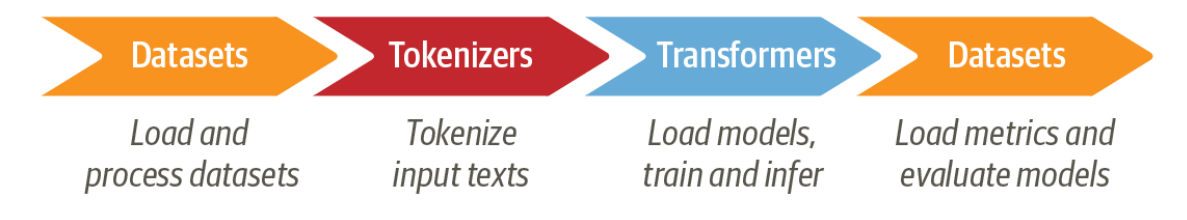

In [2]:
Image("/content/drive/MyDrive/Untitled folder/data_cloab/111.PNG")

In [3]:
!pip install datasets

In [4]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 5 are: {all_datasets[:5]}")

<ipython-input-4-914bdf209c52>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 103567 datasets currently available on the Hub
The first 5 are: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus']


We see that each dataset is given a name, so let's load the **emotion** dataset with the **load_dataset()** function:


In [5]:
from datasets import load_dataset

emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


If we look inside our **emotions** object:

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

### Looking at the Class Distribution
Whenever you are working on text classification problems, it is a good idea to examine the distribution of examples across the classes. A dataset with a skewed class distribution might require a different treatment in terms of the training loss and evaluation metrics than a balanced one.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


As you can see, the column headers have been preserved and the first few rows match our previous views of the data. However, the labels are represented as integers, so let's use the **int2str()** method of the label feature to create a new column in our DataFrame with the corresponding label names:



In [8]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


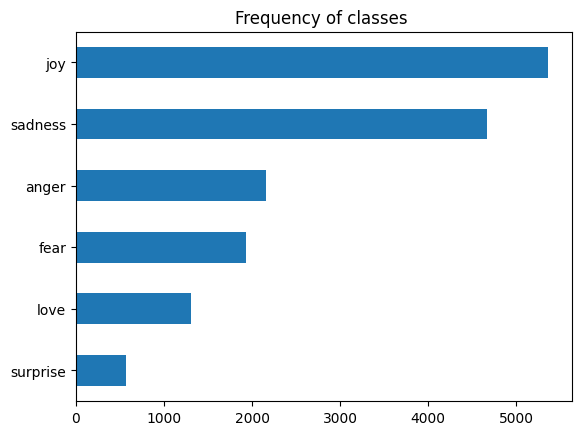

In [9]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of classes ')
plt.show()

In this case, we can see that the dataset is heavily imbalanced; the `joy` and `sadness` classes appear frequently, whereas `love` and `surprise` are about 5–10 times rarer  . To keep things simple in this chapter, we'll work with the raw, unbalanced class frequencies

### How Long Are Our Tweets?
- Transformer models have a maximum input sequence length that is referred to as the maximum context size. For applications using DistilBERT, the maximum context size is 512 tokens, which amounts to a few paragraphs of text.

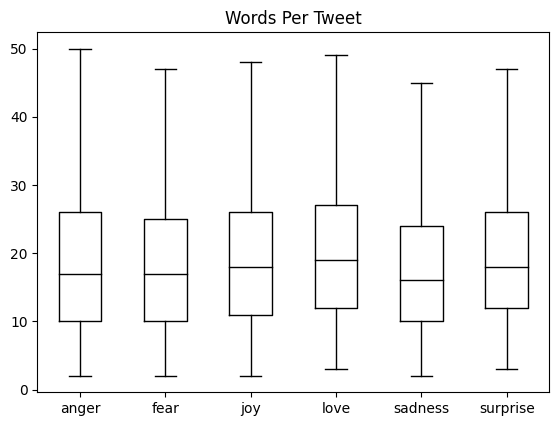

In [10]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

- From the plot we see that for each emotion, most tweets are around 15 words long and the longest tweets are well below DistilBERT's maximum context size. Texts that are longer than a model's context size need to be truncated, which can lead to a loss in performance if the truncated text contains crucial information; in this case, it looks like that won't be an issue,
Let's now figure out how we can convert these raw texts into a format suitable for  Transformers  While we're at it, let's also reset the output format of our dataset since we don't need the DataFrame format anymore:



In [11]:
emotions.reset_format()

### From Text to Tokens
Transformer models like DistilBERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors. Tokenization is the step of breaking down a string into the atomic units used in the model. There are several tokenization strategies one can adopt, and the optimal splitting of words into subunits is usually learned from the corpus. lets looking at the tokenizer used for DistilBERT

### Subword Tokenization
* The basic idea behind subword tokenization is to combine the best aspects of character and word tokenization. On the one hand, we want to split rare words into smaller units to allow the model to deal with complex words and misspellings. On the other hand, we want to keep frequent words as unique entities so that we can keep the length of our inputs to a manageable size. The main distinguishing feature of subword tokenization (as well as word tokenization) is that it is learned from the pretraining corpus using a mix of statistical rules and algorithms.

* There are several subword tokenization algorithms that are commonly used in NLP, but let's start with WordPiece which is used by the BERT and DistilBERT tokenizers. The easiest way to understand how WordPiece works is to see it in action. Transformers provides a convenient `AutoTokenizer` class that allows you to quickly load the tokenizer associated with a pretrained model—we just call its `from_pretrained()` method, providing the ID of a model on the Hub or a local file path. Let's start by loading the tokenizer for DistilBERT:





In [12]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Let's examine how this tokenizer works by feeding it our simple "Tokenizing text is a core task of NLP." example text:



In [13]:
text = 'Tokenizing text is a core task of NLP.'
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Just like we saw with character tokenization, we can see that the words have been mapped to unique integers in the `input_ids` field. We'll discuss the role of the `attention_mask` field in the next section. Now that we have the `input_ids`, we can convert them back into tokens by using the tokenizer's `convert_ids_to_tokens()` method:



In [14]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


We can observe three things here. First, some special `[CLS]` and `[SEP]` tokens have been added to the start and end of the sequence. These tokens differ from model to model, but their main role is to indicate the start and end of a sequence. Second, the tokens have each been lowercased, which is a feature of this particular checkpoint. Finally, we can see that "tokenizing" and "NLP" have been split into two tokens, which makes sense since they are not common words. The `##` prefix in `##izing` and `##p` means that the preceding string is not whitespace; any token with this prefix should be merged with the previous token when you convert the tokens back to a string. The `AutoTokenizer` class has a `convert_tokens_to_string()` method for doing just that, so let's apply it to our tokens:

In [15]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


The **AutoTokenizer** class also has several attributes that provide information about the tokenizer. For example, we can inspect the vocabulary size:



In [16]:
tokenizer.vocab_size

30522

and the corresponding model's maximum context size:

In [17]:
tokenizer.model_max_length

512

Another interesting attribute to know about is the names of the fields that the model expects in its forward pass:

In [18]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

##### Now that we have a basic understanding of the tokenization process for a single string, let's see how we can tokenize the whole dataset!

### Tokenizing the Whole Dataset
To tokenize the whole corpus, we'll use the `map()` method of our `DatasetDict` object. We'll encounter this method many times throughout this book, as it provides a convenient way to apply a processing function to each element in a dataset. As we'll soon see, the `map()` method can also be used to create new rows and columns.

To get started, the first thing we need is a processing function to tokenize our examples with:

In [19]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

This function applies the tokenizer to a batch of examples; `padding=True` will pad the examples with zeros to the size of the longest one in a batch, and `truncation=True` will truncate the examples to the model's maximum context size. To see `tokenize()` in action, let's pass a batch of two examples from the training set:



In [20]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Here we can see the result of padding: the first element of `input_ids` is shorter than the second, so zeros have been added to that element to make them the same length. These zeros have a corresponding `[PAD]` token in the vocabulary, and the set of special tokens also includes the `[CLS]` and `[SEP]` tokens that we encountered earlier:



In [21]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


Also note that in addition to returning the encoded tweets as input_ids, the tokenizer returns a list of attention_mask arrays. This is because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input. <> provides a visual explanation of how the input IDs and attention masks are padded.


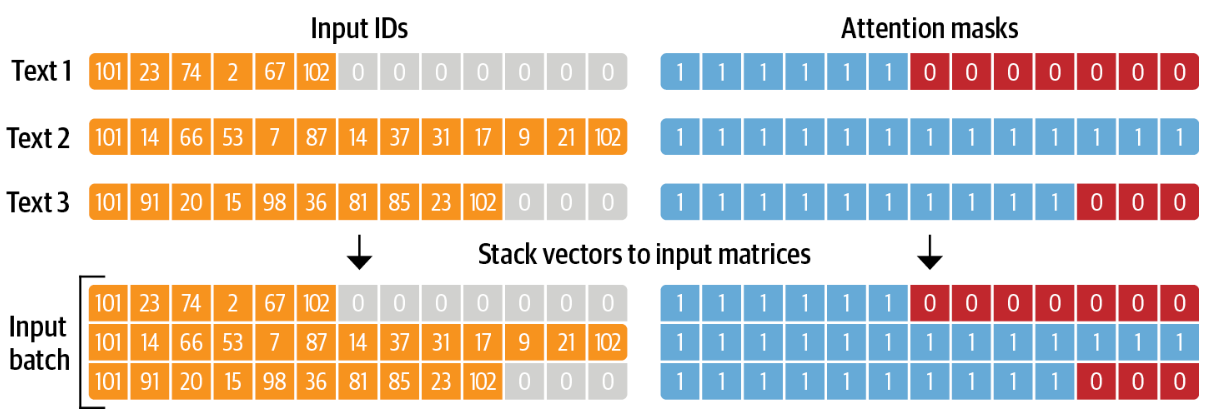

In [22]:
Image("/content/drive/MyDrive/Untitled folder/data_cloab/5.PNG")

Once we've defined a processing function, we can apply it across all the splits in the corpus in a single line of code:

In [23]:
emotions_encoded  = emotions.map(tokenize,batched=True,batch_size=None)

By default, the `map()` method operates individually on every example in the corpus, so setting `batched=True` will encode the tweets in batches. Because we've set `batch_size=None`, our `tokenize()` function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally, and we can see that this operation has added new `input_ids` and `attention_mask` columns to the dataset:

In [24]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### Training a Text Classifier

As discussed in  models like DistilBERT are pretrained to predict masked words in a sequence of text. However, we can't use these language models directly for text classification; we need to modify them slightly. To understand what modifications are necessary, let's take a look at the architecture of an encoder-based model like DistilBERT



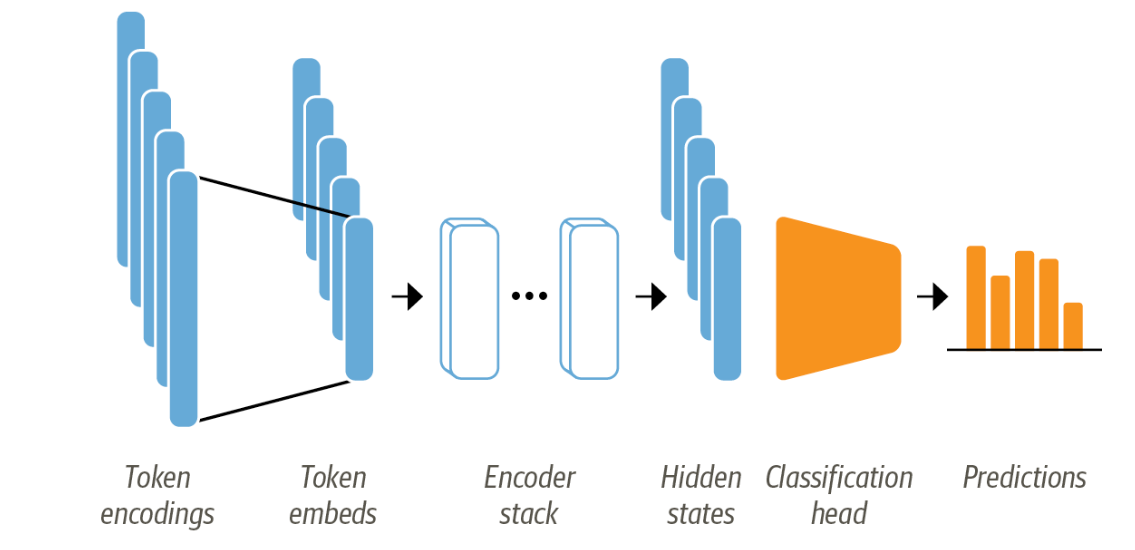

In [25]:
Image("/content/drive/MyDrive/Untitled folder/data_cloab/6.PNG")

First, the text is tokenized and represented as one-hot vectors called token encodings. The size of the tokenizer vocabulary determines the dimension of the token encodings, and it usually consists of 20k–200k unique tokens. Next, these token encodings are converted to token embeddings, which are vectors living in a lower-dimensional space. The token embeddings are then passed through the encoder block layers to yield a hidden state for each input token. For the pretraining objective of language modeling,⁠footnote:[In the case of DistilBERT, it's guessing the masked tokens.] each hidden state is fed to a layer that predicts the masked input tokens. For the classification task, we replace the language modeling layer with a classification layer.

### We have two options to train such a model on our Twitter dataset:
#####  1. **Feature extraction** : We use the hidden states as features and just train a classifier on them.
#####  2. **Fine-tuning** : We train the whole model end-to-end, which also updates the parameters of the pretrained BERT model.

In the following sections we explore both options for DistilBERT and examine their trade-offs.

#### **Transformers as Feature Extractors**

Using a transformer as a feature extractor is fairly simple. As shown in <>, we freeze the body's weights during training and use the hidden states as features for the classifier. The advantage of this approach is that we can quickly train a small or shallow model. Such a model could be a neural classification layer or a method that does not rely on gradients, such as a random forest. This method is especially convenient if GPUs are unavailable, since the hidden states only need to be precomputed once.

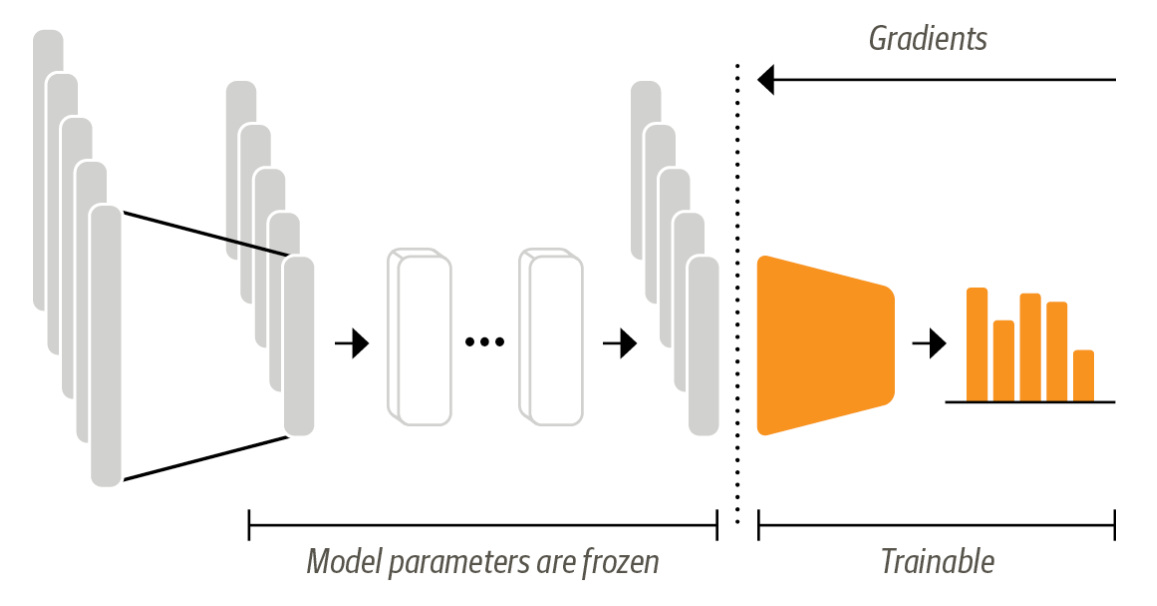

In [26]:
Image('/content/drive/MyDrive/Untitled folder/data_cloab/7.PNG')

## Using pretrained models
We will use another convenient auto class from Transformers called `AutoModel`. Similar to the `AutoTokenizer` class, `AutoModel` has a `from_pretrained()` method to load the weights of a pretrained model. Let's use this method to load the DistilBERT checkpoint:

In [27]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Here we've used PyTorch to check whether a GPU is available or not, and then chained the PyTorch `nn.Module.to()` method to the model loader. This ensures that the model will run on the GPU if we have one. If not, the model will run on the CPU, which can be considerably slower.

The `AutoModel` class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states. Let's take a look at how we can extract these states from our corpus.



## Extracting the last hidden states
To warm up, let's retrieve the last hidden states for a single string. The first thing we need to do is encode the string and convert the tokens to PyTorch tensors. This can be done by providing the return_tensors="pt" argument to the tokenizer as follows:



In [28]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


As we can see, the resulting tensor has the shape `[batch_size, n_tokens]`. Now that we have the encodings as a tensor, the final step is to place them on the same device as the model and pass the inputs as follows:

In [29]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


Here we've used the `torch.no_grad(`) context manager to disable the automatic calculation of the gradient. This is useful for inference since it reduces the memory footprint of the computations. Depending on the model configuration, the output can contain several objects, such as the hidden states, losses, or attentions, arranged in a class similar to a namedtuple in Python. In our example, the model output is an instance of `BaseModelOutput`, and we can simply access its attributes by name. The current model returns only one attribute, which is the last hidden state, so let's examine its shape:

In [30]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

ooking at the hidden state tensor, we see that it has the shape `[batch_size, n_tokens, hidden_dim]`. In other words, a 768-dimensional vector is returned for each of the 6 input tokens. For classification tasks, it is common practice to just use the hidden state associated with the `[CLS]` token as the input feature. Since this token appears at the start of each sequence, we can extract it by simply indexing into `outputs.last_hidden_state` as follows:

In [31]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

Now that we know how to get the last hidden state for a single string, let's do the same thing for the whole dataset by creating a new `hidden_state` column that stores all these vectors. As we did with the tokenizer, we'll use the `map()` method of `DatasetDict` to extract all the hidden states in one go. The first thing we need to do is wrap the previous steps in a processing function:



In [32]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

The only difference between this function and our previous logic is the final step where we place the final hidden state back on the CPU as a NumPy array. The `map()` method requires the processing function to return Python or NumPy objects when we're using batched inputs.

Since our model expects tensors as inputs, the next thing to do is convert the `input_ids` and `attention_mask` columns to the `"torch"` format, as follows:

In [33]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

We can then go ahead and extract the hidden states across all splits in one go:

In [34]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [35]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them. To do that, we'll need a feature matrix - let's take a look.

### Creating a feature matrix

The preprocessed dataset now contains all the information we need to train a classifier on it. We will use the hidden states as input features and the labels as targets. We can easily create the corresponding arrays in the well-known Scikit-Learn format as follows:

In [36]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Before we train a model on the hidden states, it's good practice to perform a sanity check to ensure that they provide a useful representation of the emotions we want to classify. In the next section, we'll see how visualizing the features provides a fast way to achieve this.

### Visualizing the training set

Since visualizing the hidden states in `768` dimensions is tricky to say the least, we'll use the powerful UMAP algorithm to project the vectors down to 2D. Since UMAP works best when the features are scaled to lie in the [0,1] interval, we'll first apply a `MinMaxScaler` and then use the UMAP implementation from the `umap-learn` library to reduce the hidden states:

In [37]:
!pip install umap-learn

In [38]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.287612,6.560187,0
1,-2.886889,5.427491,0
2,5.553796,3.064307,3
3,-2.161248,3.606245,2
4,-3.077238,3.674521,3


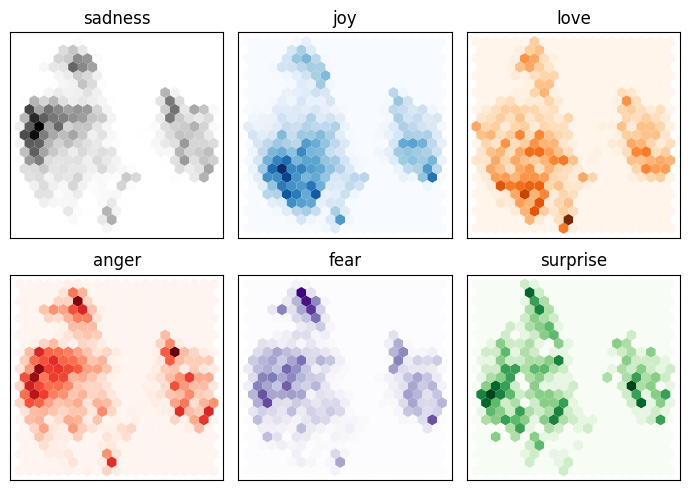

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

From this plot we can see some clear patterns: the negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions. On the other hand, joy and love are well separated from the negative emotions and also share a similar space. Finally, surprise is scattered all over the place. Although we may have hoped for some separation, this is in no way guaranteed since the model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in texts.

Now that we've gained some insight into the features of our dataset, let's finally train a model on it!

### Training a simple classifier

We've seen that the hidden states are somewhat different between the emotions, although for several of them there is no obvious boundary. Let's use these hidden states to train a logistic regression model with Scikit-Learn. Training such a simple model is fast and does not require a GPU:

In [40]:
# We increase `max_iter` to guarantee convergence
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [41]:
lr_clf.score(X_valid, y_valid)

0.6335

Looking at the accuracy, it might appear that our model is just a bit better than random—but since we are dealing with an unbalanced multiclass dataset, it's actually significantly better. We can examine whether our model is any good by comparing it against a simple baseline. In Scikit-Learn there is a DummyClassifier that can be used to build a classifier with simple heuristics such as always choosing the majority class or always drawing a random class. In this case the best-performing heuristic is to always choose the most frequent class, which yields an accuracy of about 35%:

In [42]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

So, our simple classifier with DistilBERT embeddings is significantly better than our baseline. We can further investigate the performance of the model by looking at the confusion matrix of the classifier, which tells us the relationship between the true and predicted labels:


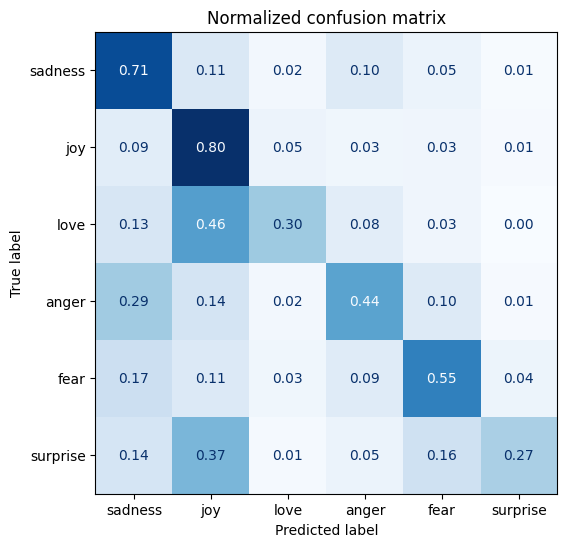

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

We can see that `anger` and `fear` are most often confused with `sadness`, which agrees with the observation we made when visualizing the embeddings. Also, `love` and `surprise` are frequently mistaken for `joy`.

In the next section we will explore the fine-tuning approach, which leads to superior classification performance. It is, however, important to note that doing this requires more computational resources, such as GPUs, that might not be available in your organization. In cases like these, a feature-based approach can be a good compromise between doing traditional machine learning and deep learning.

We can see that `anger` and `fear` are most often confused with sadness, which agrees with the observation we made when visualizing the embeddings. Also, `love` and `surprise` are frequently mistaken for `joy`.

In the next section we will explore the fine-tuning approach, which leads to superior classification performance. It is, however, important to note that doing this requires more computational resources, such as GPUs, that might not be available in your organization. In cases like these, a feature-based approach can be a good compromise between doing traditional machine learning and deep learning.

## Fine-Tuning Transformers
Let's now explore what it takes to fine-tune a transformer end-to-end. With the fine-tuning approach we do not use the hidden states as fixed features, but instead train them as shown in <>. This requires the classification head to be differentiable, which is why this method usually uses a neural network for classification.

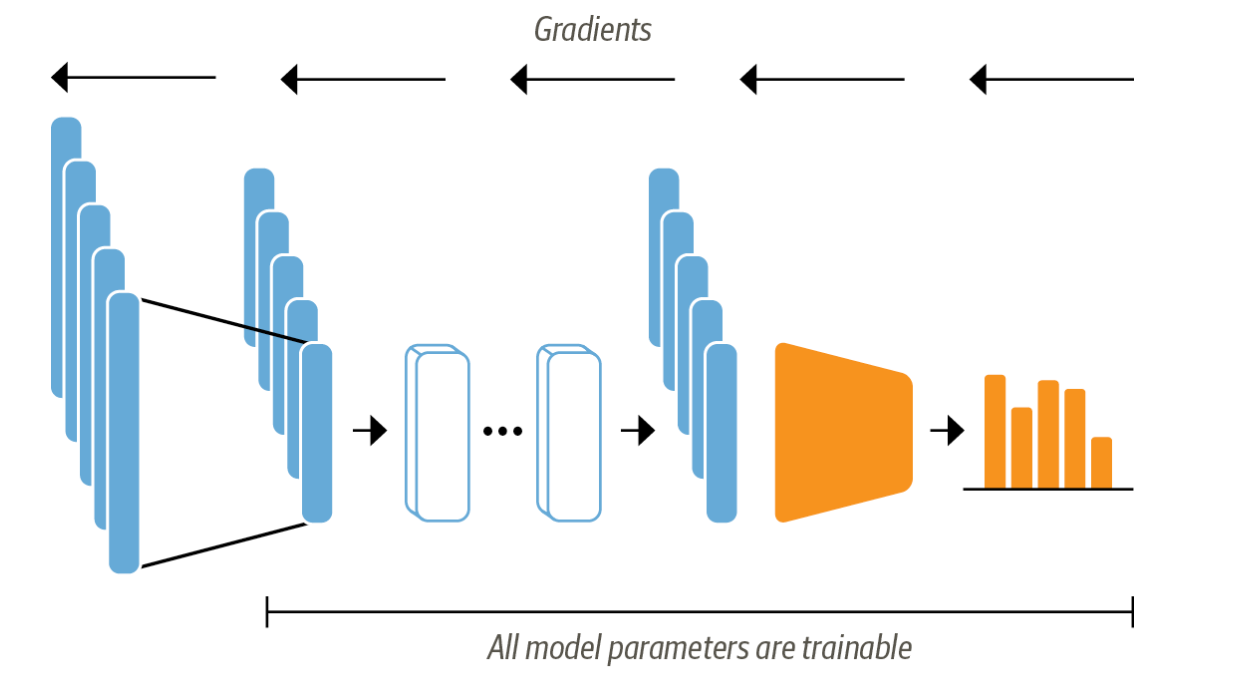

In [44]:
Image('/content/drive/MyDrive/Untitled folder/data_cloab/8.PNG')

Training the hidden states that serve as inputs to the classification model will help us avoid the problem of working with data that may not be well suited for the classification task. Instead, the initial hidden states adapt during training to decrease the model loss and thus increase its performance.

We'll be using the `Trainer` API from Transformers to simplify the training loop. Let's look at the ingredients we need to set one up!

## Loading a pretrained model

The first thing we need is a pretrained DistilBERT model like the one we used in the feature-based approach. The only slight modification is that we use the `AutoModelForSequenceClassification` model instead of `AutoModel`. The difference is that the `AutoModelForSequenceClassificatio`n model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model. We just need to specify how many labels the model has to predict (six in our case), since this dictates the number of outputs the classification head has:

In [45]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


You will see a warning that some parts of the model are randomly initialized. This is normal since the classification head has not yet been trained. The next step is to define the metrics that we'll use to evaluate our model's performance during fine-tuning.


## Defining the performance metrics

To monitor metrics during training, we need to define a `compute_metrics()` function for the `Trainer`. This function receives an `EvalPrediction` object (which is a named tuple with `predictions` and `label_ids` attributes) and needs to return a dictionary that maps each metric's name to its value. For our application, we'll compute the **F1-score** and the accuracy of the model as follows:



In [46]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


## Training the model

If you're running this code in a Jupyter notebook, you can log in to the Hub with the following helper function:

In [47]:
from huggingface_hub import notebook_login

notebook_login()

In [48]:
!pip install transformers[torch]
!pip install accelerate -U

In [49]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

Here we also set the batch size, learning rate, and number of epochs, and specify to load the best model at the end of the training run. With this final ingredient, we can instantiate and fine-tune our model with the `Trainer`

In [50]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.867000,0.343223,0.900500,0.898342
2,0.261500,0.226052,0.922500,0.922487


Looking at the logs, we can see that our model has an F1  -score on the validation set of around 92% - this is a significant improvement over the feature-based approach!

We can take a more detailed look at the training metrics by calculating the confusion matrix. To visualize the confusion matrix, we first need to get the predictions on the validation set. The `predict()` method of the Trainer class returns several useful objects we can use for evaluation:

In [51]:
preds_output = trainer.predict(emotions_encoded["validation"])

The output of the `predict()` method is a `PredictionOutput` object that contains arrays of predictions and label_ids, along with the metrics we passed to the trainer. For example, the metrics on the validation set can be accessed as follows:

In [54]:
preds_output.metrics

{'test_loss': 0.2260519117116928,
 'test_accuracy': 0.9225,
 'test_f1': 0.9224868880484602,
 'test_runtime': 4.3553,
 'test_samples_per_second': 459.214,
 'test_steps_per_second': 7.347}

It also contains the raw predictions for each class. We can decode the predictions greedily using np.argmax(). This yields the predicted labels and has the same format as the labels returned by the Scikit-Learn models in the feature-based approach:



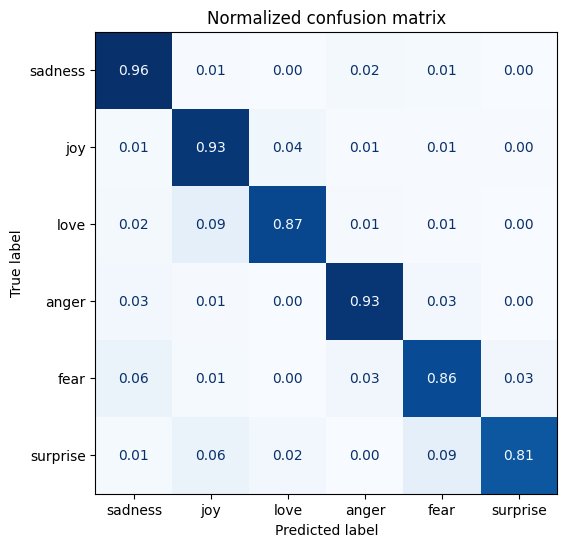

In [55]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

## Error analysis
Before moving on, we should investigate our model's predictions a little bit further. A simple yet powerful technique is to sort the validation samples by the model loss. When we pass the label during the forward pass, the loss is automatically calculated and returned. Here's a function that returns the loss along with the predicted label:



In [59]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [60]:
#hide_output
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [61]:

emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))


We can now easily sort emotions_encoded by the losses in either ascending or descending order. The goal of this exercise is to detect one of the following:

* Wrong labels:: Every process that adds labels to data can be flawed. Annotators can make mistakes or disagree, while labels that are inferred from other features can be wrong. If it was easy to automatically annotate data, then we would not need a model to do it. Thus, it is normal that there are some wrongly labeled examples. With this approach, we can quickly find and correct them.

* Quirks of the dataset:: Datasets in the real world are always a bit messy. When working with text, special characters or strings in the inputs can have a big impact on the model's predictions. Inspecting the model's weakest predictions can help identify such features, and cleaning the data or injecting similar examples can make the model more robust.

Let's first have a look at the data samples with the highest losses:

In [62]:
#hide_output
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.426155
1801,i feel that he was being overshadowed by the s...,love,sadness,5.376475
1274,i am going to several holiday parties and i ca...,joy,sadness,5.244022
1509,i guess this is a memoir so it feels like that...,joy,fear,5.239354
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.164094
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.128255
1950,i as representative of everything thats wrong ...,surprise,sadness,5.050335
1963,i called myself pro life and voted for perry w...,joy,sadness,4.933790
765,i feel super awkward and out of place right now,joy,sadness,4.708163
465,i would eventually go in to these stores but i...,joy,fear,4.706245


We can clearly see that the model predicted some of the labels incorrectly. On the other hand, it seems that there are quite a few examples with no clear class, which might be either mislabeled or require a new class altogether. In particular, joy seems to be mislabeled several times. With this information we can refine the dataset, which often can lead to as big a performance gain (or more) as having more data or larger models!

When looking at the samples with the lowest losses, we observe that the model seems to be most confident when predicting the sadness class. Deep learning models are exceptionally good at finding and exploiting shortcuts to get to a prediction. For this reason, it is also worth investing time into looking at the examples that the model is most confident about, so that we can be confident that the model does not improperly exploit certain features of the text. So, let's also look at the predictions with the smallest loss:

In [63]:
#hide_output
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.017956
69,i have no extra money im worried all of the ti...,sadness,sadness,0.018080
1965,i started feeling pathetic and ashamed,sadness,sadness,0.018557
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.018601
1601,i feel so ungrateful when thinking saying thes...,sadness,sadness,0.018649
1984,i have i feel pathetic for lying if i say no,sadness,sadness,0.018714
1310,i feel like an ungrateful asshole,sadness,sadness,0.018778
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.018825
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.018870
1303,i feel pathetic and uninspired,sadness,sadness,0.018885


## Saving and sharing the model

In [64]:
#hide_output
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1706969427.0f343ec3fd15.17315.0:   0%|          | 0.00/5.84k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Glaal/distilbert-base-uncased-finetuned-emotion/commit/eb8d5a497f5c7d182c97850b3fcbc093b43953b2', commit_message='Training completed!', commit_description='', oid='eb8d5a497f5c7d182c97850b3fcbc093b43953b2', pr_url=None, pr_revision=None, pr_num=None)

In [65]:

#hide_output
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/872 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [66]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


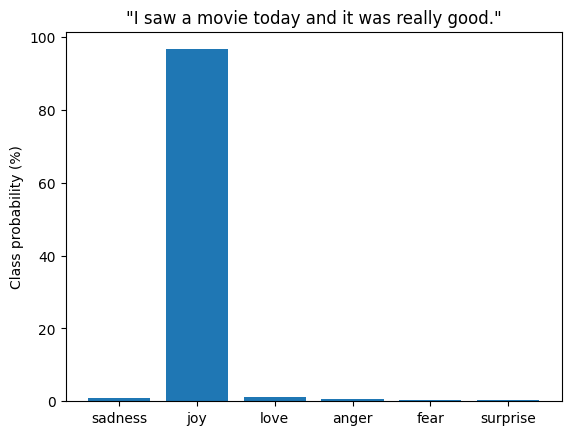

In [67]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()